# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have two main datasets**: <br>
>(The datasets screaped from **Instagram**).
> - 1- A dataset with posts data.
> - 2- A dataset with comments data.

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
import pickle

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, draw_heatmap, facet_heat, facet_days, SameText

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline

In [2]:
os.chdir("../Data")

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [3]:
df_comments = pd.read_csv("comments_cleaned.csv")
print(df_comments.shape)
df_comments.head()

(1751113, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
1,🔥🔥❤️,2020-06-23 06:50:20,17845867817208020,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
2,very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,2020-06-23 06:54:04,17889474637566402,0.0,0.0,2337634847974873088,n,12302008022,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,2020,Jun,23,2020-06-23,6
3,❤️❤️❤️❤️❤️❤️,2020-06-23 07:12:28,17869498675832482,0.0,0.0,2337634847974873088,n,2490417195,muataz_87,False,https://www.instagram.com/muataz_87,2020,Jun,23,2020-06-23,7
4,bombón bello 💖💖💖💖💖,2020-06-23 07:14:40,18066076495222844,0.0,0.0,2337634847974873088,n,1521544054,jorgero122129,False,https://www.instagram.com/jorgero122129,2020,Jun,23,2020-06-23,7


In [4]:
df_comments["datetime"] = pd.to_datetime(df_comments["datetime"])
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751113 entries, 0 to 1751112
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   message      object        
 1   datetime     datetime64[ns]
 2   id           int64         
 3   n_replies    float64       
 4   n_likes      float64       
 5   media_id     int64         
 6   parent_id    object        
 7   user_id      int64         
 8   username     object        
 9   is_verified  bool          
 10  account_url  object        
 11  year         int64         
 12  month        object        
 13  dayofmonth   int64         
 14  date         object        
 15  hour         int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 202.1+ MB


In [5]:
top_repeted = (
    df_comments.groupby(["message", "date"])
    .count()
    .sort_values("datetime", ascending=False)
    .index
)

## Negative Users

In [6]:
# To Load the set of negative commented users

with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [7]:
len(neg_users)

14511

<a id='deep'></a>
>## Deeper Investigations

<a id='neg'></a>
>>### Negative Comments
>>(Death - Kill - Burn - Turd - F*ck, Liar, Fire, ...)
> <ul>
 <li><a href="#neg"><b>Negative Comments</b></a></li>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

### Negative Text

In [8]:
# To Load the dictionary of negative text   
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f)
    
neg_text = set()
for key in neg_dict.keys():
    neg_text.add(key)
    
neg_text  

{' death',
 ' death ',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violence',
 'expos',
 'exposing her ass',
 'exposingamberheard',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamber',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @am

In [9]:
# negative = [' turd', 'liar', 'abuse', 'abusing', 'fireamberheardfromaquaman', 'fireamberheard', 
#             'fire her', 'fired', 'fire amber', 'remove amber', 'remove-amber', 'removed', 'removeamber',
#             'fuck amber heard', 'fuck amber', '#fuckamberheard', 'fuck u @amberheard', 'fuck you @amberheard', 
#             '@amberheard fuck you', 'fuckamber', 'fuck @amberheard', 'fuck  amber', 'fuck you amber', 'fuck her',
#             'fuck that bitch', 'fuck this bitch', 'fucking bitch', 'fucking abuser', 'fuck herself', 'fuck off',
#             'fuckamberheard', 'fucking bullshit'] 

In [10]:
df_negative = df_comments[df_comments["message"].str.contains('|'.join(neg_text))]
print(df_negative.shape)
df_negative.head()

(58594, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
157,#ambertheabuser #justiceforjohnnydepp,2020-04-20 01:03:09,17924309752391120,0.0,1.0,2285143072186506496,n,1637061353,pauu.eg,False,https://www.instagram.com/pauu.eg,2020,Apr,20,2020-04-20,1
171,"jason momoa ist der grund, weshalb aquaman all...",2018-12-27 16:59:45,17984212993148172,0.0,0.0,1943663541275322368,n,286745995,joker.reviews,False,https://www.instagram.com/joker.reviews,2018,Dec,27,2018-12-27,16
288,@shoe7979 it wasnt the role that killed him. i...,2018-09-24 11:18:20,17955816031133268,NaN,1.0,1875351868890582528,17978156986067024,5514629148,madmaxmcvey,True,https://www.instagram.com/madmaxmcvey,2018,Sep,24,2018-09-24,11
399,no thanks crazy bitch. u been off the list a...,2021-02-12 18:11:26,17899112170790540,0.0,0.0,2507566752144024576,n,8585010402,gwill6969,False,https://www.instagram.com/gwill6969,2021,Feb,12,2021-02-12,18
542,he is disgusting messing with 12's years old girl,2018-05-29 13:08:05,17922112792130772,0.0,0.0,1785083206309434368,n,1953412513,viapianabruna,False,https://www.instagram.com/viapianabruna,2018,May,29,2018-05-29,13


### A Heat Map for the Count of Negative Comments
(Turd - F*ck, Liar, Fire, ...)


Note: The Peaks Also on Nov 2020



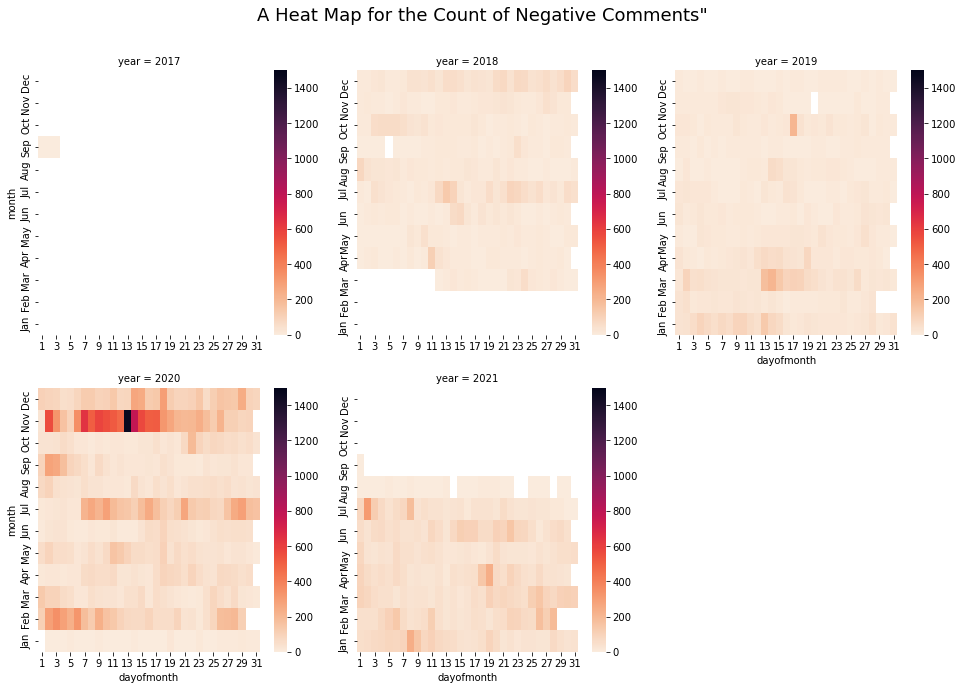

In [11]:
print('\nNote: The Peaks Also on Nov 2020\n')
title = 'A Heat Map for the Count of Negative Comments"'
facet_heat(df_negative, title, n_col=3, vmax=1500)

In [12]:
len(df_negative)

58594

### Most Repeated Negative Comments 

In [13]:
df = df_negative.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
310,#amberheardisanabuser,432,1741.0,34.0
21202,abuser,346,794.0,21.0
23891,bitch,305,122.0,7.0
27471,fuck amber heard,291,762.0,68.0
27755,fuck her,185,122.0,14.0
790,#fuckamberheard,165,272.0,7.0
25914,disgusting,131,159.0,11.0
496,#amberturd,125,534.0,5.0
11165,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
20940,[#maleficent #super8 #gingerandrosa #weboughta...,117,13.0,0.0


In [14]:
df_negative.message.value_counts().head(10)

#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                               432
abuser                                                                                                                                                                                                                                                                                                                                                                                              346
bitch                                                                                                                                                                                                                   

### Top Users with Negative Comments

In [15]:
# The total number of different users posted justiceforjohnnydepp
df_negative.username.nunique()

36093

In [16]:
df_nnegative = df_negative.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nnegative.head(25)


,username,n_comments,n_likes,n_replies
28820,samanthastar53,219,372.0,28.0
5207,becauseitsjohnnydepp,154,663.0,13.0
962,_dope_black_unicorn_,136,315.0,5.0
12504,funkfried4,121,39.0,6.0
25356,officialnerdyhero,117,66.0,4.0
26113,pauu.eg,115,257.0,2.0
5926,bobzoe1,115,102.0,0.0
24280,natchayaleejin,114,218.0,3.0
23538,motivatornetwork,105,199.0,30.0
18884,kingskippy1987,100,148.0,17.0


In [17]:
neg_users = neg_users|set(df_nnegative.username.unique())

In [18]:
# newly_created = {'moonbeam429', 'mathxy._01', 'netos.k', 'justicie.for.johnny.depp', 'machelyyyyy',
#                  'queenmusicvideo', 'divulgaaa.bahia', 'wewantjusticeforjohnnydepp'}

# colors = []
# for user in df_njustice['username'].head(20):
#     if user in newly_created:
#         colors.append('red')
#     else: 
#         colors.append('#5296dd')

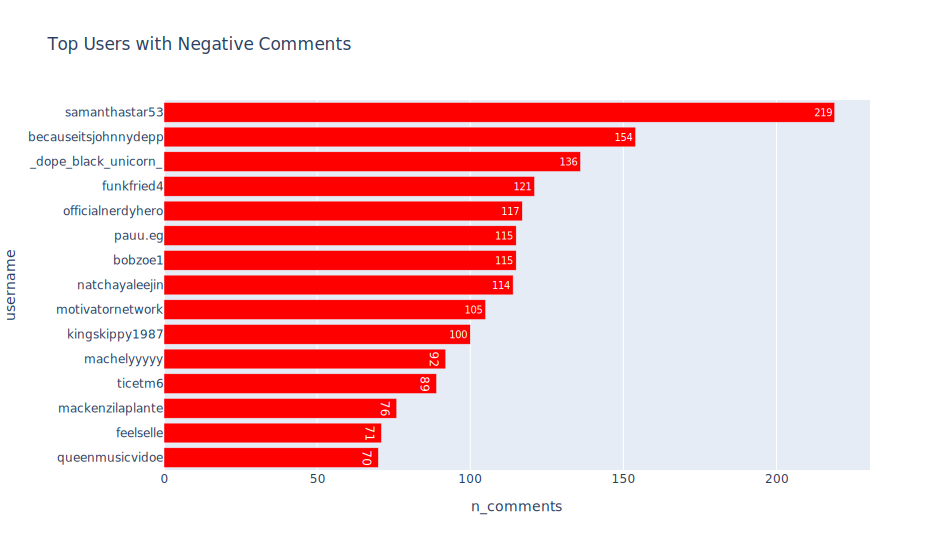

In [19]:
# print('\nnewly created (after 2018) accounts are colored in "red"')
barh(
    df_nnegative[['username', 'n_comments']].head(15), 'Top Users with Negative Comments', 40
)

###  Users Negative Contributions on Each Date

In [20]:
df = df_negative.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
26690,2020-11-02,queenmusicvidoe,70,14.0,0.0
35823,2020-12-11,kingskippy1987,55,14.0,0.0
22884,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
26689,2020-11-02,queenmusicvideo,41,0.0,0.0
26525,2020-11-02,babikate6,33,11.0,0.0
40065,2021-02-11,zhra.006,32,3.0,0.0
29394,2020-11-11,c_shortt,32,106.0,3.0
40052,2021-02-11,sahartaleb___,31,19.0,1.0
30214,2020-11-13,becauseitsjohnnydepp,28,46.0,3.0
16798,2020-04-22,pauu.eg,28,19.0,0.0


In [21]:
neg_users = neg_users|set(df_nnegative.head(10).username)

### Negative Comments Peak Dates

In [22]:
negative_dates = df_negative.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

negative_dates.head(15)


,date,n_comments,n_likes,n_replies
977,2020-11-13,1462,31035.0,501.0
978,2020-11-14,780,7983.0,129.0
971,2020-11-07,643,17614.0,528.0
973,2020-11-09,585,3397.0,165.0
979,2020-11-15,570,7870.0,106.0
966,2020-11-02,558,3958.0,135.0
974,2020-11-10,556,5325.0,125.0
975,2020-11-11,520,7719.0,108.0
981,2020-11-17,512,4605.0,114.0
972,2020-11-08,508,5787.0,160.0


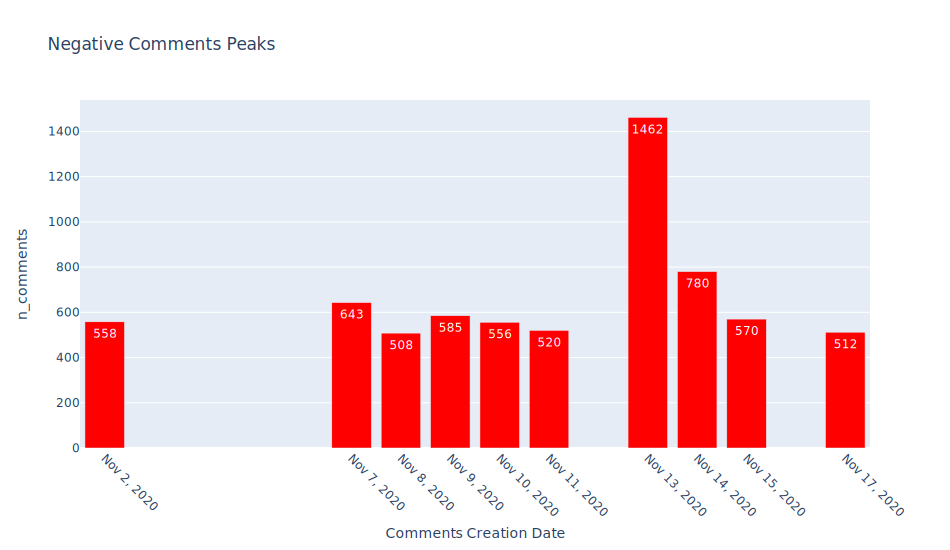

In [23]:
bar_peaks(negative_dates[['date', 'n_comments']].head(10), 'Negative Comments Peaks')

### Thats why we need to be specific in choosing the keywords
- 'death' --> this captures #deathstroke, #deathonthenile, logan's death, his death was sad , ...
- 'kill ----> #3daystokill, killer

In [24]:
df_comments[df_comments.message.str.contains('to death amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
299803,crush my head to death amber heard,2021-01-22 04:16:15,17871415523201664,0.0,0.0,2490976993112051200,n,33769860660,fusco7134,False,https://www.instagram.com/fusco7134,2021,Jan,22,2021-01-22,4
788147,crush my head to death amber heard,2021-06-01 03:04:28,17934244927518148,0.0,0.0,2584294149359287296,n,33769860660,fusco7134,False,https://www.instagram.com/fusco7134,2021,Jun,1,2021-06-01,3


In [25]:
df_comments[df_comments.message.str.contains('death to amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
509659,@mark.marked89 death to amber that fuck cuc,2020-11-13 06:27:43,17855262515312252,NaN,0.0,2439926532657377792,17943494242395872,33458783646,coolsued11,True,https://www.instagram.com/coolsued11,2020,Nov,13,2020-11-13,6


In [26]:
df_comments[df_comments.message.str.contains('deathtoamber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
325437,#deathtoamber,2020-11-12 15:22:11,18159038476079412,1.0,0.0,2440608277372796928,n,41610101407,sommerkind_lasagne,False,https://www.instagram.com/sommerkind_lasagne,2020,Nov,12,2020-11-12,15


In [27]:
df_comments[df_comments.message.str.contains('go kys amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
19926,go kys amber ❤️😻,2020-08-01 13:19:36,17876508679793972,0.0,1.0,2348673053813004800,n,11296083045,evan_b0llz,False,https://www.instagram.com/evan_b0llz,2020,Aug,1,2020-08-01,13


In [28]:
df_comments[df_comments.message.str.contains('kill amber')].message.value_counts().head()

kill amber                            19
kill amber #justiceforjohnnydepp       2
kill amber all the way                 2
fuck gal, marry margot, kill amber     2
kill amber heard                       2
Name: message, dtype: int64

In [29]:
df_comments[df_comments.message.str.contains('kill her')].message.value_counts().head()

kill her                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  4
seriously, how and why on earth are you supp

In [30]:
df_comments[df_comments.message.str.contains('kys')].message.value_counts().head()

kys                                                        4
she should kys                                             2
@skyscraper48_art thanks                                   2
@morningskystar ok                                         1
@nickysixy1 she's an abuser. tf are you going on about?    1
Name: message, dtype: int64

In [31]:
df_comments[df_comments.message.str.contains(' raped')].message.value_counts().head(10)

@nayab_data1987 so if man raped an 8 year old you’d be fine with it as long as they’re good at acting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [55]:
df_comments[df_comments.message.str.contains('deserves it')].message.value_counts().head()

she deserves it                                                                            7
she deserves it.                                                                           2
i hope she gets beaten up. she deserves it after everything she did to johnny. 💩💩💩💩💩💩💩💩    2
it deserves it                                                                             2
honestly, does anyone not hate amber heard ? i think we all do 😂 she deserves it           1
Name: message, dtype: int64

In [51]:
df_comments[df_comments.message.str.contains('go to hell')].message.value_counts().head()

go to hell                                                                                                                                                                                                           6
why the fuck are you supporting someone who abused johnny depp for years? imagine stanning her🤢🤢 there’s so much evidence she abused him yet you still stan her, you’re gross go to hell with her dumb bitch.🤮🤮🤮🤮    3
she can go to hell                                                                                                                                                                                                   3
go to hell bitch #justiceforjohnnydepp                                                                                                                                                                               2
they're nothing but fucking assholes i hope they all go to hell🤮🤮                                                                           

In [52]:
df_comments[df_comments.message.str.contains('gotohell')].message.value_counts().head(10)

it's so fuckin ridiculous. no own life. #gotohell                                                                 1
it won't be long till amber will tell the world bianca butti is abusing her. i'm already prepared. #gotohellah    1
@gotohellforheavenssakee yani einiosaurus'a dönmüș                                                                1
#gotohellambich                                                                                                   1
👏👏👏👏👏#gotohellambich                                                                                              1
Name: message, dtype: int64

In [53]:
df_comments[df_comments.message.str.contains('beaten')].message.value_counts().head()

amazing how narcissists will gaslight and goad to get a reaction & when that person finally reacts &  blows up, the narcissist is in exactly the right place to film the blow up 🤷‍♀️ it’s almost as if she knew what she was doing??!!!! it’s funny... for the amount of times she claims he threatened to kill her, she doesn’t have not one recording but she’s documented everything else?!! i also find it funny that if he has beaten her so badly, thrown phones at her face etc that she doesn’t have any open wounds/ gashes/ stitches etc.... plus the supposed hair evidence... if you yank/ pull someone’s hair, it doesn’t break off in a 2/3inch section at the bottom (that’s cutting) it gets ripped out in clumps from the roots!!! \nshe’s 100% a total narcissistic sociopath!!! 🤪🤪 #justiceforjohnnydepp                                                                                                                                                              3
seriously, how and why on earth are you supp

In [54]:
df_comments[df_comments.message.str.contains('beaten up')].message.value_counts().head()

i hope she gets beaten up. she deserves it after everything she did to johnny. 💩💩💩💩💩💩💩💩                                                                                                                                                                                                                      2
nope she needs to feel the same thing she did to him . her ass needs to be beaten up . bc if they fine out in prison what she did they will tear her apart                                                                                                                                                   1
awful scene that could be better. why did the soldiers move close and point their guns rather than shoot from a distance. would've been way cooler for him to have his bullet proof suit deflect the bullets and him just walk up and beat them up, they should throw themselves at him to get beaten up.    1
she deserves to get beaten up and raped. she’s an abusive horrible person 💩💩 #justiceforjoh

In [56]:
df_comments[df_comments.message.str.contains('burn')].message.value_counts().head(10)

#lilycollins #lilyjanecollins #lilyjcollins #emilyinparis #tothebone #loverosie #mirrormirror #shadowhunters #theblindside #actress #audreyhepburn #amberheard #angelinajolie #bradpitt #sandrabullock #cateblanchett #chrisevans #robertdowneyjr #tomholland #scarlettjohansson #claryfray #clarissafairchild #tmicast #tmi #cobmovie #clace #snowwhite #philcollins #followers                                                                                                                                                                                                                                                                                                                             6
burn                                                                                                                                                                                                                                                                                                                     

In [63]:
df_comments[df_comments.message.str.contains('bitch')].message.value_counts().head(10)

bitch                  305
fuck that bitch         74
fuck this bitch         60
fucking bitch           36
crazy bitch             30
what a bitch            25
ambitch                 22
#amberheardisabitch     21
#ambitch                17
stupid bitch            16
Name: message, dtype: int64

In [57]:
df_comments[df_comments.message.str.contains('abus')].message.value_counts().head()

#amberheardisanabuser                          432
abuser                                         346
#ambertheabuser #justiceforjohnnydepp           93
#justiceforjohnnydepp #amberheardisanabuser     84
#amberheardisanabuser #justiceforjohnnydepp     75
Name: message, dtype: int64

In [58]:
df_comments[df_comments.message.str.contains('liar')].message.value_counts().head()

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                                                                                                                                            124
[#maleficent #super8 #gingerandrosa #weboughtazoo #maryshelley #theneondemon #galveston #thebeguiled #aboutray #ithinkwearealonenow #20thcenturywomen #howtotalktogirlsatparties #teenspirit #sidneyhall #allthebrightplaces #dakotafanning #angelinajolie #chloemoretz #nicolekidman #annehathaway #amberheard #lilycollins #lucyhale #lilyjames #kristenstewart #juliaroberts #caradelevingne]    117
#amberheardisaliar                                                                                                                                                                                                      

In [36]:
df_comments[df_comments.message.str.contains('fuck her')].message.value_counts().head(10)

fuck her                          185
fuck her.                           9
she can go fuck herself             5
fuck her!                           5
fuck her #justiceforjohnnydepp      4
good, fuck her                      3
fuck her😒                           3
i wanna fuck her                    3
fuck her man                        2
fuck her lol                        2
Name: message, dtype: int64

In [37]:
df_comments[df_comments.message.str.contains('fuck herself')].message.value_counts().head()

she can go fuck herself                                                 5
amber heard can go fuck herself                                         2
all except mera, she can go fuck herself                                1
amber heard can go fuck herself. she ruined an innocent mans career.    1
who ever this ann chick is can go fuck herself                          1
Name: message, dtype: int64

In [38]:
df_comments[df_comments.message.str.contains('fuck off')].message.value_counts().head(10)

fuck off                                                                            47
fuck off amber                                                                       8
fuck off @amberheard                                                                 6
she can fuck off                                                                     4
amber heard can fuck off                                                             3
oh fuck off                                                                          3
amber heard needs to fuck off                                                        2
fuck off bitch                                                                       2
@siachidesign fuck off                                                               2
amber could fuck off from the industry forever and people probably wouldn’t care     2
Name: message, dtype: int64

In [39]:
df_comments[df_comments.message.str.contains('fuck that bitch')].message.value_counts().head()

fuck that bitch                              74
fuck that bitch.                              6
fuck that bitch!                              3
man fuck that bitch                           2
yea fuck that bitch #amberheardisanabuser     1
Name: message, dtype: int64

In [40]:
df_comments[df_comments.message.str.contains('fuck this bitch')].message.value_counts().head(10)

fuck this bitch                                                                                   60
fuck this bitch.                                                                                   6
fuck this bitch #justiceforjohnnydepp                                                              5
fuck this bitch with a cactus. justice for johnny depp                                             1
0 cuz fuck this bitch                                                                              1
nah fuck this bitch #justiceforjohnnydepp                                                          1
i’ll fuck this bitch in your name jack sparrow! 🖕🖕🖕🖕🖕                                              1
fuck this bitch and if you report this comment your bitch too                                      1
fuck this bitch 🖕🖕🖕                                                                                1
well shit, i guess someone forgot to give me my payment. fuck this bitch #justiceforjohnnyd

In [32]:
df_comments[df_comments.message.str.contains('fuckamber')].message.value_counts().head(10)

#fuckamberheard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 165
،#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard                                                                                                                                                                                                                                                         32
#justiceforjohnnydepp  #amberhea

In [33]:
df_comments[df_comments.message.str.contains('fuck  amber')].message.value_counts().head(10)

fuck  amber heard                                                                                  8
fuck  amber heard 🔥🔥🔥🔥🔥🔥                                                                           2
fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard                            1
fuck  amber forever😑😑😑                                                                             1
fuck  amber heard 🔥🔥🔥🔥🔥                                                                            1
fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard 🔥🔥🔥🔥🔥    1
fuck  amber heard fuck  amber heard fuck  amber heard                                              1
fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard fuck  amber heard          1
Name: message, dtype: int64

In [34]:
df_comments[df_comments.message.str.contains('fuck @amberheard')].message.value_counts().head()

fuck @amberheard                                                           17
fuck @amberheard  #justiceforjohnnydepp                                     2
fuck @amberheard 🖕🏽 still. forever.                                         1
fuck @amberheard #justiceforjohnnydepp                                      1
fuck @amberheard!!! we should tag her and show her how much we hate her     1
Name: message, dtype: int64

In [35]:
df_comments[df_comments.message.str.contains('fuck amber')].message.value_counts().head(10)

fuck amber heard                                    291
fuck amber                                          105
fuck amber heard #justiceforjohnnydepp               62
fuck amber heard! #justiceforjohnnydepp              40
fuck amber heard all my homies hate amber heard      15
fuck amber heard.                                    14
fuck amber turd                                       9
fuck amber heard, all my homies hate amber heard      8
fuck amber herd                                       7
fuck amber heard!                                     6
Name: message, dtype: int64

In [41]:
df_comments[df_comments.message.str.contains('fuck u @amberheard')].message.value_counts().head()

fuck u @amberheard 🖕🏽      14
fuck u @amberheard          1
haha fuck u @amberheard     1
Name: message, dtype: int64

In [42]:
df_comments[df_comments.message.str.contains('fuck you @amberheard')].message.value_counts().head()

fuck you @amberheard                                                                                                                                                                                                  14
true always win she wan't it or not fuck you @amberheard                                                                                                                                                              10
such fucking bullshit if a guy did what she did he would of got fired and sent to jail while this bitch keeps everything fuck you @amberheard                                                                          1
#justiceforjohnnydepp fuck you @amberheard                                                                                                                                                                             1
amber heard is fucking garbage fuck you @amberheard you literally snaked @johnnydepp no one likes you! us fans want justice for john

In [43]:
df_comments[df_comments.message.str.contains('fuck you amber')].message.value_counts().head(10)

fuck you amber             26
fuck you amber heard       12
fuck you amber!             3
fuck you amber🖕🖕🖕🖕🖕         2
fuck you amber.             2
fuck you amber 🖕🏻           2
fuck you amber🖕             1
fuck you amber-slut         1
fuck you amber heard!!!     1
fuck you amber🖕🏿            1
Name: message, dtype: int64

wait, so she says that we are robots now? bruh... first she said that we are getting paid now that we're robots?!? @amberheard fuck you🖕hope you die the most painful death possible.

In [44]:
df_comments[df_comments.message.str.contains('@amberheard fuck you')].message.value_counts().head()

@amberheard fuck you                                                                                                                                                                     10
wait, so she says that we are robots now? bruh... first she said that we are getting paid now that we're robots?!? @amberheard fuck you🖕hope you die the most painful death possible.     1
@amberheard fuck you and kalama,  go to hell                                                                                                                                              1
@amberheard fuck you #fuckamberheard                                                                                                                                                      1
@amberheard fuck you 🖕🖕🖕🖕                                                                                                                                                                 1
Name: message, dtype: int64

In [45]:
df_comments[df_comments.message.str.contains('fucked the right off')].message.value_counts().head()

shameful. take that trash out. she's a proven abuser through police statements, various testimonies and outright audio tapes. hope she gets fucked the right off from aquaman 2.    1
Name: message, dtype: int64

In [46]:
df_comments[df_comments.message.str.contains('fucking abuser')].message.value_counts().head()

fucking abuser                                                  8
shes a fucking abuser dont support her                          3
shes a fucking abuser dont support her #justiceforjohnnydepp    2
fucking abuser 🤮                                                2
fucking bitch disgusting fucking abuser                         1
Name: message, dtype: int64

In [47]:
df_comments[df_comments.message.str.contains('fucking bitch')].message.value_counts().head(10)

fucking bitch                                            36
fucking bitch🖕🏻                                           3
this fucking bitch                                        3
what a fucking bitch                                      3
she is a fucking bitch                                    3
fucking bitch🖕🏻💩                                          2
she is fucking bitch                                      2
that fucking bitch                                        2
shes a fucking bitch #justiceforjohnnydepp                1
dumb fucking bitch don’t give this lady any headlines     1
Name: message, dtype: int64

In [48]:
df_comments[df_comments.message.str.contains('fucking bullshit')].message.value_counts().head()

fucking bullshit                                                                                                                                               6
such fucking bullshit if a guy did what she did he would of got fired and sent to jail while this bitch keeps everything fuck you @amberheard                  1
some fucking bullshit                                                                                                                                          1
that's fucking bullshit! i hate this broad with a passion. i've never liked her as an actress and dislike her more after everything that has come to light.    1
that's fucking bullshit                                                                                                                                        1
Name: message, dtype: int64

In [49]:
df_comments[df_comments.message.str.contains('bullshit')].message.value_counts().head()

🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags        85
bullshit                                               43
🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags!!!!    15
this is bullshit                                       13
fucking bullshit                                        6
Name: message, dtype: int64

In [50]:
df_comments[df_comments.message.str.contains('fuckthesun')].message.value_counts().head()

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                                                                                                                                                                                                                                        124
،#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard                                                                                                                                                                                                                                                         32
#justiceforjohnnydepp  #amberhea

In [59]:
df_comments[df_comments.message.str.contains('aggressive')].message.value_counts().head()

#justiceforjohnnydepp \namber heard assaulted johnny depp when his children were in the house:\n'i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.'\nhttps://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager    3
aggressive                                                                                                                                                                                                                                                                2
@worldofmera lmao 😂 i didn’t even know that. i joke like that with my friends too 😂 srry dawg if i came on too aggressive                                                                                                                                                 1
@greg.caicedo we’re friends that’s why i was giving him shit lol not that i expect you too but maybe get the full context before being so aggressive lol.                                           

In [60]:
df_comments[df_comments.message.str.contains('alcoholic')].message.value_counts().head()

@_dr_pepper_297 the lengths we will go to to defend alcoholic men with a history of violence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              1
don't believe johnny is innocent. this is exactly what narcissistic alcoholics do to their exes. they continue the abuse through the courts if they have the money, which #johnnydepp does unfortunately. he's the one with the addiction.                  

In [61]:
df_comments[df_comments.message.str.contains(' lunge')].message.value_counts().head()

#justiceforjohnnydepp \namber heard assaulted johnny depp when his children were in the house:\n'i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.'\nhttps://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                   3
#justiceforjohnnydepp amber heard assaulted johnny depp when his children were in the house: ‘i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.’ https://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                       1
she looks so batshit while speaking..like she's so upset at the question but remembers she cant lunge at the lady so she has to restrain her psychotic personality. 🤯👌👌😅                                                                                                                                                 1
@_willjm__  also you wont believe whos playing him 😂 do

In [62]:
df_comments[df_comments.message.str.contains('assault')].message.value_counts().head()

wonder how long it's gonna take before bianca realizes scamber is using her for publicity or until we hear that scamber is in jail for assaulting her latest victim.... #cancelamberheard                                                                                 4
#justiceforjohnnydepp \namber heard assaulted johnny depp when his children were in the house:\n'i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.'\nhttps://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager    3
amber heard was arrested in 2005 for domestic violence. he assaulted his ex-girlfriend. #justiceforjohnnydepp                                                                                                                                                             3
@juliienguyenn men get accused of sexually assaulting women way more than women actually get sexually assaulted so idk why you’re disgusted by him it’s just a fact                                 

In [64]:
df_comments[df_comments.message.str.contains('boycottamber')].message.value_counts().head()

#boycottamberheard                                                                                                                                                                                                                                                                                                                                                        83
،#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard                                                                                                                                  32
#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard                                       

In [66]:
df_comments[df_comments.message.str.contains('amberturd')].message.value_counts().head()

#amberturd                                                                                                                                                                                                                                  125
،#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard     32
#justiceforjohnnydepp  #amberheardisanabuser  #amberturd  #amberheardisaliar  #johnnydeppisinnocent  #boycottthesun  #boycottwarnerbros  #boycottamberheard  #wearewithyoujohnnydepp  #johnnydeppismyhero  #fuckthesun  #fuckamberheard      26
#amberturd 💩                                                                                                                                                                                                                                 11
we support you @johnnydepp \n#fuckamberh

In [67]:
df_comments[df_comments.message.str.contains('amber turd')].message.value_counts().head()

amber turd                                                                                                                                                                                                                                                116
amber turd 💩                                                                                                                                                                                                                                               27
fuck amber turd                                                                                                                                                                                                                                             9
sooo proud of johnny depp ❤️👏 he has our outmost respect and love ❤️ amber turd has to live and watch the outpouring acts of love on johnny.  these are new times , new world.  one has to be “truly “ loved without needing to sell body and 

In [68]:
df_comments[df_comments.message.str.contains('change.org')].message.value_counts().head(10)

https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                                                                                                 67
#justiceforjohnnydepp https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald                                                         29
https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald #justiceforjohnnydepp                                                         28
https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2 #amberheardisanabuser                                                                            8
#justiceforjohnnydepp https://www.change.org/p/walt-disney-we-want-johnny-depp-back-as-captain-jack-sparrow                                                                  6
#justiceforjohnnydepp https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                            

In [69]:
df_comments[df_comments.message.str.contains('clawing')].message.value_counts().head(10)

#justiceforjohnnydepp \namber heard assaulted johnny depp when his children were in the house:\n'i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.'\nhttps://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                                                                                                                       3
#justiceforjohnnydepp amber heard assaulted johnny depp when his children were in the house: ‘i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.’ https://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                                                                                                                           1
@oniveruse you wish you were a fucking don lmao. “expect the worst fuck with someone like me”. i’m sure every woman is clawing at you. get your retarded ass out of here o

In [70]:
df_comments[df_comments.message.str.contains('clown')].message.value_counts().head(10)

clown                                                                                                                                                                                                                                                                                                                             13
everyone knows @amberheard the clown , #justiceforjohnnydepp                                                                                                                                                                                                                                                                       8
what a clown                                                                                                                                                                                                                                                                                                                       4
clown ass bitch          

In [71]:
df_comments[df_comments.message.str.contains('shut')].message.value_counts().head(10)

shut up                                                                                                     13
@dcolympus shut up                                                                                           6
dm for shutout @unique_world_of_.beauty                                                                      5
@mashutka_____ спасибо 😍                                                                                     5
shut the fuck up                                                                                             5
shut up bitch                                                                                                4
@elenashutkova                                                                                               3
shut up meg                                                                                                  3
shut up and take my money                                                                                    3
h

In [72]:
df_comments[df_comments.message.str.contains('cunt')].message.value_counts().head(10)

cunt                     54
what a cunt              14
fucking cunt              5
she’s a cunt              5
cunt.                     5
fuck this cunt            4
amber heard is a cunt     3
abusive cunt              3
lying cunt                3
cunt 🤣                    2
Name: message, dtype: int64

In [73]:
df_comments[df_comments.message.str.contains('diecunt')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
770634,#diecunt,2020-11-07 01:23:12,18172874947047376,0.0,0.0,2436553450303797760,n,25535518798,slut_for_big_juicy_tacos,False,https://www.instagram.com/slut_for_big_juicy_t...,2020,Nov,7,2020-11-07,1


In [74]:
df_comments[df_comments.message.str.contains('disgusting')].message.value_counts().head(10)

disgusting                                                                                                                                                                                                                                                                                                                                                      131
disgusting.                                                                                                                                                                                                                                                                                                                                                      11
she is disgusting                                                                                                                                                                                                                                                                               

In [75]:
df_comments[df_comments.message.str.contains('domestic violence')].message.value_counts().head(10)

account supporting domestic violence 👏                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [76]:
df_comments[df_comments.message.str.contains('violence')].message.value_counts().head(10)

@wewantjusticeforjohnnydepp #justiceforjohnnydepp #amberheardisliar #amberheardisanabuser #amberheard \n#johnnydepp #johnnydeppisinnocent #johnnydeppisavictim  #exposingamberheard #exposingthetruth #domesticviolence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [77]:
df_comments[df_comments.message.str.contains('violent')].message.value_counts().head(10)

amber's defense team and amber stans- depp was violent toward his exes! \nall of his exes- no he wasn't. \namber's defense team and amber stans- that doesn't matter because ppl can change. 😑😑😑😑😑😑😑\na man doesn't all of a sudden turn into a wife beater at 50. amber however has been violent for as long as anyone has know her name.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [78]:
df_comments[df_comments.message.str.contains('expos')].message.value_counts().head(10)

@wewantjusticeforjohnnydepp #justiceforjohnnydepp #amberheardisliar #amberheardisanabuser #amberheard \n#johnnydepp #johnnydeppisinnocent #johnnydeppisavictim  #exposingamberheard #exposingthetruth #domesticviolence                                                                                                                                                                                                                                                       8
disgusting, look at her smile while trying to completely ruin and tarnish his name after already being exposed many times. 🤮                                                                                                                                                                                                                                                                                                                                                  2
@rahul_trublud ive literally never heard anyone support her regardless o

In [79]:
df_comments[df_comments.message.str.contains('victim')].message.value_counts().head(10)

@amberheard is not a victim #justiceforjohnnydepp                                                                                                                                                                                                                                                                                                                                                                                 19
@wewantjusticeforjohnnydepp #johnnydepp #amberheard #justicefordepp #westandwithjohnnydepp #amberheardisanabuser #amberheardisaliar #amberheardisabitch #justice #aquaman #boycottamberheard #boycottthesun #boycottaquaman2 #nojacknopirates #supportingjohnnydepp \n#justiceformalevictims #johnnydepppetition #petition #adamwaldman #deppheads #depphead #teamdepp                                                            12
@wewantjusticeforjohnnydepp #justiceforjohnnydepp #amberheardisliar #amberheardisanabuser #amberheard \n#johnnydepp #johnnydeppisinnocent #johnnydeppisavictim

In [80]:
df_comments[df_comments.message.str.contains('felony')].message.value_counts().head(10)

@dr.cynical_ less than 1% of male rapists lead to felony convictions 🥱 amber heard not getting charged is not sexism towards men bye                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1
lmao “her personal life should be separate from her work life” bitch it’s not like she just kinda abused johnny depp a little. she abused him, cut off part of his finger, lied about it in court (which is a felo

In [81]:
df_comments[df_comments.message.str.contains('fire her')].message.value_counts().head(10)

fire her                                                                                                                                                           23
fire her!                                                                                                                                                           4
please fire her                                                                                                                                                     3
fire her ass                                                                                                                                                        2
fire her.                                                                                                                                                           2
fire her!!!                                                                                                                                                         2
just

In [82]:
df_comments[df_comments.message.str.contains('fired')].message.value_counts().head(10)

she should be fired                                                                                                                                                                                                                                                                                                                                                                  10
https://www.thetimes.co.uk/edition/news/amber-heard-accuses-johnny-depp-of-online-smear-campaign-to-get-her-fired-from-aquaman-sequel-bv55d9phj?utm_medium=social&utm_source=facebook&fbclid=iwar0vvcwcetpvf43stvrfzhkyoiegdv9lifczv6qgfhybtiqy57p8pq7pmq4#echobox=1605269482                                                                                                        10
get fired                                                                                                                                                                                                                                               

In [83]:
df_comments[df_comments.message.str.contains('fire amber')].message.value_counts().head(10)

fire amber heard                                                                                                                                                                                                       13
fire amber heard.                                                                                                                                                                                                       2
fire amber heard. #justiceforjohnnydepp                                                                                                                                                                                 2
fire amber.                                                                                                                                                                                                             2
fire amber heard. she lied on johnny depp                                                                                       

In [84]:
df_comments[df_comments.message.str.contains('fireamber')].message.value_counts().head(10)

#fireamberheard                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 94
#justiceforjohnnydepp #fireamberheard                                                                                                                                                                                                                                                                                                                                                                                                                                                           12
#johnnydeppisanangel #johnnydeppis

In [85]:
df_comments[df_comments.message.str.contains('50 million')].message.value_counts().head(10)

leave amber i don’t believe a known drug head and alcoholic that has paid ex aka 1 wife to say whatever 150 million?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      1
@zouren.sid the last one made 750 million                                                                                                                                                                                                                                                                                                                                   

In [86]:
df_comments[df_comments.message.str.contains('7 million')].message.value_counts().head(10)

#amberheard if you did in fact donated all of the 7mil to charities like u said u did then why send a letter to court to exclude showing the receipt as evidence? i mean you publicly announced your good did, it was all over news and u received praises for it, now why hide the proof/confirmation u actually did the good work that u said u did? u cant just brag about donating 7 million and not actually do it or else it means and proves u lied and u used these charities for publicity and your own sake.. shows the kind of person u really are 🤦🏻‍♀️💩                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [87]:
df_comments[df_comments.message.str.contains('golddigger')].message.value_counts().head()

golddigger                                                                                                                                                                                                                                                                                                                                            4
#golddigger                                                                                                                                                                                                                                                                                                                                           4
i am pretty excited about this, bcuz i believe johnny, yeah, i am fan since i am teen, but i also considered the idea that he might have changed because of drugs&alcohol with amber. to me the result hopefully proves that amber is nothing but a golddigger that puts a bad light on actual victims of domestic viole

In [88]:
df_comments[df_comments.message.str.contains('gold digger')].message.value_counts().head(10)

gold digger                                                                                   37
gold digger bitch                                                                              3
gold digger disgusting human 🤮🤮🤢                                                               2
she's a gold digger                                                                            2
lol 😂 gold digger                                                                              1
well she is a gold digger                                                                      1
amber heard si gold digger                                                                     1
that's a gold digger                                                                           1
gold digger disgusting human 🤮🤮🤢 ah                                                            1
he was in love,  she is a gold digger sleazy career climber she used him. she's the liar 😡     1
Name: message, dtype: int64

In [89]:
df_comments[df_comments.message.str.contains('jail')].message.value_counts().head(10)

everyone who is a fan of amber heard  please look and at the evidence she is an abuser and a bad person! i know its hard to look at someone you really love and possibly is your hero but she needs to be in jail and be punished for what she has done to johnny depp! please just watch a few videos with real evidence and it will be very clear who the abuser is! #johnnydeppisinnocent #boycotthesun #istandwithjohnnydepp #amberheardisanabuser #johnnyisinnocent #johnnyismycaptainjacksparrow #ihateamberheard #amberheardisaliar #boycottfantasticbeasts #boycottwarnerbros #johnnydeppismyhero #depphead #deppfamily #thesunisaliar #deppheadfamily #werewithyoujohnnydepp    44
#jailforamberheard                                                                                                                                                                                                                                                                                                                          

In [90]:
df_comments[df_comments.message.str.contains('lawsuit')].message.value_counts().head()

https://boundingintocomics.com/2019/03/21/petition-created-to-remove-amber-heard-from-aquaman-2-after-johnny-depps-lawsuit/                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     4
apparently elon musk invested heavily for the sake of his mistress amber, that she still won the lawsuit.                                                                                                                                                                                                                                                                                                             

In [91]:
df_comments[df_comments.message.str.contains('shit')].message.value_counts().head(10)

🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags        85
bullshit                                               43
holy shit                                              40
shit                                                   35
piece of shit                                          21
🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags!!!!    15
no shit                                                15
oh shit                                                15
this is bullshit                                       13
shits the bed                                           9
Name: message, dtype: int64

In [92]:
df_comments[df_comments.message.str.contains('petition')].message.value_counts().head()

@wewantjusticeforjohnnydepp #johnnydepp #amberheard #justicefordepp #westandwithjohnnydepp #amberheardisanabuser #amberheardisaliar #amberheardisabitch #justice #aquaman #boycottamberheard #boycottthesun #boycottaquaman2 #nojacknopirates #supportingjohnnydepp \n#justiceformalevictims #johnnydepppetition #petition #adamwaldman #deppheads #depphead #teamdepp                  12
petition in favor of actress amber heard, protagonist of the film aquaman, as mera. http://chng.it/pfn9c8mc46                                                                                                                                                                                                                                                                            4
https://boundingintocomics.com/2019/03/21/petition-created-to-remove-amber-heard-from-aquaman-2-after-johnny-depps-lawsuit/                                                                                                                       

In [93]:
df_comments[df_comments.message.str.contains('prison')].message.value_counts().head(10)

she should be in prison                                                                                                                                                                                                                                                                                                                                                                               3
@hindy_zahler she faces prison time and their case is still ongoing 👍                                                                                                                                                                                                                                                                                                                                 2
hope she goes to prison                                                                                                                                                                                                 

In [94]:
df_comments[df_comments.message.str.contains('punched')].message.value_counts().head()

babe you weren’t punched 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [95]:
df_comments[df_comments.message.str.contains('remove amber')].message.value_counts().head()

#justiceforjohnnydepp #cancelamberheard #amberheardisanabuser #timesup  #metoo #aquaman2removeamberheard sign the petition remove amber heard from aquaman 2! stop casting abusers! amber heard is a demon! https://t.co/p7bmvkwwst                          3
remove amber heard                                                                                                                                                                                                                                           2
sign the change.org petition. search on google for: "remove amber heard from aquaman 2"                                                                                                                                                                      2
link to the petition to remove amber heard from the  movie aquaman 2, if you want to sign it (not my petition just sharing the link):\nhttp://chng.it/pzgyj85jgj                                                                           

In [96]:
df_comments[df_comments.message.str.contains('removed')].message.value_counts().head()

@dfarr1307 they both abused each other, the only way she’s getting removed is if he is removed from fantastic beasts 3                                                                                                                        2
http://chng.it/g7bmgyxqdp link to get her removed                                                                                                                                                                                             2
@mas_queso1.0 mistakes? she falsely accused depp of abuse, and ruined his career. he was immediately removed from all of his rolls after these fake accusations why should she be treated any differently when she was in fact the abuser?    2
you need to be removed from aquaman 2🧞‍♀️                                                                                                                                                                                                     1
its not about the snyder cut, they shoul

In [97]:
df_comments[df_comments.message.str.contains('scammer')].message.value_counts().head()

scammer                                                                                                                                                                                                                                                                                                                                                                                                                                                                            2
@ticetm6 https://youtu.be/v8e5d8hoama. that’s not the boss due to these types of issues. he lost the votes when i started bitching. if they wants them back do what i say. if they want to molest me i’m going to beat heads. i cannot id those perverts yet. stop harassing me and get this fake fucking mental heath scammer under investigation for insurance fraud and question the atf  on the homicides. who told them i can’t have guns? tell him to go fuck his mother.    2
scammer post dipsticks                                        

In [98]:
df_comments[df_comments.message.str.contains('stupid')].message.value_counts().head(10)

stupid                                                                                                 17
stupid bitch                                                                                           16
the fans are not stupid #releasethesnydercut @warnerbrosentertainment @wbpictures                      10
this is stupid                                                                                          4
que estupidez                                                                                           4
that’s stupid                                                                                           4
@luke.d.burnett they need to put zack on with her like ww1 to make sure she don’t do nothing stupid     3
@relentless_stupidity_                                                                                  3
fuck that stupid bitch                                                                                  3
so stupid                                     

In [99]:
df_comments[df_comments.message.str.contains('stupid')].message.value_counts().head(10)

stupid                                                                                                 17
stupid bitch                                                                                           16
the fans are not stupid #releasethesnydercut @warnerbrosentertainment @wbpictures                      10
this is stupid                                                                                          4
que estupidez                                                                                           4
that’s stupid                                                                                           4
@luke.d.burnett they need to put zack on with her like ww1 to make sure she don’t do nothing stupid     3
@relentless_stupidity_                                                                                  3
fuck that stupid bitch                                                                                  3
so stupid                                     

In [100]:
df_comments[df_comments.message.str.contains('stupid ass')].message.value_counts().head(10)

stupid ass                                                                                                                                                                                                                                                                      1
so you can have plastic surgery... anyways no reason to acknowledge this stupid ass magazine... beauty is opinion based                                                                                                                                                         1
stupid ass wb,they cant even handle the dceu so they go back and revive snyder vision cus they are lazy                                                                                                                                                                         1
@niall.m2187 check the next slide stupid ass                                                                                                                                      

In [101]:
df_comments[df_comments.message.str.contains('threw a vodka bottle')].message.value_counts().head()

@justiceforheard waittt what phone are you talking about? the case where she lied that johnny threw an iphone at her? im talking about how she threw a vodka bottle at him and cut off his finger, it didnt include a phone. in one of the explanations she for example said that johnny punched a wall and caused the finger injury himself soooo it didnt have anything to do with any phone                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [102]:
df_comments[df_comments.message.str.contains('whor')].message.value_counts().head(10)

whore                                                25
jd is a shit show/looser. ah is a whore               3
whore.                                                3
attention whore                                       3
whore !                                               2
whore!                                                2
@hero_doe hope your dad makes love with the whore     2
@newhorizon840 🔥                                      2
what a whore                                          2
liar whore 💩                                          2
Name: message, dtype: int64

In [103]:
df_comments[df_comments.message.str.contains('tugging')].message.value_counts().head(10)

#justiceforjohnnydepp \namber heard assaulted johnny depp when his children were in the house:\n'i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.'\nhttps://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                   3
#justiceforjohnnydepp amber heard assaulted johnny depp when his children were in the house: ‘i saw amber lunge at johnny, clawing, tugging and aggressively pulling him.’ https://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                       1
amber heard assaulted johnny depp when his children were in the house: 'i saw amber lunge at johnny, clawing, tugging and aggressively pulling him. he continued to stand there yelling at her to stop and leave him alone' : https://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager    1
Name: message, dtype: int64

In [104]:
df_comments[df_comments.message.str.contains('raped')].message.value_counts().head(10)

@nayab_data1987 so if man raped an 8 year old you’d be fine with it as long as they’re good at acting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [105]:
df_comments[df_comments.message.str.contains('raped')].message.value_counts().head(10)

@nayab_data1987 so if man raped an 8 year old you’d be fine with it as long as they’re good at acting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [106]:
df_comments[df_comments.message.str.contains('raped')].message.value_counts().head(10)

@nayab_data1987 so if man raped an 8 year old you’d be fine with it as long as they’re good at acting                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [107]:
# len(df_comments[df_comments.message.str.contains("wearewithyoujohnnydepp")].message)

In [108]:
# To Load the dictionary of negative text    
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f) 
 
neg_dict

{'kill': 4856,
 'kill her': 161,
 'kys': 147,
 'kill amber': 124,
 'she should kys': 2,
 'go kys amber': 1,
 'death': 1799,
 ' death': 1256,
 'burn': 792,
 ' death ': 710,
 'deserves it': 178,
 'burn in hell': 63,
 'go to hell': 105,
 'go die': 18,
 'gotohell': 5,
 'to death amber': 2,
 'burninhell': 2,
 'death to amber': 1,
 'deathtoamber': 1,
 'diecunt': 1,
 'abus': 17574,
 'abuse': 14013,
 'shit': 9747,
 'abuser': 8568,
 'bitch': 5989,
 'liar': 3134,
 'stupid': 2412,
 'amberheardisanabuser': 2033,
 'fired': 1840,
 'disgusting': 1545,
 'abusing': 1155,
 'bullshit': 1130,
 'shut': 1025,
 'amberheardisaliar': 776,
 'amber turd': 731,
 'cunt': 645,
 'expos': 550,
 'clown': 506,
 'amberturd': 505,
 'whor': 383,
 'boycottamber': 329,
 'boycottamberheard': 324,
 'ambertheabuser': 167,
 'amberheardisanabuserandliar': 144,
 'amber abus': 121,
 'amberisanabuser': 105,
 'amber heard abus': 75,
 'stupid ass': 55,
 'scammer': 32,
 'amber-heard-abus': 31,
 'violencehasnogender': 16,
 'exposingamb

<a id='justice'></a>
>>## #justiceforjohnnydepp
> <ul>
 <li><a href="#neg">Negative Comments</a></li>  
 <li><a href="#justice"><b>#justiceforjohnnydepp</b></a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

###  Hashtags Count

| Hashtag | Count |
| :--|:--|
|**#justiceforjohnnydepp**| 10244|
|**#amberheardisanabuser**| 2032|
|**#wearewithyoujohnnydepp**| 805|
|**#amberheardisaliar**| 776| 
|**#amberturd**| 449|
|**#fireamberheard**| 349|
|**#fuckthesun**| 335|
|**#boycottamberheard**| 324|
|**#ambertheabuser**| 165|
|**#amberheardisanabuserandliar**| 144|
|**#jailforamberheard**| 89|
|**#removeamberheardsfromaquaman2**| 57|

In [109]:
# neg_users = neg_users|{'di22mendez'}
# neg_text = neg_text|{'remove amber', 'remove-amber', 'removed'}

In [110]:
# Add all the negative hashtags to the negative text
neg_text = neg_text|{'ambertheabuser', 'fireamberheard', 'amberturd', 'jailforamberheard',
                     'amberheardisanabuserandliar', 'boycottamberheard', 'removeamberheardsfromaquaman2', 
                     'amberheardisanabuser', 'fuckthesun', 'amberheardisaliar', 'wearewithyoujohnnydepp'}

In [111]:
len(df_comments[df_comments["message"].str.contains("#ambertheabuser")])

165

In [112]:
len(df_comments[df_comments["message"].str.contains("#fireamberheard")])

349

In [113]:
len(df_comments[df_comments["message"].str.contains("#amberturd")])

449

In [114]:
len(df_comments[df_comments["message"].str.contains("#jailforamberheard")])

89

In [115]:
len(df_comments[df_comments["message"].str.contains("#amberheardisanabuserandliar")])

144

In [116]:
len(df_comments[df_comments["message"].str.contains("#boycottamberheard")])

324

In [117]:
len(df_comments[df_comments["message"].str.contains("#removeamberheardsfromaquaman2")])

57

In [118]:
len(df_comments[df_comments["message"].str.contains("#amberheardisanabuser")])

2032

In [119]:
len(df_comments[df_comments["message"].str.contains("#fuckthesun")])

335

In [120]:
len(df_comments[df_comments["message"].str.contains("#amberheardisaliar")])

776

In [121]:
len(df_comments[df_comments["message"].str.contains("#wearewithyoujohnnydepp")])

805

In [122]:
top_repeted[1][0]

'#justiceforjohnnydepp'

In [123]:
df_comments[df_comments["message"].str.contains('johnnydeppisinnocent')].message.value_counts()

#johnnydeppisinnocent                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    135
#amberheard #amberheardisanabuser #amberheardabusedjohnnydepp #amberheardisanabuserandliar #amberheardfans #johnnydepp #johnnydeppisinnocent #johnnydeppforever                                                                                                                                                                            

In [124]:
df_repeated = df_comments[df_comments["message"].str.contains('justice must be served to johnny')]
df_repeated.message.value_counts()

justice must be served to johnny depp            96
justice must justice must be served to johnny     1
Name: message, dtype: int64

In [125]:
# made by the same user 
df_repeated.username.unique()

array(['ana.bodyboarder.martins'], dtype=object)

### A Heat Map for the Count of Comments Containing "justiceforjohnnydepp" 

In [126]:
justice = ['justiceforjohnnydepp', 'justice for johnny', 'justice must be served to johnny depp', 
           'johnnydeppisinnocent', 'wearewithyoujohnny', 'wearewhithyoujohnny', 'isupportjohnny']

In [127]:
df_justice = df_comments[df_comments["message"].str.contains('|'.join(justice))]


Note: The Peaks Also on Nov 2020



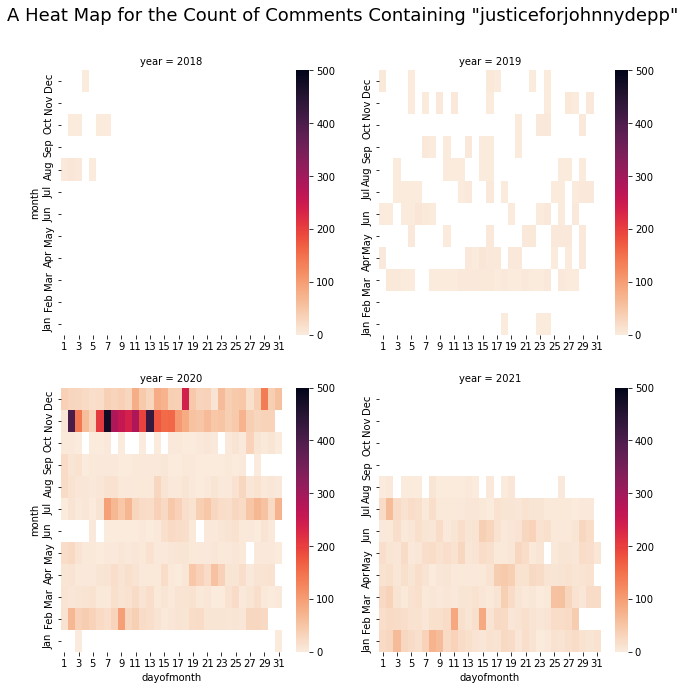

In [128]:
print('\nNote: The Peaks Also on Nov 2020\n')
title = 'A Heat Map for the Count of Comments Containing "justiceforjohnnydepp"'
facet_heat(df_justice, title, n_col=2, vmax=500)

In [129]:
len(df_justice)

12211

### Most Repeated Comments Containing "justiceforjohnnydepp"

In [130]:
df = df_justice.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
413,#justiceforjohnnydepp,4862,41032.0,490.0
3078,justice for johnny depp,168,1924.0,83.0
3060,justice for johnny,141,1267.0,29.0
325,#johnnydeppisinnocent,135,245.0,0.0
1646,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
1266,#wearewithyoujohnnydepp,118,296.0,3.0
3302,justice must be served to johnny depp,96,244.0,26.0
88,#ambertheabuser #justiceforjohnnydepp,93,201.0,2.0
517,#justiceforjohnnydepp #amberheardisanabuser,84,337.0,9.0
958,#justiceforjohnnydepp ❤️,75,337.0,1.0


In [131]:
df_justice.message.value_counts().head(10)

#justiceforjohnnydepp                                                                                                                       4862
justice for johnny depp                                                                                                                      168
justice for johnny                                                                                                                           141
#johnnydeppisinnocent                                                                                                                        135
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun     124
#wearewithyoujohnnydepp                                                                                                                      118
justice must be served to johnny depp                                                                                             

### Top Users Commented with "justiceforjohnnydepp"

In [132]:
# The total number of different users posted justiceforjohnnydepp
df_justice.username.nunique()

6020

In [133]:
df_njustice = df_justice.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_njustice.head(25)


,username,n_comments,n_likes,n_replies
972,becauseitsjohnnydepp,180,284.0,8.0
4051,moonbeam429,130,154.0,5.0
4495,pauu.eg,115,257.0,2.0
3241,kingskippy1987,99,148.0,17.0
648,ana.bodyboarder.martins,96,244.0,26.0
732,annalena_1963,82,129.0,4.0
3637,machelyyyyy,75,122.0,29.0
4440,ownage130,72,1.0,0.0
4622,queenmusicvidoe,70,14.0,0.0
4204,naye6504,56,484.0,10.0


In [134]:
# neg_users = neg_users|set(df_njustice.username.unique())

In [135]:
newly_created = {'moonbeam429', 'mathxy._01', 'netos.k', 'justicie.for.johnny.depp', 'machelyyyyy',
                 'queenmusicvideo', 'divulgaaa.bahia', 'wewantjusticeforjohnnydepp'}

colors = []
for user in df_njustice['username'].head(20):
    if user in newly_created:
        colors.append('red')
    else: 
        colors.append('#5296dd')


newly created (after 2018) accounts are colored in "red"


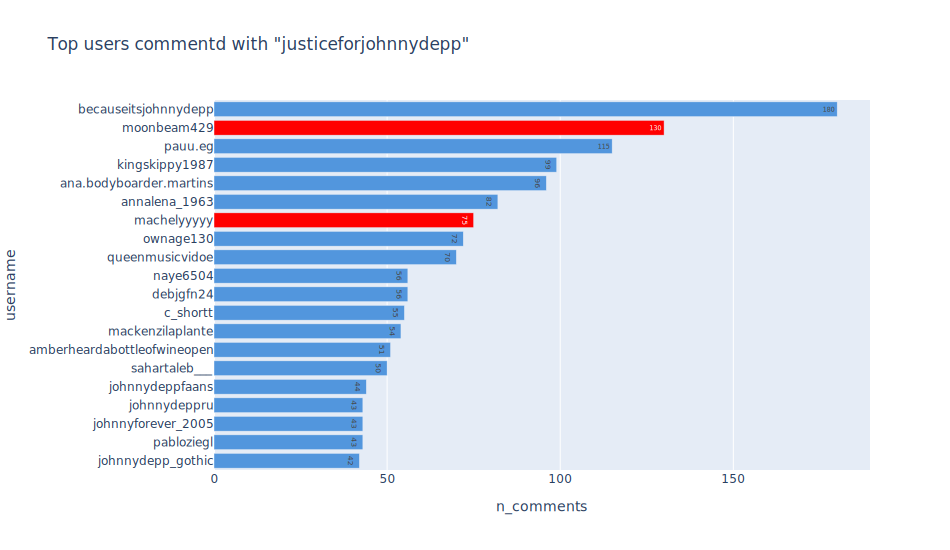

In [136]:
print('\nnewly created (after 2018) accounts are colored in "red"')
barh(
    df_njustice[['username', 'n_comments']].head(20), 'Top users commentd with  "justiceforjohnnydepp"', c=colors
)

### "justiceforjohnnydepp" Users Contributions on Each Date

In [137]:
df = df_justice.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
7033,2021-02-15,ownage130,72,1.0,0.0
2662,2020-11-02,queenmusicvidoe,70,14.0,0.0
5631,2020-12-11,kingskippy1987,55,14.0,0.0
2193,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
2661,2020-11-02,queenmusicvideo,41,0.0,0.0
6450,2021-01-03,mathxy._01,40,29.0,1.0
3900,2020-11-11,c_shortt,35,118.0,4.0
4383,2020-11-13,netos.k,34,7.0,2.0
2589,2020-11-02,babikate6,34,12.0,0.0
7002,2021-02-11,zhra.006,32,3.0,0.0


In [138]:
neg_users = neg_users|set(df_njustice.head(10).username)

### "justiceforjohnnydepp" Peak Dates

In [139]:
justice_dates = df_justice.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

justice_dates.head(15)


,date,n_comments,n_likes,n_replies
381,2020-11-07,478,3540.0,33.0
387,2020-11-13,428,6293.0,77.0
376,2020-11-02,403,1082.0,22.0
385,2020-11-11,287,1168.0,23.0
382,2020-11-08,282,2402.0,29.0
383,2020-11-09,257,1449.0,61.0
422,2020-12-18,240,823.0,8.0
384,2020-11-10,237,1442.0,26.0
380,2020-11-06,207,2799.0,16.0
386,2020-11-12,196,893.0,20.0


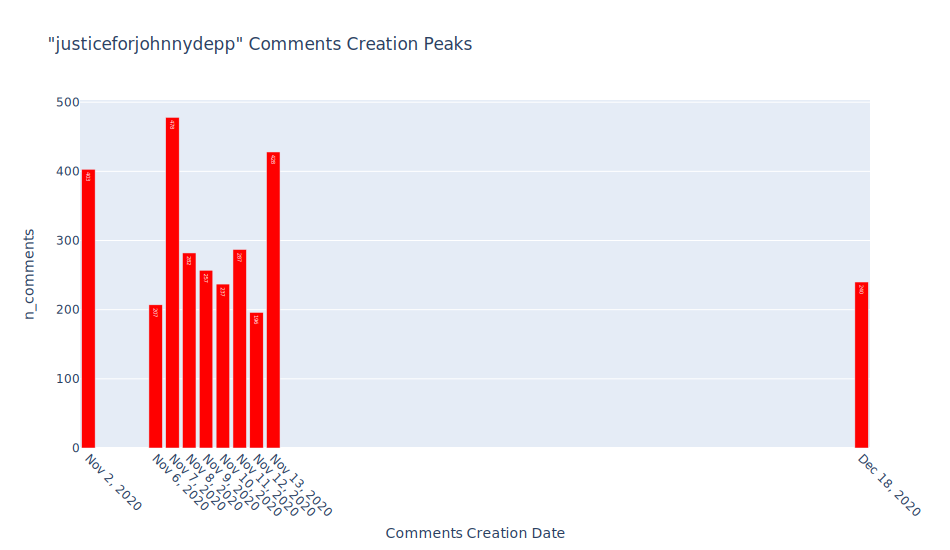

In [140]:
bar_peaks(justice_dates[['date', 'n_comments']].head(10), '"justiceforjohnnydepp" Comments Creation Peaks')

#### pauu.eg
- private account
- 39 posts
- 301 followers
- 153 following

#### kingskippy1987
- private account
- 136 posts
- 88 followers
- 98 following

#### annalena_1963
- private account
- 1,297 posts
- 566 followers
- 917 following

#### queenmusicvidoe
- private account
- 0 posts
- 4 followers
- 403 following

#### c_shortt
- private account
- 681 posts
- 3,007 followers
- 2,267 following

#### mackenzilaplante
- private account
- 25 posts
- 72 followers
- 62 following

#### sahartaleb___
- private account
- 0 posts
- 42 followers
- 37 following


#### pabloziegl
- first posted on JANUARY 15, 2014
- 88 posts
- 159 followers
- 693 following

#### zhra.006
- didn't found

#### queenmusicvideo <font color='red'>newly created</font>
- first posted on SEPTEMBER 22, 2020
- 78 posts
- 1,860 followers
- 246 following


#### divulgaaa.bahia <font color='red'>newly created</font>
- first posted on JULY 17, 2020
- 21 posts
- 113 followers
- 5,982 following

#### alexandr_while 
- private account
- 29 posts
- 157 followers
- 123 following

#### wewantjusticeforjohnnydepp  <font color='red'>newly created</font>
- first posted on NOVEMBER 2, 2020
- 160 posts
- 1,052 followers
- 170 following

#### mackenziewilson27
- 0 posts
- 145 followers
- 170 following


#### becauseitsjohnnydepp
- first posted on Aug 23, 2016  
https://www.instagram.com/p/BJbXDWCjWrz/
- has a total of 10,810 posts 
- 35.7k followers
- 1,968 following
- becauseitsjohnnydepp ^ created around September 2016

https://www.instagram.com/p/B8xNqbkn-O3/

  
#### ownage130
- is a private account 
- ownage130 ^ created around March-April 2017.

#### moonbeam429  <font color='red'>newly created</font>
- first posted on May 20, 2018 
- has a total of 808 posts (all are pictures of johnny depp)
- 117 followers
- 160 following
- moonbeam429 ^ created around June 2018.

#### mathxy._01
- is a private account 
- mathxy._01 ^ created around February 2015.

#### netos.k  <font color='red'>newly created</font>
- first posted on Jul 6, 2020 
- has a total of 2 posts 
- 596 followers
- 616 following
- netos.k ^ created around January 2015.

#### justicie.for.johnny.depp  <font color='red'>newly created</font>
- first posted on Feb 1, 2021
- has a total of 80 posts 
- 649 followers
- 250 following
- justicie.for.johnny.depp ^ created after 15 December 2020

#### machelyyyyy  <font color='red'>newly created</font>
- is a private account 
- machelyyyyy ^ created around April 2018

### More Investigations on Top Users Commented with "justiceforjohnnydepp"

In [141]:
df_justice.username.value_counts().head(10)

becauseitsjohnnydepp       180
moonbeam429                130
pauu.eg                    115
kingskippy1987              99
ana.bodyboarder.martins     96
annalena_1963               82
machelyyyyy                 75
ownage130                   72
queenmusicvidoe             70
debjgfn24                   56
Name: username, dtype: int64

#### ownage130 

In [142]:
df_justice.query("username=='ownage130'").date.value_counts()

2021-02-15    72
Name: date, dtype: int64

In [143]:
df_justice.query("username=='ownage130'").datetime.dt.hour.value_counts()

2    41
1    30
4     1
Name: datetime, dtype: int64

In [144]:
df_justice.query("username=='ownage130'").n_likes.value_counts()

0.0    71
1.0     1
Name: n_likes, dtype: int64

In [145]:
df_justice.query("username=='ownage130'").n_replies.value_counts()

0.0    72
Name: n_replies, dtype: int64

#### moonbeam429`

In [146]:
df_justice.query("username=='moonbeam429'").date.value_counts()

2020-04-08    6
2020-03-18    5
2020-05-02    4
2020-05-01    4
2020-06-16    4
             ..
2020-03-25    1
2020-04-11    1
2020-06-24    1
2020-06-29    1
2020-03-05    1
Name: date, Length: 66, dtype: int64

In [147]:
df_justice.query("username=='moonbeam429'").datetime.dt.hour.value_counts()

2     20
0     19
19    12
23    11
15    10
21     9
3      8
18     8
16     6
14     5
13     4
5      4
20     3
4      3
17     2
12     2
22     2
8      1
1      1
Name: datetime, dtype: int64

In [148]:
df_justice.query("username=='moonbeam429'").n_likes.value_counts()

0.0     64
1.0     31
2.0     17
3.0      8
4.0      4
6.0      2
7.0      1
5.0      1
11.0     1
14.0     1
Name: n_likes, dtype: int64

In [149]:
df_justice.query("username=='moonbeam429'").n_replies.value_counts()

0.0    126
1.0      3
2.0      1
Name: n_replies, dtype: int64

**moonbeam429**
- made 56 comments with sme text (supportjohnnydepp) in different times.
- moonbeam429 ^ created around June 2018

#### becauseitsjohnnydepp

In [150]:
df_justice.query("username=='becauseitsjohnnydepp'").date.value_counts()

2020-11-13    27
2020-11-03    26
2020-11-07    12
2020-11-08    12
2020-11-17     9
2020-11-11     9
2020-11-12     8
2020-12-10     6
2020-11-16     6
2020-11-27     6
2020-11-09     5
2020-12-18     5
2021-01-09     3
2020-12-03     3
2020-11-14     3
2020-11-04     3
2020-11-28     2
2020-12-28     2
2020-11-20     2
2020-03-24     2
2021-04-17     2
2020-11-05     2
2020-11-18     2
2020-11-29     2
2020-12-12     1
2020-12-24     1
2020-02-01     1
2020-07-15     1
2020-11-21     1
2020-10-16     1
2020-06-26     1
2020-12-19     1
2020-07-09     1
2020-10-28     1
2020-08-02     1
2020-09-01     1
2020-03-25     1
2020-11-10     1
2020-12-26     1
2020-11-23     1
2020-12-11     1
2020-12-21     1
2020-10-17     1
2020-03-28     1
2020-12-04     1
Name: date, dtype: int64

In [151]:
df_justice.query("username=='becauseitsjohnnydepp'").datetime.dt.hour.value_counts()

23    31
20    23
15    19
0     18
13    14
2     12
1     12
17    10
19     9
22     8
16     6
21     6
10     3
11     3
5      2
18     2
3      1
12     1
Name: datetime, dtype: int64

In [152]:
df_justice.query("username=='becauseitsjohnnydepp'").n_likes.value_counts()

0.0     107
1.0      34
2.0      13
4.0       7
3.0       7
5.0       3
6.0       2
12.0      2
11.0      1
35.0      1
10.0      1
50.0      1
18.0      1
Name: n_likes, dtype: int64

In [153]:
df_justice.query("username=='becauseitsjohnnydepp'").n_replies.value_counts()

0.0    172
1.0      8
Name: n_replies, dtype: int64

**becauseitsjohnnydepp**
- made 55 comments with same text (supportjohnnydepp) in different times:
    - 2020-11-03    26
    - 2020-11-07    12
    - 2020-11-04     3
- becauseitsjohnnydepp ^ created around September 2016

<a id='amber'></a>
>### Contains Amber
> <ul>
 <li><a href="#neg">Negative Comments</a></li>  
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber"><b>Contains "Amber"</b></a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

>><ul>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">F*ck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

**Steps:**
- Get dataframe that with comments contain amber **amber**.
- Get top 50 comments **amber_top**.
- Extract text reltedd to abmer form the comments.
- Get unique text related to amber to be analysed.

### A Heat Map for the Count of Comments Containing "Amber" 

In [154]:
amber = df_comments[df_comments["message"].str.contains("amber")]


Note: The peaks Also on Nov 2020
 


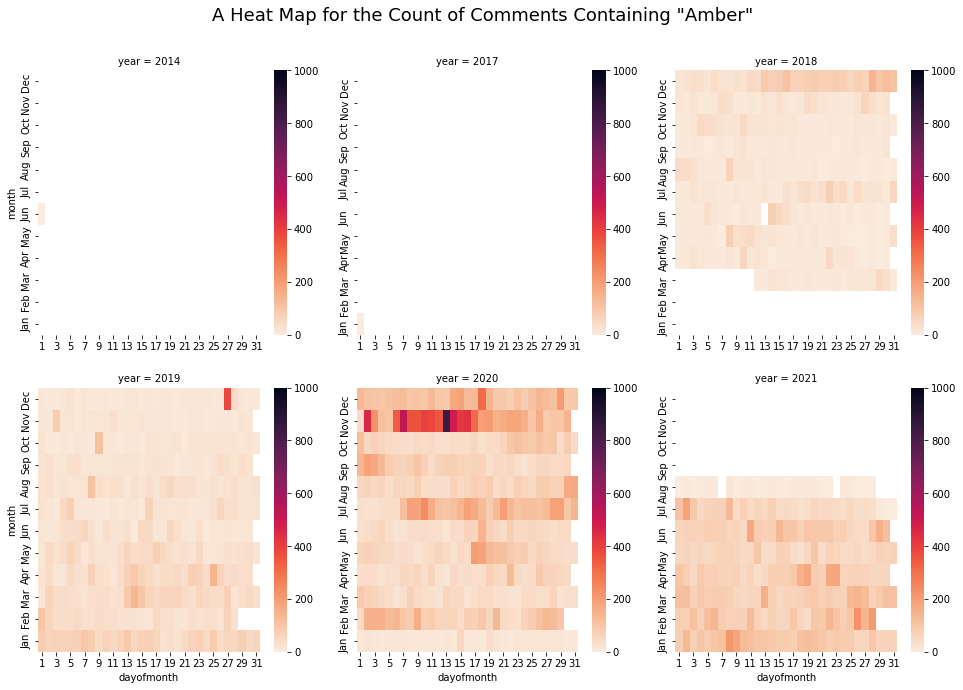

In [155]:
print('\nNote: The peaks Also on Nov 2020\n ')
title = 'A Heat Map for the Count of Comments Containing "Amber"'
facet_heat(amber, title, n_col=3, vmax=1000)

In [156]:
len(amber)

64913

### Most Repeated Comments Containing "Amber"

In [157]:
df = amber.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
6073,#suicidesquad #thewolfofwallstreet #scarlettjo...,1371,263.0,53.0
18907,amber,1206,808.0,32.0
2096,#ashleytisdale #suicidesquad #thewolfofwallstr...,560,2.0,0.0
8319,@amberheard,555,327.0,23.0
868,#amberheardisanabuser,432,1741.0,34.0
2090,#ashleytisdale #suicidesquad #thewolfofwallstr...,415,1.0,0.0
5705,#rockhound #stoneforsale #cabsforsale #jewelry...,404,0.0,0.0
3458,#galgadot #gal #kyliejenner #kyliecosmetics #g...,347,232.0,16.0
29470,fuck amber heard,291,762.0,68.0
18254,[#sabrinapetraglia #agathamoreira #deborasecco...,279,4.0,0.0


In [158]:
amber.message.value_counts().head(10)

#suicidesquad #thewolfofwallstreet #scarlettjohansson #blackwidow #avengers #captainamericacivilwar #avengersinfinitywar #wanda #scarlettwitch #annehathaway #emilyvancamp #katewinslet#angelinajolie #emmawatson #emmastone #selenagomez #imogenpoots #amberheard #natalieportman #leightonmeester #charlizetheron #heathergraham #jessicaalba #keiranightley #rachelmcadams #scarlettjohansson #blackwidow #captainamericacivilwar #avengersinfinitywar #wanda #scarlettwitch #annehathaway #emilyvancamp #katewinslet #angelinajolie #emmawatson #emmastone #selenagomez #rachaeltaylor #amberheard #natalieportman #charlizetheron #heathergraham #jessicaalba #sashabarrese #keiranightley #rachelmcadams#ninadobrev                1371
amber                                                                                                                                                                                                                                                                                     

### Top Users with Comments Containing "Amber"

In [159]:
# The total number of different users with Comments Containing "Amber"
amber.username.nunique()

29475

In [160]:
amber_count = amber.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

amber_count.head(25)


,username,n_comments,n_likes,n_replies
600,_actor_movie,1570,295.0,53.0
3657,ashleytisdale6_,1390,3.0,0.0
8700,edwincuvillier,554,679.0,54.0
26006,sweet_and_caring_,491,369.0,29.0
24888,siachidesign,436,40.0,31.0
21766,petersimp15,359,385.0,78.0
26259,tayabnacer,351,85.0,3.0
4307,beauty.gifted,348,45.0,4.0
5873,cemerondiaz,347,232.0,16.0
22679,razaopetraglia,337,5.0,0.0


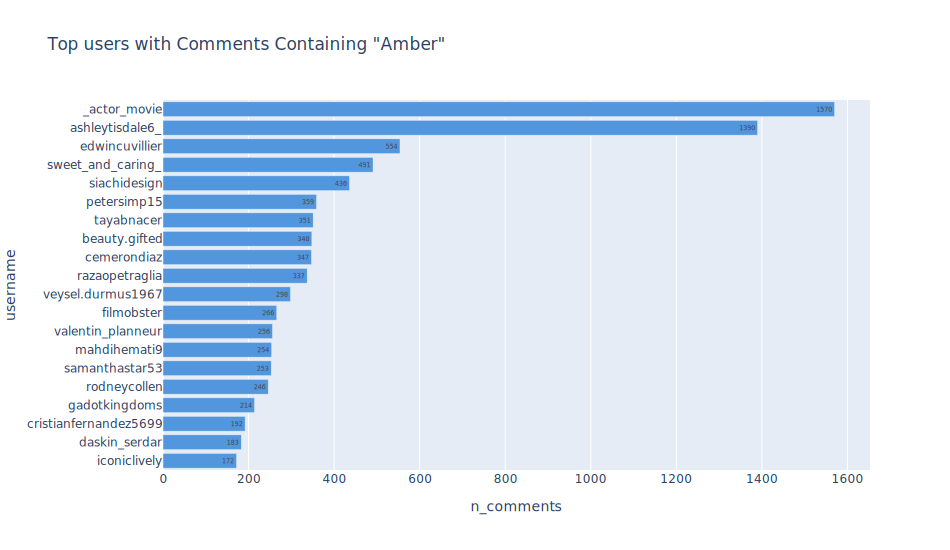

In [161]:
barh(
    amber_count[['username', 'n_comments']].head(20), 'Top users with Comments Containing  "Amber"'
)

### "Amber" Users Contributions on Each Date

In [162]:
df = amber.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
11149,2019-08-08,ashleytisdale6_,98,0.0,0.0
42022,2021-03-13,reach_dream.id,96,0.0,0.0
12054,2019-10-09,ashleytisdale6_,80,0.0,0.0
28375,2020-11-02,queenmusicvidoe,70,14.0,0.0
12414,2019-11-03,ashleytisdale6_,64,1.0,0.0
35282,2020-12-11,kingskippy1987,55,14.0,0.0
23710,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
44603,2021-04-23,charmviktoria,50,50.0,1.0
26785,2020-10-01,ashleytisdale6_,49,0.0,0.0
13612,2020-01-15,ashleytisdale6_,47,0.0,0.0


### "Amber" Date Peaks

In [163]:
df = amber.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
978,2020-11-13,843,15137.0,591.0
972,2020-11-07,531,7875.0,289.0
979,2020-11-14,490,5716.0,95.0
967,2020-11-02,455,1493.0,81.0
981,2020-11-16,431,4383.0,162.0
980,2020-11-15,415,8135.0,157.0
975,2020-11-10,399,1808.0,59.0
976,2020-11-11,384,4257.0,76.0
656,2019-12-27,382,534.0,9.0
973,2020-11-08,364,1901.0,117.0


In [164]:
amber_top = get_top(amber, 'message', 50, 'comment', 'n_repeated')

In [165]:
def get_amber_text(row):
    """
    A function to get texts related to amber.
    Args:
        - row -->  row of column in df.
    Returns:
        - neat --> list of texts related to amber
    """
    row = row.lower()
    result = list(set(re.findall(r"#?[a-z\s]*amber[a-z\s]*", row)))
    neat = []
    for i in result:
        neat.append(i.strip())
    return neat

In [166]:
amber_top.comment.apply(lambda x: get_amber_text(x))

0                         [#amberheard]
1                               [amber]
2                         [#amberheard]
3                          [amberheard]
4               [#amberheardisanabuser]
5                         [#amberheard]
6                         [#amberheard]
7                         [#amberheard]
8                    [fuck amber heard]
9                         [#amberheard]
10                [support amber heard]
11                        [#amberheard]
12                        [amber heard]
13                    [#fuckamberheard]
14                        [#amberheard]
15                 [suport amber heard]
16                        [#amberheard]
17                         [#amberturd]
18    [#amberheard, #amberheardisaliar]
19                        [#amberheard]
20                        [#amberheard]
21                         [amber turd]
22                        [#amberheard]
23                        [#amberheard]
24                        [#amberheard]


In [167]:
top_texts = [list(x)[0] for x in set(tuple(x) for x in amber_top.comment.apply(lambda x: get_amber_text(x)).values)]
top_texts

['amber turd',
 'amberheard',
 '#fireamberheard',
 '#amberturd',
 '#ambertheabuser',
 '#amberheard',
 '#amberheardisanabuser',
 '#fuckamberheard',
 'support amber heard',
 'fuck amber',
 'amber',
 '#boycottamberheard',
 'suport amber heard',
 '#amberheard',
 '#amberheardisaliar',
 'fuck amber heard',
 'amber heard']

<a id='turd'></a>
>>###  Amber Heard Turd
><ul>
 <li><a href="#turd"><b>Amber Turd</b></a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [168]:
turd = [i for i in top_texts if 'turd' in i]
turd.append(' turd')
turd

['amber turd', '#amberturd', ' turd']

In [169]:
# For chedking more than one keyword
# df_turd = amber[amber.message.str.contains("|".join(turd))]
"|".join(turd)

'amber turd|#amberturd| turd'

In [170]:
# Check for the text containing "turd" and not containing "Amber"
print('\nNote: Almost only "saturday" is a misleading result\n')

df_turd = df_comments[df_comments.message.str.contains('turd')]
df_turd[~df_turd.message.str.contains('amber')]['message'].head(30)


Note: Almost only "saturday" is a misleading result



8337                happy saturday 🌹🌹 and sweet 😍 weekend 🙌
20366                                     ambitch turd face
22599                            turd, eat your faeces💩💩💩💩💩
24788                                turd belongs in prison
26874     that dress in number 1 would look a lot better...
27971     i had some pretending to n u yesturday asking ...
31902                    i thought her last name was turd🤔?
32217                                            angry turd
39144     @hichtwo actually, they were defending johnny ...
39694     @recesses_of_my_soul he was mass reported by s...
40552           🤣🤣🤣🤣🤣anyway turd is a crime scene happened😳
45263     wow beautiful back and face side have a great ...
48065                  next up #saturday #morning #cartoons
54874     @turdalievabaia ой ой ой, можно подумать прям ...
60334                        you captured a turd perfectly.
65431     @elai.ne21 he plotted with aturd to use a knif...
67604        @becool.honeybunny nutty as

In [171]:
# Exclude "Saturday" From the DataFrame or use space before turd
df_turd = df_comments[df_comments.message.str.contains('turd')]
df_turd = df_turd[~df_turd.message.str.contains('saturday')]
df_turd.shape

(1788, 16)

### A Heat Map for the Count of Comments Containing "Amber Turd" 

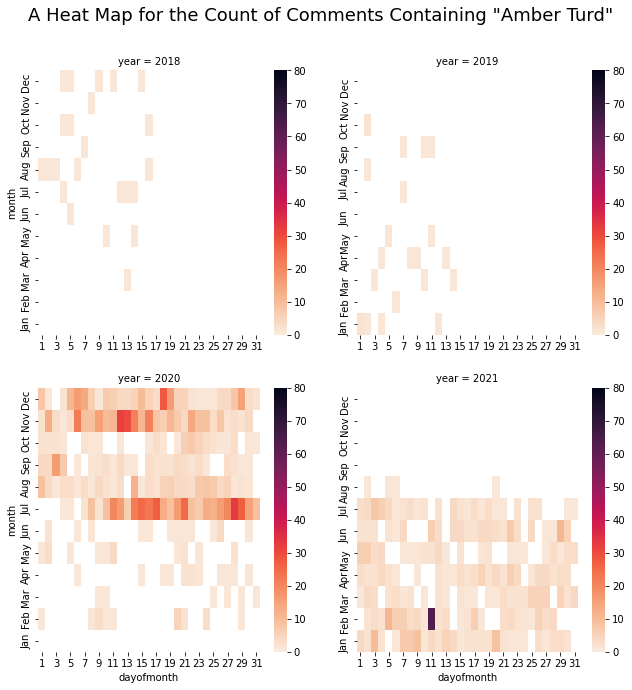

In [172]:
title = 'A Heat Map for the Count of Comments Containing "Amber Turd"'
facet_heat(df_turd, title, n_col=2, vmax=80)

In [173]:
len(df_turd)

1788

### Most Repeated Comments Containing "Amber Turd"

In [174]:
df = df_turd.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
27,#amberturd,125,534.0,5.0
493,amber turd,116,402.0,21.0
1273,،#justiceforjohnnydepp #amberheardisanabuser ...,32,3.0,0.0
556,amber turd 💩,27,86.0,3.0
105,#justiceforjohnnydepp #amberheardisanabuser ...,26,15.0,1.0
1145,turd,21,20.0,0.0
52,#amberturd 💩,11,10.0,0.0
1188,we support you @johnnydepp \n#fuckamberheard @...,10,29.0,0.0
98,#johnnydeppisanangel #johnnydeppisinnocent #ju...,10,81.0,2.0
744,fuck amber turd,9,8.0,0.0


### Top Users Commented "Amber Turd"

In [175]:
# The total number of different users with Comments Containing "Amber"
df_turd.username.nunique()

1074

In [176]:
print('\n"pabloziegl" Got a total of 1074 likes on only 6 comments\n')
df_nturd = df_turd.groupby(['username']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'n_comments'}).sort_values('n_comments', ascending=False)

df_nturd.head(25)


"pabloziegl" Got a total of 1074 likes on only 6 comments



,username,n_comments,n_likes,n_replies
855,sahartaleb___,39,33.0,2.0
1069,zhra.006,36,9.0,2.0
403,hani._cockatiel,35,79.0,3.0
858,samanthastar53,31,47.0,3.0
522,johnnydepp_gothic,26,109.0,2.0
196,c_shortt,18,48.0,2.0
729,natchayaleejin,15,29.0,0.0
323,dylanfrost1995,15,51.0,1.0
707,monsoonglasgow,15,59.0,4.0
339,engajamento800,11,89.0,0.0


In [177]:
neg_users = neg_users|set(df_nturd.username.head(10))

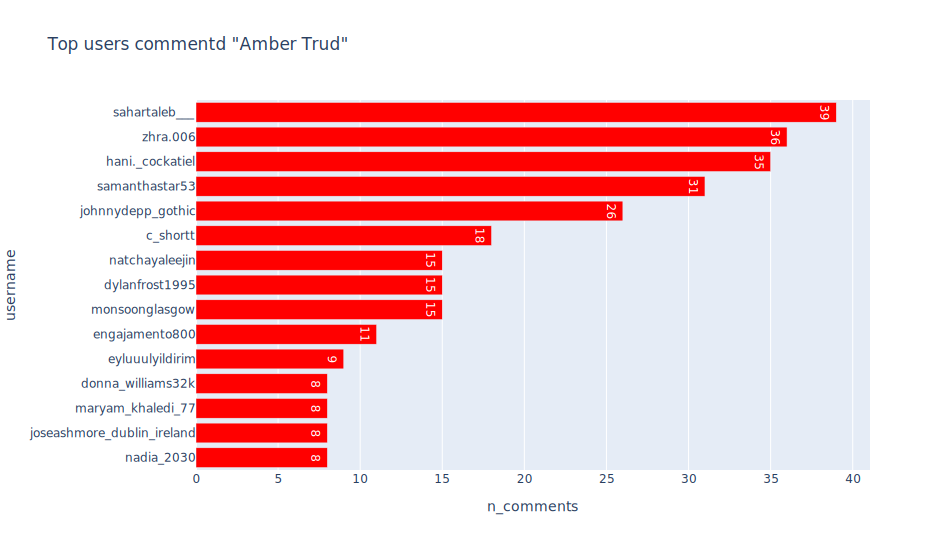

In [178]:
barh(df_nturd[['username', 'n_comments']].head(15), 'Top users commentd "Amber Trud"', 5)

### "Amber Turd" Users Contributions on Each Date

In [179]:
df = df_turd.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
1149,2021-02-11,zhra.006,32,3.0,0.0
1147,2021-02-11,sahartaleb___,30,18.0,1.0
712,2020-11-12,c_shortt,18,48.0,2.0
663,2020-11-06,nadia_2030,8,19.0,1.0
788,2020-11-16,hani._cockatiel,8,5.0,0.0
230,2020-07-17,dontshowmyfacecauseidotherace,7,7.0,0.0
831,2020-11-22,hani._cockatiel,6,10.0,0.0
168,2020-07-14,darknesspreys,6,20.0,0.0
421,2020-07-30,odetchiwa,5,71.0,0.0
687,2020-11-09,johnnydepp_gothic,5,0.0,0.0


### "Amber Turd" Peak Dates

In [180]:
df = df_turd.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
291,2021-02-11,63,23.0,1.0
114,2020-07-28,33,2516.0,13.0
205,2020-11-12,32,148.0,2.0
206,2020-11-13,30,198.0,3.0
240,2020-12-18,28,152.0,0.0
115,2020-07-29,27,79.0,2.0
103,2020-07-17,27,1066.0,21.0
107,2020-07-21,25,146.0,5.0
101,2020-07-15,25,3255.0,3.0
102,2020-07-16,23,65.0,2.0


In [181]:
df_turd['datetime'].max()

Timestamp('2021-08-20 05:08:41')

In [182]:
df_turd['datetime'].min()

Timestamp('2018-03-25 09:26:58')

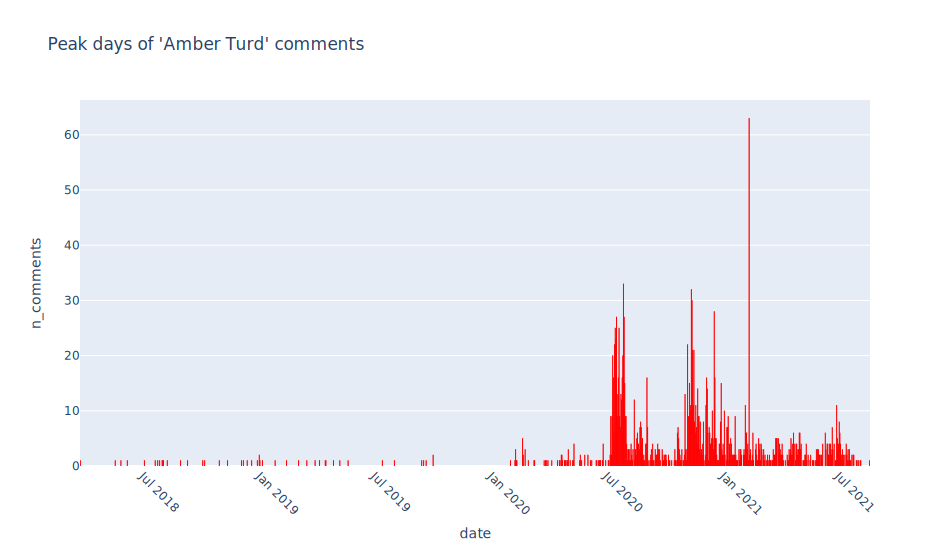

In [183]:
fig = (
    px.bar(
        get_top(df_turd, "date", df_turd.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title = "Peak days of 'Amber Turd' comments"
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show('svg')

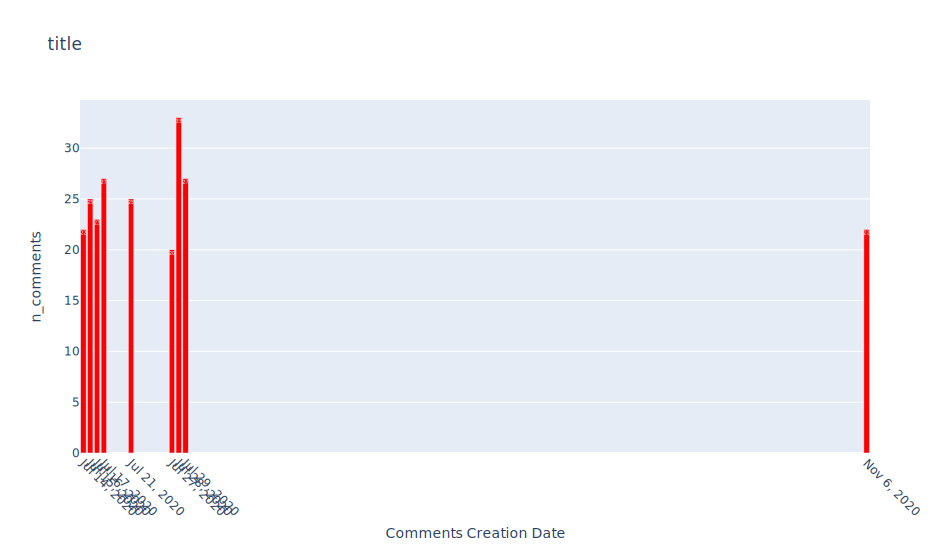

In [184]:
bar_peaks(
    get_top(df_turd, "date", 15, "date", "n_comments").sort_values("date").head(9),
    "title",
)

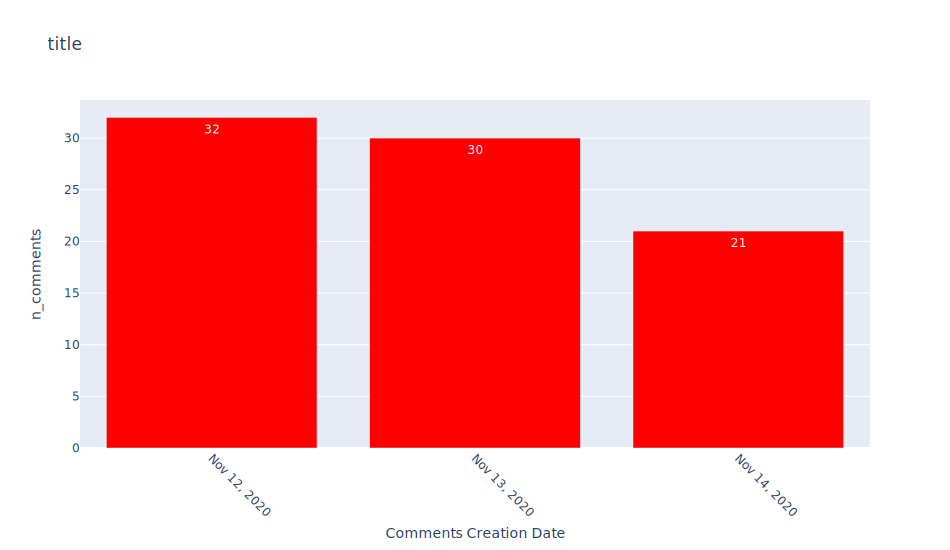

In [185]:
bar_peaks(
    get_top(df_turd, "date", 15, "date", "n_comments").sort_values("date").iloc[9:12],
    "title",
)

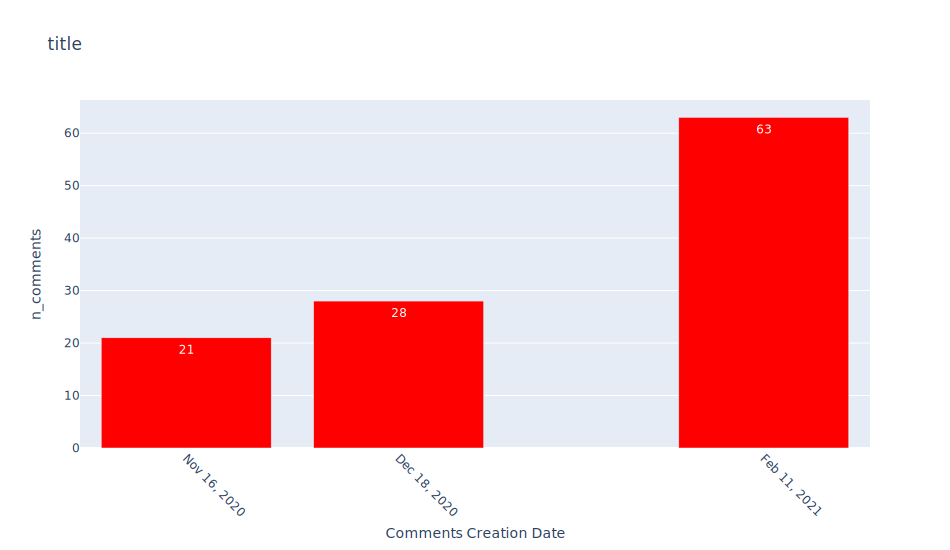

In [186]:
bar_peaks(
    get_top(df_turd, "date", 15, "date", "n_comments").sort_values("date").tail(3),
    "title",
)

#### Time difference

In [187]:
df_turd.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:07    18
0 days 00:00:05     9
0 days 00:00:08     9
0 days 00:00:12     8
0 days 00:00:11     7
0 days 00:00:06     7
0 days 00:00:10     7
0 days 00:00:04     6
0 days 00:00:35     5
0 days 00:00:15     5
0 days 00:00:19     5
0 days 00:00:22     5
0 days 00:00:13     4
0 days 00:00:36     4
0 days 00:00:51     3
Name: datetime, dtype: int64

### pabloziegl
<font color='red'>Got a total of 1074 likes on 6 comments</font>
- first posted on JANUARY 15, 2014
- 88 posts
- 159 followers
- 693 following

In [188]:
df_turd.query("username == 'pabloziegl'").message.value_counts()

fμck amber turd 🤮 #justiceforjohnnydepp                                                                                                                                                               1
@cinder_luna amber turd* 🤮 #justiceforjohnnydepp                                                                                                                                                      1
@getthatknowledge i didn't watch the first one because of this cμnt. fμck amber turd                                                                                                                  1
@nerd_rumble i'm boycotting every and each movie from warner bros. fück them and fück amber turd 🤬 #justiceforjohnnydepp                                                                              1
@shawth over the büllsh¡t about amber turd, that fück¡ng liar 🤬 #justiceforjohnnydepp                                                                                                                 1


we can see most comments were done within seconds!

#### sahartaleb___

In [189]:
df_turd.query(' username == "sahartaleb___"').date.value_counts()

2021-02-11    30
2020-12-15     2
2020-12-12     2
2021-07-06     1
2021-04-22     1
2020-12-14     1
2020-12-01     1
2021-02-21     1
Name: date, dtype: int64

In [190]:
df_turd.query(' username == "sahartaleb___"').datetime.sort_values().diff().sort_values()

645212     0 days 00:00:08
448928     0 days 00:00:08
1016839    0 days 00:00:08
596729     0 days 00:00:09
714036     0 days 00:00:10
1488297    0 days 00:00:10
1429350    0 days 00:00:10
1681881    0 days 00:00:10
653724     0 days 00:00:10
890286     0 days 00:00:11
117282     0 days 00:00:11
223439     0 days 00:00:12
311500     0 days 00:00:12
35003      0 days 00:00:13
1595554    0 days 00:00:13
1546049    0 days 00:00:13
457917     0 days 00:00:14
1639957    0 days 00:00:14
1695600    0 days 00:00:15
135429     0 days 00:00:15
1623453    0 days 00:00:18
762530     0 days 00:00:18
1245449    0 days 00:00:26
908149     0 days 00:00:31
1109418    0 days 00:00:33
1595555    0 days 00:00:38
693823     0 days 00:00:47
1283505    0 days 00:00:53
535471     0 days 00:01:09
1216071    0 days 03:40:50
1223435    0 days 10:04:54
1669428    0 days 23:48:18
1424637    1 days 14:23:41
1639959    9 days 21:03:36
1492271   10 days 03:00:46
1089278   58 days 14:51:46
1275917   59 days 23:43:46
7

In [191]:
df_turd.query(' username == "sahartaleb___"').n_likes.value_counts(), df_turd.query(
    ' username == "sahartaleb___"'
).n_replies.value_counts()

(1.0    18
 0.0    17
 2.0     2
 6.0     1
 5.0     1
 Name: n_likes, dtype: int64,
 0.0    34
 1.0     2
 Name: n_replies, dtype: int64)

#### zhra.006

In [192]:
df_turd.query(' username == "zhra.006"').date.value_counts()

2021-02-11    32
2021-03-12     2
2021-03-03     1
2021-02-21     1
Name: date, dtype: int64

In [193]:
df_turd.query(' username == "zhra.006"').datetime.sort_values().diff().sort_values()

679720    0 days 00:00:04
1429351   0 days 00:00:04
908150    0 days 00:00:04
658408    0 days 00:00:04
1458450   0 days 00:00:05
1189341   0 days 00:00:05
1639958   0 days 00:00:05
135430    0 days 00:00:05
1346161   0 days 00:00:05
364346    0 days 00:00:06
1623454   0 days 00:00:06
1103151   0 days 00:00:06
319768    0 days 00:00:06
448931    0 days 00:00:07
645213    0 days 00:00:07
1283506   0 days 00:00:07
1275153   0 days 00:00:07
745636    0 days 00:00:07
951800    0 days 00:00:07
1058530   0 days 00:00:07
596730    0 days 00:00:07
311501    0 days 00:00:07
1198632   0 days 00:00:07
381534    0 days 00:00:07
746113    0 days 00:00:07
1595556   0 days 00:00:07
693824    0 days 00:00:07
117283    0 days 00:00:08
1089280   0 days 00:00:10
1546050   0 days 00:00:11
1488298   0 days 00:00:24
1655907   0 days 02:13:23
1215602   9 days 00:46:32
531082    9 days 16:56:30
1553725   9 days 23:54:40
1695601               NaT
Name: datetime, dtype: timedelta64[ns]

In [194]:
df_turd.query(' username == "zhra.006"').n_likes.value_counts(), df_turd.query(
    ' username == "zhra.006"'
).n_replies.value_counts()

(0.0    31
 1.0     4
 5.0     1
 Name: n_likes, dtype: int64,
 0.0    35
 2.0     1
 Name: n_replies, dtype: int64)

#### hani._cockatiel 35

In [195]:
df_turd.query(' username == "hani._cockatiel"').date.value_counts()

2020-11-16    8
2020-11-22    6
2020-11-26    4
2020-11-19    4
2020-11-14    2
2020-11-17    2
2020-12-06    2
2021-01-06    1
2020-12-18    1
2021-04-17    1
2020-11-23    1
2021-01-03    1
2020-11-15    1
2020-11-18    1
Name: date, dtype: int64

In [196]:
df_turd.query(' username == "hani._cockatiel"').datetime.sort_values().diff().sort_values()

236307      0 days 00:00:19
481565      0 days 00:00:21
1061159     0 days 00:00:24
1663150     0 days 00:00:35
1124204     0 days 00:00:35
1386279     0 days 00:00:36
221353      0 days 00:00:44
1038072     0 days 00:01:12
30459       0 days 00:01:20
636187      0 days 00:01:24
1274237     0 days 00:01:36
908016      0 days 00:01:55
541120      0 days 00:03:01
133354      0 days 00:03:28
1044356     0 days 00:06:37
1415258     0 days 00:09:11
985597      0 days 00:09:30
987205      0 days 00:14:31
869376      0 days 01:20:54
1347254     0 days 08:36:56
816247      0 days 08:40:58
1470168     0 days 10:58:35
1493986     0 days 18:29:03
1053487     0 days 21:32:13
1404994     0 days 23:32:46
1515736     0 days 23:59:54
1024880     1 days 01:51:23
222804      2 days 09:17:43
908061      3 days 00:02:55
482860      3 days 06:14:12
1628349    10 days 03:58:37
502968     11 days 13:06:24
982528     16 days 12:24:48
590010    101 days 04:53:59
371699                  NaT
Name: datetime, dtyp

In [197]:
df_turd.query(' username == "hani._cockatiel"').n_likes.value_counts(), df_turd.query(
    ' username == "hani._cockatiel"'
).n_replies.value_counts()

(0.0     14
 1.0     11
 3.0      4
 2.0      3
 4.0      1
 37.0     1
 9.0      1
 Name: n_likes, dtype: int64,
 0.0    31
 1.0     3
 Name: n_replies, dtype: int64)

#### johnnydepp_gothic

In [198]:
df_turd.query(' username == "johnnydepp_gothic"').date.value_counts()

2020-11-09    5
2021-02-17    4
2020-12-29    3
2020-12-18    2
2021-01-12    2
2020-07-23    1
2020-12-28    1
2020-11-10    1
2020-08-14    1
2020-12-01    1
2020-11-08    1
2021-02-06    1
2020-11-02    1
2021-01-20    1
2020-10-28    1
Name: date, dtype: int64

In [199]:
df_turd.query(' username == "johnnydepp_gothic"').datetime.sort_values().diff().sort_values()

801015     0 days 00:00:04
353131     0 days 00:00:05
1608741    0 days 00:00:07
385220     0 days 00:00:10
1243824    0 days 00:00:11
1740391    0 days 00:00:16
302480     0 days 00:00:21
1610472    0 days 00:00:51
1544631    0 days 00:01:52
1544458    0 days 01:20:17
502672     0 days 01:49:04
1544500    0 days 18:43:11
503583     0 days 22:43:39
656813     1 days 00:25:43
1615787    5 days 12:25:41
1360933    5 days 22:37:46
1663227    8 days 00:59:24
623234    10 days 03:45:28
1253774   10 days 21:09:47
926458    13 days 22:14:18
502833    17 days 01:10:53
1361828   17 days 01:44:59
1314855   20 days 16:33:06
778824    22 days 07:47:30
1722759   74 days 21:43:31
261673                 NaT
Name: datetime, dtype: timedelta64[ns]

In [200]:
df_turd.query(' username == "johnnydepp_gothic"').n_likes.value_counts(), df_turd.query(
    ' username == "johnnydepp_gothic"'
).n_replies.value_counts()

(0.0     8
 2.0     4
 1.0     4
 8.0     2
 5.0     2
 13.0    1
 10.0    1
 4.0     1
 24.0    1
 17.0    1
 3.0     1
 Name: n_likes, dtype: int64,
 0.0    23
 1.0     2
 Name: n_replies, dtype: int64)

**Amber Heard Turd**
- Top Users:
    - sahartaleb___ 	37
        -  0 posts
        - 42 followers
        - 37 following
        - created around 15 December 2020.
        - 30 comments contain amber turd in 11 feb 2021
        - time difference of comments is only seconds!
        - most comments has no likes or replies.
    - zhra.006 	36
        - user not found
        - 32 comments contain amber turd in 11 feb 2021
        - time difference of comments is only seconds!
        - most comments has no likes or replies.
    - hani._cockatiel 	35
        -  0 posts
        - 60 followers
        - 98 following
        - created around 15 February 2020
        - most comments has no likes or replies.
    - johnnydepp_gothic 	26
        -    131 posts
        - 2,176 followers
        - 336 following
        - created around 15 January 2020
        - has variety of number of replies and likes on his comments.
    - ...
- Top Dates:
    - 2021-02-11 	63
    - 2020-11-12 	31
    - 2020-07-28 	26
    - 2020-12-18 	24
    - ...


<a id='fuck'></a>
>>###  F*ck Amber Heard
><ul>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck"><b>Fuck Amber Heard</b></a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [201]:
fuc = [i for i in top_texts if 'fuck' in i]
fuc

['#fuckamberheard', 'fuck amber', 'fuck amber heard']

In [202]:
fuc = ['fuck amber heard', 'fuck amber', '#fuckamberheard', 'fuck u @amber', 'fuck you @amber', 
       '@amberheard fuck you', 'fuckamber', 'fuck @amber', 'fuck  amber', 'fuck you amber', 'fuck her', 
       'fuck that bitch', 'fuck this bitch', 'fucking bitch', 'fucking abuser', 'fuck herself', 
       'fuck off', 'fuckamberheard', 'fucking bullshit']

In [203]:
neg_text = neg_text|set(fuc)

In [204]:
# Get the most repeated text containing "Amber" and "F*ck"
df_fuc1 = df_comments[df_comments.message.str.contains('fuck')]
df_fuc1 = df_fuc1[df_fuc1.message.str.contains('amber')]
df_fuc1.message.value_counts().head(20)

fuck amber heard                                                                                                                                                                                                                            291
#fuckamberheard                                                                                                                                                                                                                             165
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                    124
fuck amber                                                                                                                                                                                                                                  105
fuck amber heard #justiceforjohnnydepp  

In [205]:
# Get the most repeated text containing "F*ck", but don't contain "Amber" 
df_fuc1 = df_comments[df_comments.message.str.contains('fuck')]
df_fuc1 = df_fuc1[~df_fuc1.message.str.contains('amber')]
df_fuc1.message.value_counts().head(60)

fuck her                                                                               185
🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags                                         85
fuck                                                                                    80
fuck no                                                                                 75
fuck that bitch                                                                         74
fuck you                                                                                63
fuck this bitch                                                                         60
fuck off                                                                                47
what the fuck                                                                           39
fucking bitch                                                                           36
#fuckthesun                                                                             24

In [206]:
# df_fuc1 = df_comments[df_comments.message.str.contains('fuck')]
# df_fuc1.shape

In [207]:
# df_fuc1 = amber[amber.message.str.contains('fuck')]
# df_fuc1.shape

In [208]:
df_fuc1 = df_comments[df_comments.message.str.contains("|".join(fuc))]
df_fuc1.shape

(3488, 16)

### A Heat Map for the Count of Comments Containing "F*ck Amber

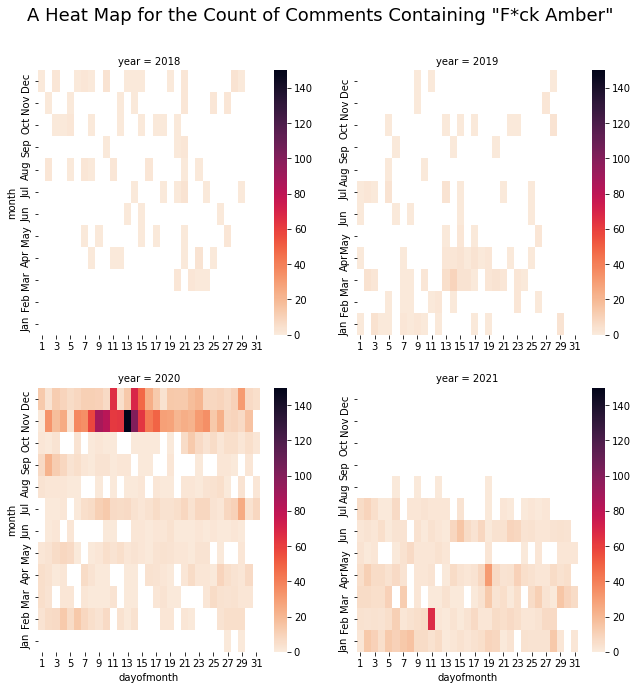

In [209]:
title = 'A Heat Map for the Count of Comments Containing "F*ck Amber"'
facet_heat(df_fuc1, title, n_col=2, vmax=150)

In [210]:
len(df_fuc1)

3488

### Most Repeated Comments Containing "F*ck Amber"

In [211]:
df = df_fuc1.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
706,fuck amber heard,291,762.0,68.0
970,fuck her,185,122.0,14.0
22,#fuckamberheard,165,272.0,7.0
682,fuck amber,105,158.0,3.0
1190,fuck that bitch,74,69.0,19.0
712,fuck amber heard #justiceforjohnnydepp,62,121.0,5.0
1243,fuck this bitch,60,45.0,2.0
1121,fuck off,47,14.0,6.0
800,fuck amber heard! #justiceforjohnnydepp,40,74.0,16.0
1374,fucking bitch,36,0.0,1.0


In [212]:
df_fuc1.message.value_counts().head(10)

fuck amber heard                           291
fuck her                                   185
#fuckamberheard                            165
fuck amber                                 105
fuck that bitch                             74
fuck amber heard #justiceforjohnnydepp      62
fuck this bitch                             60
fuck off                                    47
fuck amber heard! #justiceforjohnnydepp     40
fucking bitch                               36
Name: message, dtype: int64

### Top Users Posted "F*ck Amber Heard"

In [213]:
# The total number of different users with Comments Containing "Amber"
df_fuc1.username.nunique()

2750

In [214]:
df_nfuck1 = df_fuc1.groupby(['username']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'n_comments'}).sort_values('n_comments', ascending=False)

df_nfuck1.head(25)

,username,n_comments,n_likes,n_replies
1475,kingskippy1987,99,148.0,17.0
1128,hosein.sarsam,43,78.0,5.0
2202,sahartaleb___,37,35.0,1.0
2738,zhra.006,35,4.0,0.0
1872,ngnrzi,22,22.0,0.0
533,c_shortt,20,50.0,2.0
1359,johnnydepp_gothic,19,88.0,2.0
2364,staffordcarlis1,15,0.0,0.0
707,dana__milash,14,10.0,0.0
402,ballikaya_defne_7,11,20.0,0.0


In [215]:
neg_users = neg_users|set(df_nfuck1.username.head(25))

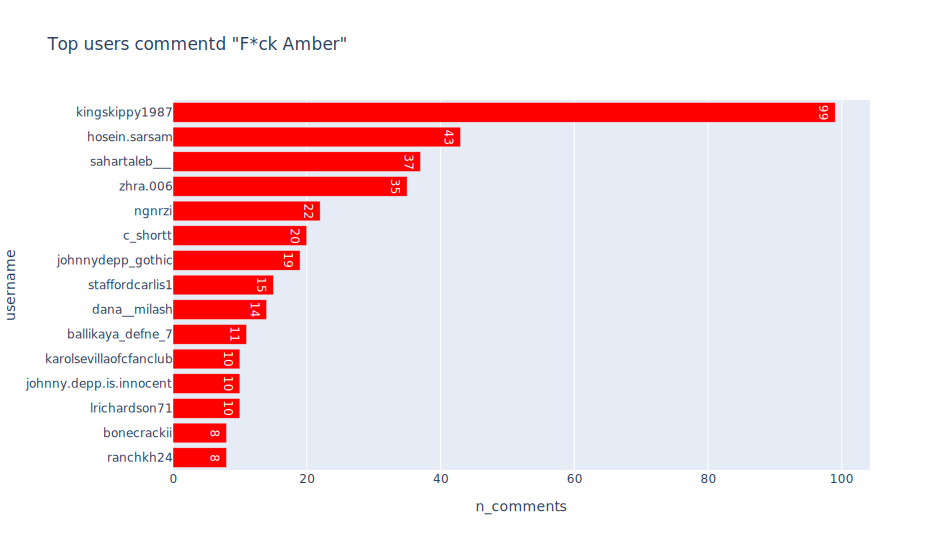

In [216]:
barh(get_top(df_fuc1, 'username', 15, 'username', 'n_comments'), 'Top users commentd "F*ck Amber"', 5)

### "F*ck Amber" Users Contributions on Each Date

In [217]:
df = df_fuc1.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
2044,2020-12-11,kingskippy1987,55,14.0,0.0
2550,2021-02-11,zhra.006,32,3.0,0.0
2548,2021-02-11,sahartaleb___,30,18.0,1.0
1132,2020-11-09,ngnrzi,22,22.0,0.0
1289,2020-11-12,c_shortt,18,48.0,2.0
961,2020-11-04,dana__milash,14,10.0,0.0
2488,2021-01-28,ballikaya_defne_7,10,20.0,0.0
2937,2021-06-15,karolsevillaofcfanclub,10,12.0,2.0
2697,2021-03-29,hosein.sarsam,10,76.0,4.0
2637,2021-03-07,hosein.sarsam,9,0.0,0.0


### "F*ck Amber" Peak Dates

In [218]:
df = df_fuc1.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
369,2020-11-13,157,1516.0,7.0
370,2020-11-14,101,464.0,0.0
365,2020-11-09,88,49.0,0.0
366,2020-11-10,82,71.0,17.0
400,2020-12-14,69,989.0,3.0
457,2021-02-11,67,26.0,1.0
397,2020-12-11,66,15.0,0.0
368,2020-11-12,63,71.0,3.0
371,2020-11-15,63,62.0,4.0
367,2020-11-11,62,88.0,2.0


In [219]:
df_fuc1['datetime'].max()

Timestamp('2021-08-19 12:05:33')

In [220]:
df_fuc1['datetime'].min()

Timestamp('2018-03-22 01:19:23')

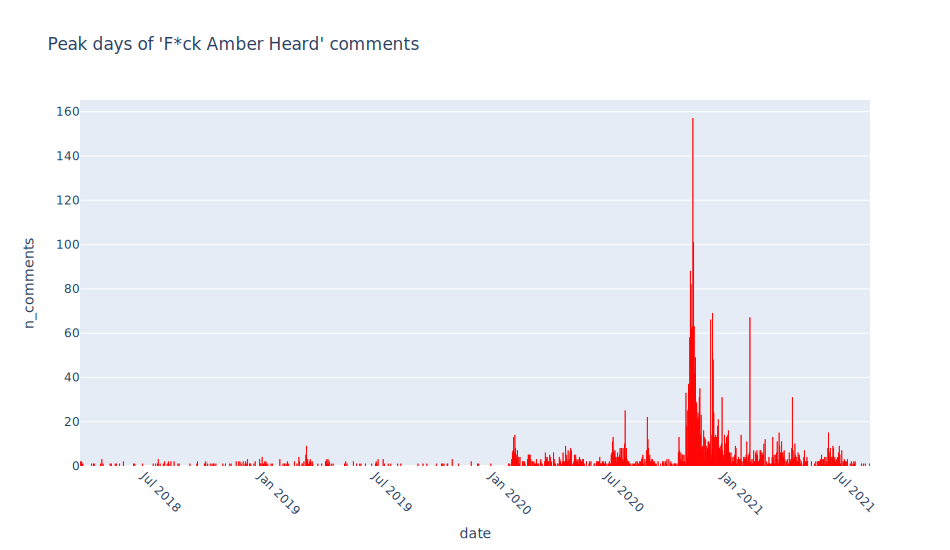

In [221]:
fig = (
    px.bar(
        get_top(df_fuc1, "date", df_fuc1.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'F*ck Amber Heard' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

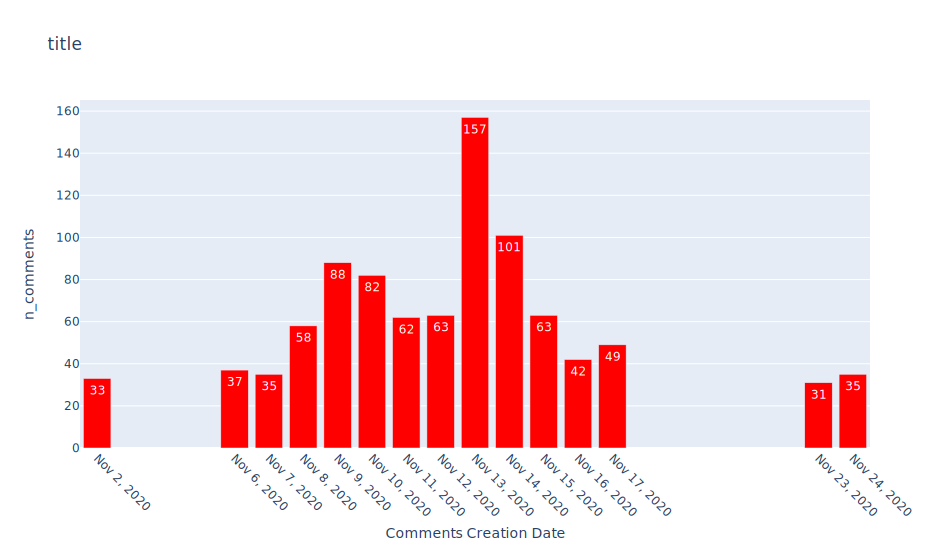

In [222]:
bar_peaks(
    get_top(df_fuc1, "date", 20, "date", "n_comments").sort_values("date").head(15),
    "title",
)

#### Time difference

In [223]:
df_fuc1.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:07    28
0 days 00:00:08    25
0 days 00:00:01    19
0 days 00:00:10    19
0 days 00:00:09    18
0 days 00:00:05    17
0 days 00:00:02    17
0 days 00:00:04    15
0 days 00:00:06    12
0 days 00:00:11    11
0 days 00:00:12    11
0 days 00:00:13    11
0 days 00:00:03     9
0 days 00:00:15     9
0 days 00:00:26     8
Name: datetime, dtype: int64

In [224]:
get_top(df_fuc1, 'username', 15, 'username', 'n_comments').iloc[:8].username.values

array(['kingskippy1987', 'hosein.sarsam', 'sahartaleb___', 'zhra.006',
       'ngnrzi', 'c_shortt', 'johnnydepp_gothic', 'staffordcarlis1'],
      dtype=object)

#### kingskippy1987

In [225]:
df_fuc1.query('username == "kingskippy1987"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)


datetime       
0 days 00:00:08    11
0 days 00:00:09    10
0 days 00:00:10     7
0 days 00:00:07     6
0 days 00:00:26     3
0 days 00:00:16     2
0 days 00:00:24     2
0 days 00:00:12     2
0 days 00:00:11     2
0 days 01:52:54     1
0 days 01:00:23     1
1 days 00:26:39     1
0 days 04:10:34     1
0 days 04:42:52     1
0 days 04:42:54     1
0 days 06:07:34     1
0 days 06:38:11     1
0 days 12:50:36     1
0 days 17:22:33     1
0 days 18:27:10     1
dtype: int64

In [226]:
df_fuc1.query('username == "kingskippy1987"').n_likes.value_counts(), df_fuc1.query(
    ' username == "kingskippy1987"'
).n_replies.value_counts()

(0.0     67
 1.0     10
 2.0      7
 3.0      7
 4.0      3
 13.0     2
 10.0     1
 43.0     1
 12.0     1
 Name: n_likes, dtype: int64,
 0.0    89
 1.0     2
 4.0     1
 3.0     1
 2.0     1
 6.0     1
 Name: n_replies, dtype: int64)

In [227]:
df_fuc1.query('username == "kingskippy1987"').date.value_counts()

2020-12-11    55
2020-12-13     6
2021-01-08     5
2020-12-16     4
2020-12-21     3
2020-12-14     3
2020-12-15     3
2020-12-20     3
2020-12-12     2
2020-12-28     2
2020-12-17     2
2020-11-10     2
2020-12-07     2
2020-12-03     2
2020-11-09     1
2020-12-26     1
2020-12-01     1
2020-12-24     1
2021-01-06     1
Name: date, dtype: int64

#### sahartaleb___

In [228]:
df_fuc1.query('username == "sahartaleb___"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)


datetime        
0 days 00:00:10     5
0 days 00:00:08     3
0 days 00:00:13     3
0 days 00:00:11     2
0 days 00:00:12     2
0 days 00:00:14     2
0 days 00:00:15     2
0 days 00:00:18     2
0 days 00:01:09     1
58 days 14:51:46    1
13 days 03:19:38    1
5 days 21:01:58     1
5 days 16:21:33     1
4 days 04:42:03     1
0 days 03:40:50     1
0 days 00:00:33     1
0 days 00:00:53     1
0 days 00:00:47     1
0 days 00:00:38     1
0 days 00:00:09     1
dtype: int64

In [229]:
df_fuc1.query('username == "sahartaleb___"').n_likes.value_counts(), df_fuc1.query(
    ' username == "sahartaleb___"'
).n_replies.value_counts()

(1.0     17
 0.0     16
 2.0      2
 11.0     1
 3.0      1
 Name: n_likes, dtype: int64,
 0.0    33
 1.0     1
 Name: n_replies, dtype: int64)

In [230]:
df_fuc1.query('username == "sahartaleb___"').date.value_counts()

2021-02-11    30
2020-12-15     2
2021-02-27     1
2021-07-06     1
2021-02-17     1
2020-12-01     1
2021-02-21     1
Name: date, dtype: int64

#### zhra.006

In [231]:
df_fuc1.query('username == "zhra.006"').datetime.sort_values().diff().sort_values()

679720    0 days 00:00:04
1429351   0 days 00:00:04
908150    0 days 00:00:04
658408    0 days 00:00:04
1458450   0 days 00:00:05
1189341   0 days 00:00:05
1639958   0 days 00:00:05
135430    0 days 00:00:05
1346161   0 days 00:00:05
364346    0 days 00:00:06
1623454   0 days 00:00:06
1103151   0 days 00:00:06
319768    0 days 00:00:06
448931    0 days 00:00:07
645213    0 days 00:00:07
1283506   0 days 00:00:07
1275153   0 days 00:00:07
745636    0 days 00:00:07
951800    0 days 00:00:07
1058530   0 days 00:00:07
596730    0 days 00:00:07
311501    0 days 00:00:07
1198632   0 days 00:00:07
381534    0 days 00:00:07
746113    0 days 00:00:07
693824    0 days 00:00:07
1595556   0 days 00:00:07
117283    0 days 00:00:08
1089280   0 days 00:00:10
1546050   0 days 00:00:11
1488298   0 days 00:00:24
1655907   9 days 02:59:55
531082    9 days 16:56:30
1553725   9 days 23:54:40
1695601               NaT
Name: datetime, dtype: timedelta64[ns]

In [232]:
df_fuc1.query('username == "zhra.006"').n_likes.value_counts(), df_fuc1.query(
    ' username == "zhra.006"'
).n_replies.value_counts()

(0.0    31
 1.0     4
 Name: n_likes, dtype: int64,
 0.0    35
 Name: n_replies, dtype: int64)

In [233]:
df_fuc1.query('username == "zhra.006"').date.value_counts()

2021-02-11    32
2021-03-03     1
2021-02-21     1
2021-03-12     1
Name: date, dtype: int64

#### ngnrzi

In [234]:
df_fuc1.query('username == "ngnrzi"').datetime.sort_values().diff().sort_values()

314318   0 days 00:00:01
314320   0 days 00:00:01
314314   0 days 00:00:02
314316   0 days 00:00:02
314317   0 days 00:00:02
314319   0 days 00:00:02
314321   0 days 00:00:02
314331   0 days 00:00:02
314333   0 days 00:00:02
314325   0 days 00:00:03
314327   0 days 00:00:04
314330   0 days 00:00:04
314332   0 days 00:00:04
314323   0 days 00:00:04
314329   0 days 00:00:05
314328   0 days 00:00:05
314322   0 days 00:00:05
314334   0 days 00:00:07
314326   0 days 00:00:17
314315   0 days 00:00:18
314324   0 days 00:00:29
314313               NaT
Name: datetime, dtype: timedelta64[ns]

In [235]:
df_fuc1.query('username == "ngnrzi"').n_likes.value_counts(), df_fuc1.query(
    ' username == "zhra.006"'
).n_replies.value_counts()

(1.0    22
 Name: n_likes, dtype: int64,
 0.0    35
 Name: n_replies, dtype: int64)

In [236]:
df_fuc1.query('username == "ngnrzi"').date.value_counts()

2020-11-09    22
Name: date, dtype: int64

#### c_shortt

In [237]:
df_fuc1.query('username == "c_shortt"').datetime.sort_values().diff().sort_values()

837863    0 days 00:00:04
424219    0 days 00:00:05
204289    0 days 00:00:05
1223660   0 days 00:00:06
837861    0 days 00:00:08
366749    0 days 00:00:08
1037198   0 days 00:00:08
1084150   0 days 00:00:08
366746    0 days 00:00:11
155509    0 days 00:00:13
554433    0 days 00:00:15
1225504   0 days 00:00:19
837864    0 days 00:00:19
203507    0 days 00:00:36
663617    0 days 00:00:54
871784    0 days 00:02:05
837859    0 days 00:26:41
1310789   0 days 01:12:57
663615    0 days 13:25:22
102981                NaT
Name: datetime, dtype: timedelta64[ns]

In [238]:
df_fuc1.query('username == "c_shortt"').n_likes.value_counts(), df_fuc1.query(
    ' username == "c_shortt"'
).n_replies.value_counts()

(1.0     7
 0.0     4
 3.0     3
 5.0     2
 4.0     2
 2.0     1
 14.0    1
 Name: n_likes, dtype: int64,
 0.0    14
 1.0     2
 Name: n_replies, dtype: int64)

In [239]:
df_fuc1.query('username == "c_shortt"').date.value_counts()

2020-11-12    18
2020-11-11     2
Name: date, dtype: int64

#### johnnydepp_gothic

In [240]:
df_fuc1.query('username == "johnnydepp_gothic"').datetime.sort_values().diff().sort_values()

801015     0 days 00:00:04
353131     0 days 00:00:05
1608741    0 days 00:00:07
385220     0 days 00:00:10
1243824    0 days 00:00:11
1740391    0 days 00:00:16
302480     0 days 00:00:21
1544631    0 days 00:00:55
1544458    0 days 01:20:17
1544507    0 days 18:44:08
503583     0 days 22:43:39
656813     1 days 00:25:43
1663227    8 days 01:00:15
1253774   10 days 21:09:47
926458    13 days 22:14:18
1361828   17 days 01:44:59
1314855   20 days 16:33:06
623234    27 days 06:45:25
1360933                NaT
Name: datetime, dtype: timedelta64[ns]

In [241]:
df_fuc1.query('username == "johnnydepp_gothic"').n_likes.value_counts(), df_fuc1.query(
    ' username == "johnnydepp_gothic"'
).n_replies.value_counts()

(0.0     8
 1.0     2
 2.0     2
 5.0     2
 13.0    1
 10.0    1
 24.0    1
 8.0     1
 17.0    1
 Name: n_likes, dtype: int64,
 0.0    16
 1.0     2
 Name: n_replies, dtype: int64)

In [242]:
df_fuc1.query('username == "johnnydepp_gothic"').date.value_counts()

2020-11-09    5
2021-02-17    4
2020-12-29    3
2020-12-28    1
2020-11-10    1
2021-01-12    1
2020-12-01    1
2020-11-08    1
2021-02-06    1
2021-01-20    1
Name: date, dtype: int64

#### johnny.depp.is.innocent

In [243]:
df_fuc1.query('username == "johnny.depp.is.innocent"').datetime.sort_values().diff().sort_values()

926413      0 days 00:00:01
1643074     0 days 00:00:54
1410212     0 days 00:01:06
535473      0 days 00:01:42
922724      0 days 00:02:08
961273      0 days 00:04:20
234298      1 days 00:53:43
926412     68 days 00:56:39
1120475   108 days 23:49:45
1200539                 NaT
Name: datetime, dtype: timedelta64[ns]

In [244]:
df_fuc1.query('username == "johnny.depp.is.innocent"').n_likes.value_counts(), df_fuc1.query(
    ' username == "johnny.depp.is.innocent"'
).n_replies.value_counts()

(1.0    5
 0.0    3
 3.0    1
 2.0    1
 Name: n_likes, dtype: int64,
 0.0    9
 Name: n_replies, dtype: int64)

In [245]:
df_fuc1.query('username == "johnny.depp.is.innocent"').date.value_counts()

2021-05-08    5
2021-01-19    3
2020-11-11    1
2020-11-10    1
Name: date, dtype: int64

**F*ck Amber Heard**
- Top Users:
    - kingskippy1987 	99
        - created around April 2019
        -     136 posts
        - 88 followers
        - 98 following
        - 55 comments in 2020-12-11.
        - most comments have 0 likes and 0 replies.
        - comments were made within seconds.
    - sahartaleb___ 	37
        - created around 15 December 2020
        -  0 posts
        - 42 followers
        - 37 following
        - most comments has one like, no replies.
        - 30 comments in 2021-02-11
    - zhra.006 	35
        - user not found
        - 32 comments contain amber turd in 11 feb 2021
        - time difference of comments is only seconds!
        - most comments has no likes or replies.
  
    - ngnrzi 	22
        - user not found.
        - all comments were made in the saame day 2020-11-09.
        - all comments has 1 like, 0 reply.
        - all comments within seconds.
        
    - c_shortt 	20
         - created around February 2017.
         -     681 posts
        - 3,006 followers
        - 2,265 following
        - private account.
        - comments were made in 2 days:
            - 2020-11-12    18
            - 2020-11-11     2
        - low number of likes 1 or 0.
        - most comments wihtin seconds.
    - johnnydepp_gothic 	19
        -    131 posts
        - 2,176 followers
        - 336 following
        - created around 15 January 2020
        - has variety of number of replies and likes on his comments but most of them are 0.
        - made comments in those dates:
            - 2020-11-09    5
            - 2021-02-17    4
            - 2020-12-29    3
    - johnny.depp.is.innocent 	10
        -     3 posts
        - 195 followers
        - 116 following
        - made  posts in those dates:
            - 2021-05-08    5
            - 2021-01-19    3
            - 2020-11-10    1
            - 2020-11-11    1
        - 0 likes on comments.
        - has some replies in his comments.
        - created around 15 December 2020.
    - ...
- Top Dates:
    - 2021-02-11 	66
    - 2020-11-09 	64
    - 2020-11-13 	64
    - 2020-12-11 	56
    - 2020-11-10 	50
    - 2020-11-12 	44
    - 2020-11-11 	43

<a id='liar'></a>
>>###  Amber Heard is a liar
><ul>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar"><b>Amber Heard is a liar</b></a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [246]:
liar = [i for i in top_texts if 'liar' in i]
liar

['#amberheardisaliar']

In [247]:
# Comments that contains liar but don't contain "Amber"
df_liar = df_comments[df_comments.message.str.contains('liar')]
df_liar[~df_liar.message.str.contains('amber')].message.value_counts().head(20)

liar                                                                                                                                                                                                                                                                                                                                                                                                      61
classic liar💩🤦🏻‍♀️👏🏽😂 justice for #johnnydepp                                                                                                                                                                                                                                                                                                                                                              6
she is a liar                                                                                                                                                                                                 

In [248]:
df_liar.message.value_counts().head(10)

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 124
[#maleficent #super8 #gingerandrosa #weboughtazoo #maryshelley #theneondemon #galveston #thebeguiled #aboutray #ithinkwearealonenow #20thcenturywomen #howtotalktogirlsatparties #teenspirit #sidneyhall #allthebrightplaces #dakotafanning #angelinajolie #chloemoretz #nicolekidman #annehathaway #amberheard #lilycollins #lucyhale #lil

### A Heat Map for the Count of Comments Containing "Liar"

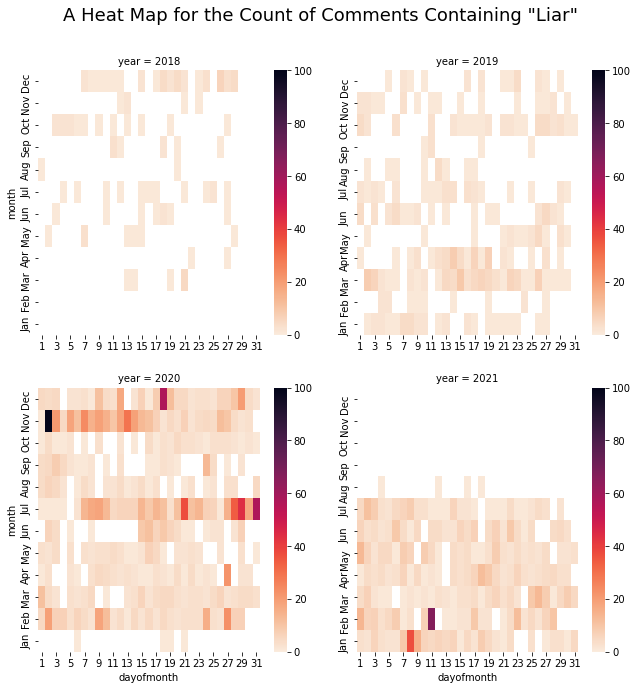

In [249]:
title = 'A Heat Map for the Count of Comments Containing "Liar"'
facet_heat(df_liar, title, n_col=2, vmax=100)

In [250]:
len(df_liar)

3134

### Most Repeated Comments Containing "Liar"

In [251]:
df = df_liar.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
616,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
943,[#maleficent #super8 #gingerandrosa #weboughta...,117,13.0,0.0
50,#amberheardisaliar,76,331.0,1.0
1509,liar,61,18.0,0.0
25,#amberheard #amberheardisanabuser #amberhearda...,51,3.0,0.0
1229,everyone who is a fan of amber heard please l...,44,76.0,63.0
91,#amberheardisanabuserandliar,42,112.0,3.0
2236,،#justiceforjohnnydepp #amberheardisanabuser ...,32,3.0,0.0
113,#amberisaliar,27,124.0,0.0
209,#justiceforjohnnydepp #amberheardisanabuser ...,26,15.0,1.0


### Top Users Commented with "Liar"

In [252]:
# The total number of different users posted justiceforjohnnydepp
df_liar.username.nunique()

1786

In [253]:
df_nliar = df_liar.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nliar.head(25)


,username,n_comments,n_likes,n_replies
603,feelselle,71,13.0,0.0
1392,queenmusicvidoe,70,14.0,0.0
165,amberheardabottleofwineopen,51,3.0,0.0
1413,razaopetraglia,48,0.0,0.0
1483,samanthastar53,46,78.0,7.0
884,johnnyforever_2005,43,79.0,63.0
1391,queenmusicvideo,41,0.0,0.0
1782,zhra.006,41,57.0,2.0
1725,wewantjusticeforjohnnydepp,37,7.0,0.0
1476,sahartaleb___,34,20.0,1.0


In [254]:
neg_users = neg_users|set(df_nliar.username.head(10))

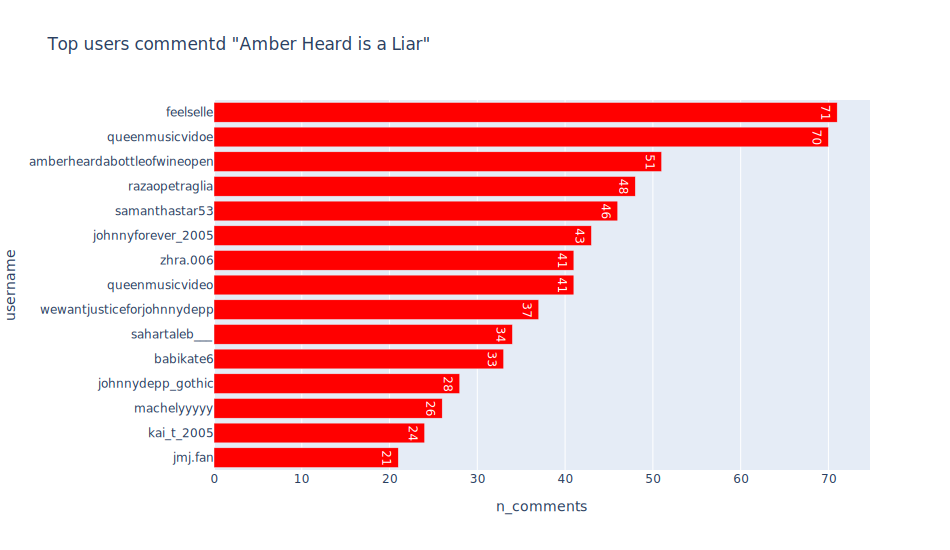

In [255]:
barh(get_top(df_liar, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Amber Heard is a Liar"', 20)

### "Amber Heard is a Liar" Users Contributions on Each Date

In [256]:
df = df_liar.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
1287,2020-11-02,queenmusicvidoe,70,14.0,0.0
1107,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
1286,2020-11-02,queenmusicvideo,41,0.0,0.0
1274,2020-11-02,babikate6,33,11.0,0.0
1849,2021-02-11,zhra.006,32,3.0,0.0
1847,2021-02-11,sahartaleb___,30,18.0,1.0
674,2020-04-27,blancx_agender,19,18.0,1.0
1555,2020-12-12,johnnyforever_2005,16,30.0,58.0
537,2020-02-27,razaopetraglia,15,0.0,0.0
527,2020-02-24,razaopetraglia,15,0.0,0.0


### "Amber Heard is a Liar" Peak Dates

In [257]:
df = df_liar.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
470,2020-11-02,229,61.0,12.0
565,2021-02-11,67,24.0,1.0
514,2020-12-18,57,197.0,0.0
401,2020-07-31,57,29.0,7.0
399,2020-07-29,44,60.0,1.0
391,2020-07-21,37,49.0,3.0
535,2021-01-08,37,126.0,6.0
398,2020-07-28,34,77.0,0.0
481,2020-11-13,29,34.0,4.0
475,2020-11-07,24,13.0,1.0


In [258]:
df_liar['datetime'].max()

Timestamp('2021-08-18 23:13:18')

In [259]:
df_liar['datetime'].min()

Timestamp('2018-03-14 02:55:42')

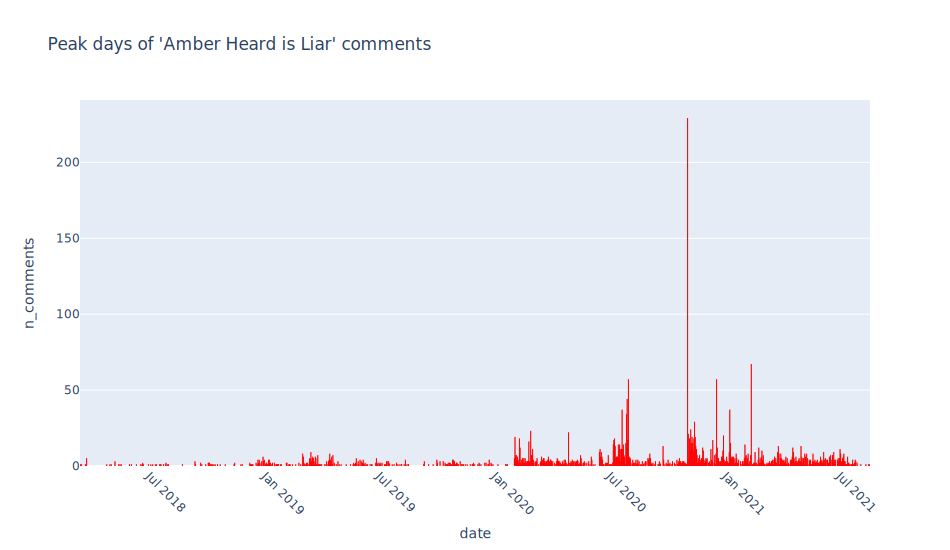

In [260]:
fig = (
    px.bar(
        get_top(df_liar, "date", df_liar.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Amber Heard is Liar' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

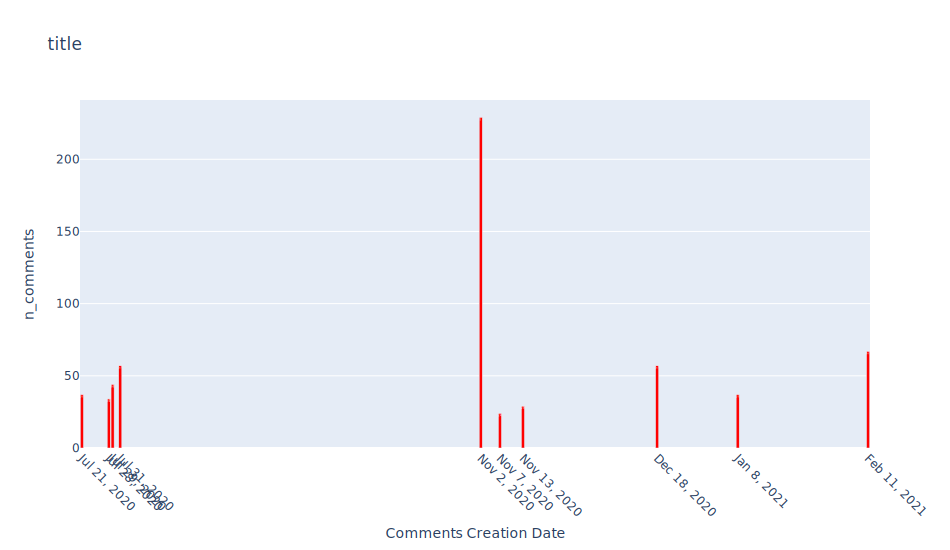

In [261]:
bar_peaks(
    get_top(df_liar, "date", 10, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [262]:
df_liar.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:04    52
0 days 00:00:03    47
0 days 00:00:05    44
0 days 00:00:02    42
0 days 00:00:08    31
0 days 00:00:07    30
0 days 00:00:06    29
0 days 00:00:10    20
0 days 00:00:13    16
0 days 00:00:01    16
0 days 00:00:12    11
0 days 00:00:11    10
0 days 00:00:09    10
0 days 00:00:14    10
0 days 00:00:17    10
Name: datetime, dtype: int64

In [263]:
df_liar.username.value_counts().head(15)

feelselle                      71
queenmusicvidoe                70
amberheardabottleofwineopen    51
razaopetraglia                 48
samanthastar53                 46
johnnyforever_2005             43
zhra.006                       41
queenmusicvideo                41
wewantjusticeforjohnnydepp     37
sahartaleb___                  34
babikate6                      33
johnnydepp_gothic              28
machelyyyyy                    26
kai_t_2005                     24
jmj.fan                        21
Name: username, dtype: int64

#### queenmusicvidoe

In [264]:
df_liar.query('username == "queenmusicvidoe"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:05    11
0 days 00:00:04    10
0 days 00:00:02     8
0 days 00:00:06     7
0 days 00:00:08     6
0 days 00:00:03     5
0 days 00:00:07     4
0 days 00:00:09     4
0 days 00:00:13     2
0 days 00:00:01     1
0 days 00:00:26     1
0 days 00:07:08     1
0 days 00:04:31     1
0 days 00:01:08     1
0 days 00:00:40     1
0 days 00:00:12     1
0 days 00:00:25     1
0 days 00:00:15     1
0 days 00:00:14     1
0 days 00:00:10     1
dtype: int64

In [265]:
df_liar.query('username == "queenmusicvidoe"').n_likes.value_counts(), df_liar.query(
    ' username == "queenmusicvidoe"'
).n_replies.value_counts()

(0.0     65
 1.0      4
 10.0     1
 Name: n_likes, dtype: int64,
 0.0    70
 Name: n_replies, dtype: int64)

In [266]:
df_liar.query('username == "queenmusicvidoe"').date.value_counts()

2020-11-02    70
Name: date, dtype: int64

#### johnnyforever_2005

In [267]:
df_liar.query('username == "johnnyforever_2005"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime        
0 days 00:00:42     2
0 days 00:00:10     2
0 days 00:00:08     2
0 days 00:00:15     2
0 days 00:00:30     2
0 days 23:16:54     1
0 days 00:01:43     1
0 days 00:03:05     1
0 days 00:03:08     1
0 days 00:03:59     1
0 days 08:46:06     1
1 days 07:26:00     1
0 days 00:01:10     1
1 days 14:42:50     1
1 days 16:44:28     1
3 days 02:06:39     1
9 days 22:54:10     1
13 days 08:25:56    1
18 days 01:17:14    1
0 days 00:01:11     1
dtype: int64

In [268]:
df_liar.query('username == "johnnyforever_2005"').n_likes.value_counts(), df_liar.query(
    ' username == "johnnyforever_2005"'
).n_replies.value_counts()

(0.0     24
 1.0      7
 2.0      5
 4.0      3
 3.0      2
 28.0     1
 16.0     1
 Name: n_likes, dtype: int64,
 0.0     35
 1.0      4
 2.0      1
 47.0     1
 10.0     1
 Name: n_replies, dtype: int64)

In [269]:
df_liar.query('username == "johnnyforever_2005"').date.value_counts()

2020-12-12    16
2020-12-17     6
2021-01-18     5
2021-01-08     5
2020-12-20     4
2021-01-31     3
2021-04-16     1
2020-12-18     1
2020-12-15     1
2020-12-21     1
Name: date, dtype: int64

#### queenmusicvideo

In [270]:
df_liar.query('username == "queenmusicvideo"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:03    9
0 days 00:00:02    8
0 days 00:00:05    5
0 days 00:00:04    3
0 days 00:00:06    2
0 days 00:00:31    1
0 days 00:38:00    1
0 days 00:29:27    1
0 days 00:11:31    1
0 days 00:00:50    1
0 days 00:00:37    1
0 days 00:00:18    1
0 days 00:00:20    1
0 days 00:00:17    1
0 days 00:00:13    1
0 days 00:00:12    1
0 days 00:00:10    1
0 days 00:48:49    1
dtype: int64

In [271]:
df_liar.query('username == "queenmusicvideo"').n_likes.value_counts(), df_liar.query(
    ' username == "queenmusicvideo"'
).n_replies.value_counts()

(0.0    41
 Name: n_likes, dtype: int64,
 0.0    41
 Name: n_replies, dtype: int64)

In [272]:
df_liar.query('username == "queenmusicvideo"').date.value_counts()

2020-11-02    41
Name: date, dtype: int64

**Amber Heard is Liar**
- Top Users:
    - queenmusicvidoe 	70
        -     0 posts
        - 4 followers
        - 403 following
        -  created around 15 April 2020.
        - all comments (70) were made at 2020-11-02.
        - most of the 0 likes, 0 replies.
    - johnnyforever_2005 	43
        -     233 posts
        - 976 followers
        - 439 following
        - comments were made in those dates:
            - 2020-12-12    16
            - 2020-12-17     6
            - 2021-01-08     5
            - 2021-01-18     5
            - ..
        - most comments were made in seconds.
        - most of the 0 likes, 0 replies.
    - queenmusicvideo 	41
        -     78 posts
        - 1,813 followers
        - 235 following
        - created around 15 August 2020
        - most comments were made in seconds.
        - all comments (41) were made in one day 2020-11-02.
        - all comments 0 replies,0 likes.
    - zhra.006 	39
        - suspeicious account, made all neagative comments related to amber.
    - sahartaleb___ 	33
        -  suspeicious account, made all neagative comments related to amber.
    - babikate6 	33
        -     0 posts
        - 5 followers
        - 21 following
        - created around 15 September 2020
    - johnnydepp_gothic 	28
        -  suspeicious account, made all neagative comments related to amber.
    - wewantjusticeforjohnnydepp 	26
        -     160 posts
        - 1,049 followers
        - 169 following
        - created around 15 December 2020
    - ...
- Top Dates:
    - 2020-11-02 	224
    - 2021-02-11 	62
    - 2020-12-18 	25
    - 2021-01-08 	17
    - 2020-12-12 	16
    - 2020-12-29 	11
    - ..

<a id='abuser'></a>
>>###  Amber Heard is a abuser
><ul>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser"><b>Amber Heard is a abuser</b></a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [273]:
# abuser = [i for i in top_texts if 'abuse' in i]
# abuser = ['abuse', 'abusing', 'ambertheabuser', 'amberheardisanabuser']

### A Heat Map for the Count of Comments Containing "abuser"

In [274]:
df_abuser = df_comments[df_comments.message.str.contains('abus')]

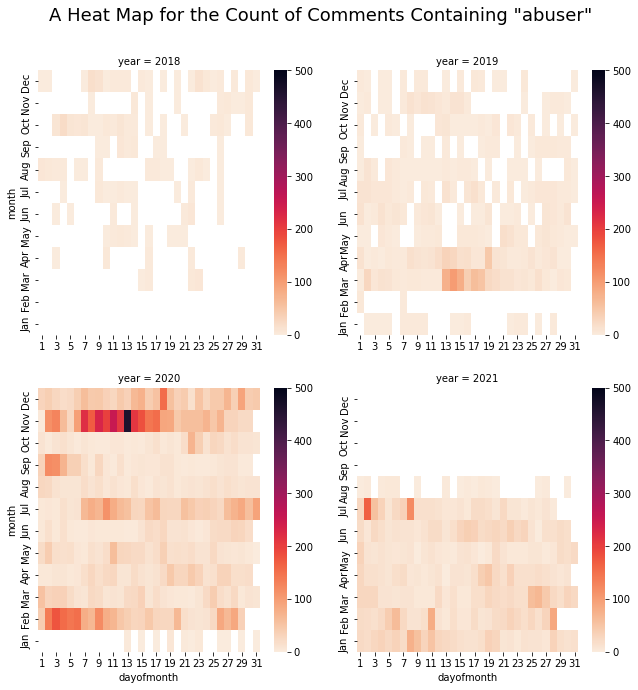

In [275]:
title = 'A Heat Map for the Count of Comments Containing "abuser"'
facet_heat(df_abuser, title, n_col=2, vmax=500)

In [276]:
len(df_abuser)

17574

### Most Repeated Comments Containing "Abuser"

In [277]:
df = df_abuser.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
125,#amberheardisanabuser,432,1741.0,34.0
7779,abuser,346,794.0,21.0
285,#ambertheabuser #justiceforjohnnydepp,93,201.0,2.0
490,#justiceforjohnnydepp #amberheardisanabuser,84,337.0,9.0
189,#amberheardisanabuser #justiceforjohnnydepp,75,232.0,15.0
396,#johnnydepp #deppheadsfolife #winonaryder #jcd...,66,4.0,1.0
65,#amberheard #amberheardisanabuser #amberhearda...,51,3.0,0.0
256,#amberheardistherealabuser,48,85.0,19.0
9365,everyone who is a fan of amber heard please l...,44,76.0,63.0
83,#amberheard #justiceforamberheard #johnnydepp ...,42,16.0,2.0


In [278]:
df_abuser.message.value_counts().head(10)

#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    432
abuser                                                                                                                                                                                                                                                                                                                                     

### Top Users Commented with "Abuser"

In [279]:
# The total number of different users posted justiceforjohnnydepp
df_abuser.username.nunique()

10631

In [280]:
df_nabuser = df_abuser.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nabuser.head(25)


,username,n_comments,n_likes,n_replies
7745,pauu.eg,115,257.0,2.0
2838,deppshit,69,4.0,1.0
275,_dope_black_unicorn_,68,141.0,4.0
8526,samanthastar53,67,143.0,14.0
6276,mackenzilaplante,60,109.0,19.0
5252,justiceforheard,57,24.0,2.0
5060,johnnyforever_2005,53,79.0,63.0
1540,becauseitsjohnnydepp,51,546.0,7.0
970,amberheardabottleofwineopen,51,3.0,0.0
1948,c_shortt,50,154.0,5.0


In [281]:
neg_users = neg_users|set(df_nabuser.username.head(25))

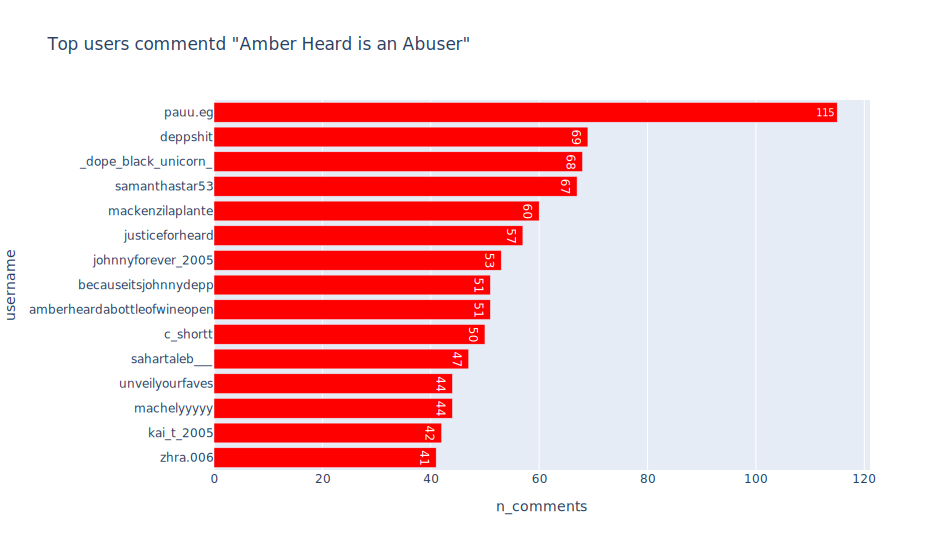

In [282]:
barh(get_top(df_abuser, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Amber Heard is an Abuser"', 30)


### "Amber Heard is an Abuser" Users Contributions on Each Date

In [283]:
df = df_abuser.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
5699,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
11387,2021-02-11,zhra.006,32,3.0,0.0
7838,2020-11-11,c_shortt,32,106.0,3.0
11383,2021-02-11,sahartaleb___,31,19.0,1.0
3780,2020-04-22,pauu.eg,28,19.0,0.0
3727,2020-04-19,pauu.eg,27,72.0,0.0
3847,2020-04-27,blancx_agender,19,18.0,1.0
8000,2020-11-12,c_shortt,18,48.0,2.0
9892,2020-12-12,johnnyforever_2005,16,30.0,58.0
3797,2020-04-23,pauu.eg,15,56.0,1.0


### "Amber Heard is an Abuser"  Peak Dates

In [284]:
df = df_abuser.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
648,2020-11-13,459,9213.0,169.0
646,2020-11-11,254,3093.0,72.0
644,2020-11-09,232,1562.0,51.0
642,2020-11-07,219,6553.0,163.0
649,2020-11-14,209,2778.0,84.0
647,2020-11-12,208,3099.0,49.0
645,2020-11-10,199,2113.0,74.0
650,2020-11-15,182,3862.0,71.0
364,2020-02-03,179,6284.0,197.0
643,2020-11-08,171,3354.0,81.0


In [285]:
df_abuser['datetime'].max()

Timestamp('2021-08-30 08:34:23')

In [286]:
df_abuser['datetime'].min()

Timestamp('2018-03-15 20:58:02')

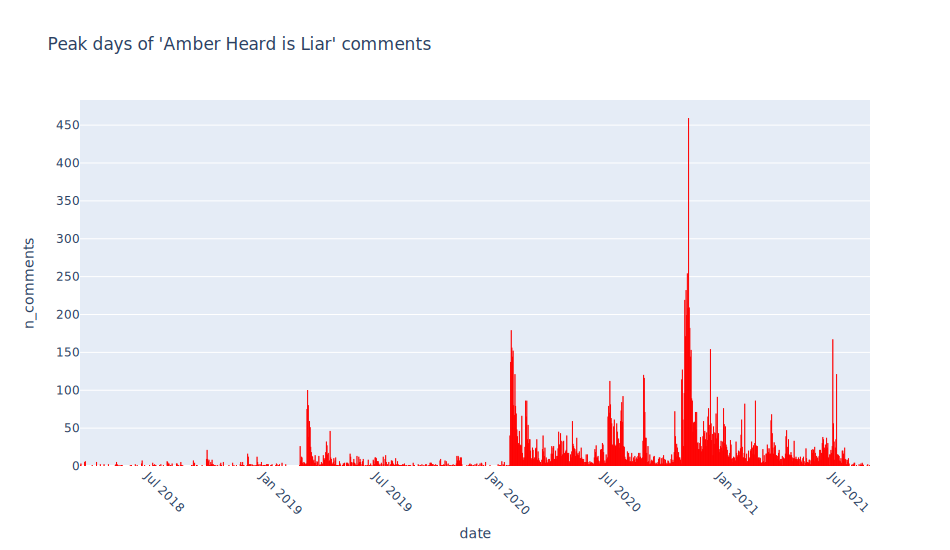

In [287]:
fig = (
    px.bar(
        get_top(df_abuser, "date", df_abuser.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Amber Heard is Liar' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

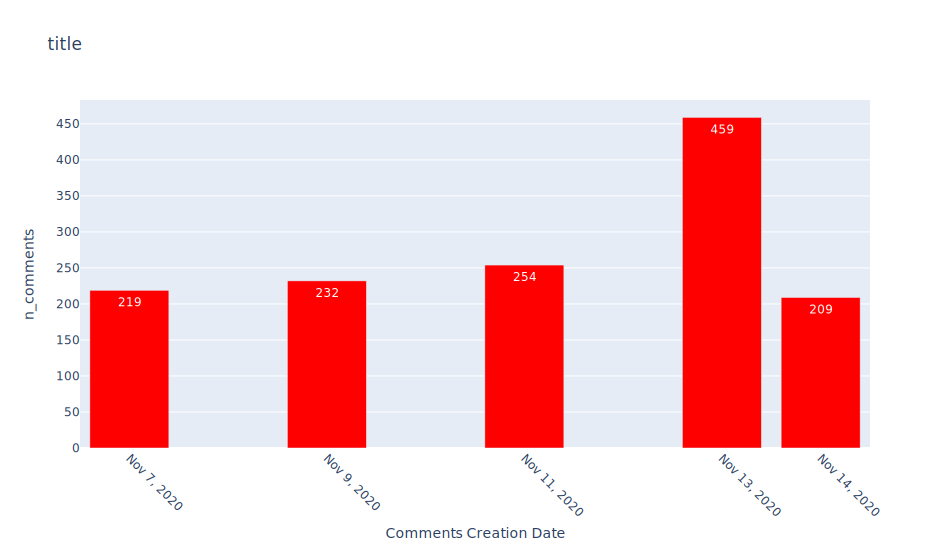

In [288]:
bar_peaks(
    get_top(df_abuser, "date", 5, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [289]:
df_abuser.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:05    74
0 days 00:00:07    64
0 days 00:00:04    63
0 days 00:00:08    63
0 days 00:00:06    52
0 days 00:00:10    49
0 days 00:00:11    47
0 days 00:00:09    43
0 days 00:00:31    42
0 days 00:00:22    42
0 days 00:00:03    41
0 days 00:00:15    39
0 days 00:00:18    39
0 days 00:00:13    39
0 days 00:00:01    37
Name: datetime, dtype: int64

In [290]:
df_abuser.username.value_counts().head(15)

pauu.eg                        115
deppshit                        69
_dope_black_unicorn_            68
samanthastar53                  67
mackenzilaplante                60
justiceforheard                 57
johnnyforever_2005              53
becauseitsjohnnydepp            51
amberheardabottleofwineopen     51
c_shortt                        50
sahartaleb___                   47
unveilyourfaves                 44
machelyyyyy                     44
kai_t_2005                      42
zhra.006                        41
Name: username, dtype: int64

#### pauu.eg

In [291]:
df_abuser.query('username == "pauu.eg"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:03    6
0 days 00:00:06    3
0 days 00:00:00    2
0 days 00:02:51    2
0 days 00:05:45    2
0 days 00:00:41    2
0 days 00:04:10    2
0 days 00:00:22    2
0 days 00:00:20    2
0 days 00:00:53    2
0 days 00:00:09    2
0 days 00:00:08    2
0 days 00:00:02    2
0 days 00:00:05    2
0 days 00:04:44    1
0 days 00:07:33    1
0 days 00:07:26    1
0 days 00:05:57    1
0 days 00:05:33    1
0 days 00:04:52    1
dtype: int64

In [292]:
df_abuser.query('username == "pauu.eg"').n_likes.value_counts(), df_abuser.query(
    ' username == "pauu.eg"'
).n_replies.value_counts()

(1.0     48
 0.0     27
 2.0     20
 3.0      4
 4.0      3
 6.0      3
 7.0      3
 13.0     3
 8.0      1
 26.0     1
 24.0     1
 9.0      1
 Name: n_likes, dtype: int64,
 0.0    113
 1.0      2
 Name: n_replies, dtype: int64)

In [293]:
df_abuser.query('username == "pauu.eg"').date.value_counts()

2020-04-22    28
2020-04-19    27
2020-04-23    15
2020-04-20    10
2020-04-26    10
2020-04-21     9
2020-04-25     6
2020-04-18     4
2020-03-17     3
2020-05-02     2
2020-05-08     1
Name: date, dtype: int64

#### amberheardabottleofwineopen.eg

In [294]:
df_abuser.query('username == "amberheardabottleofwineopen"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:04    21
0 days 00:00:05    19
0 days 00:00:07     4
0 days 00:00:06     3
0 days 00:00:08     2
0 days 00:00:15     1
dtype: int64

In [295]:
df_abuser.query('username == "amberheardabottleofwineopen"').n_likes.value_counts(), df_abuser.query(
    ' username == "amberheardabottleofwineopen"'
).n_replies.value_counts()

(0.0    48
 1.0     3
 Name: n_likes, dtype: int64,
 0.0    51
 Name: n_replies, dtype: int64)

In [296]:
df_abuser.query('username == "amberheardabottleofwineopen"').date.value_counts()

2020-07-31    51
Name: date, dtype: int64

#### samanthastar53

In [297]:
df_abuser.query('username == "samanthastar53"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:44    2
1 days 23:36:55    1
0 days 14:58:54    1
0 days 16:57:47    1
0 days 19:25:05    1
0 days 20:11:48    1
0 days 20:28:43    1
0 days 23:53:33    1
1 days 00:04:43    1
1 days 00:10:33    1
1 days 00:25:44    1
1 days 04:14:32    1
1 days 05:01:16    1
1 days 13:11:27    1
1 days 13:34:38    1
1 days 17:13:42    1
0 days 00:00:15    1
0 days 13:08:12    1
2 days 18:17:54    1
2 days 22:54:47    1
dtype: int64

In [298]:
df_abuser.query('username == "samanthastar53"').n_likes.value_counts(), df_abuser.query(
    ' username == "samanthastar53"'
).n_replies.value_counts()

(0.0     22
 1.0     17
 2.0      8
 3.0      6
 4.0      5
 6.0      2
 5.0      2
 8.0      2
 7.0      1
 9.0      1
 18.0     1
 Name: n_likes, dtype: int64,
 0.0    56
 1.0     5
 5.0     1
 4.0     1
 Name: n_replies, dtype: int64)

In [299]:
df_abuser.query('username == "samanthastar53"').date.value_counts()

2020-11-06    6
2020-12-09    4
2021-01-13    4
2020-12-10    4
2020-11-10    3
2020-11-07    3
2020-12-11    3
2021-01-09    3
2020-11-12    3
2020-11-08    2
2021-01-22    2
2020-12-26    2
2020-12-24    2
2020-11-04    2
2020-12-13    2
2020-11-05    2
2020-11-23    2
2021-02-06    2
2020-11-11    1
2020-11-18    1
2020-12-30    1
2020-12-28    1
2021-02-09    1
2021-03-09    1
2020-11-26    1
2020-12-29    1
2020-12-05    1
2020-11-14    1
2020-12-19    1
2021-03-20    1
2020-11-15    1
2021-01-30    1
2021-02-11    1
2021-01-14    1
Name: date, dtype: int64

**Amber Heard is abuser**
- Top Users:
    - pauu.eg 	115
        -     86 posts
        - 301 followers
        - 153 following
    - amberheardabottleofwineopen 	51
        -     55 posts
        - 51 followers
        - 20 following
    - c_shortt 	50
        - suspeicious account, made all neagative comments related to amber.
    - samanthastar53 	49
        -     5 posts
        - 34 followers
        - 102 following
    - johnnyforever_2005 	43
        - suspeicious account, made all neagative comments related to amber.
    - zhra.006 	40
        - suspeicious account, made all neagative comments related to amber.
    - sahartaleb___ 	38
        - suspeicious account, made all neagative comments related to amber.
    - wewantjusticeforjohnnydepp 	36
        - suspeicious account, made all neagative comments related to amber.
    - diann__lee 	30
        - 79 posts
        - 255 followers
        - 1,443 following
    - johnnydepp_gothic 	29
        - suspeicious account, made all neagative comments related to amber.
    - ...
- Top Dates:
    - 2020-11-11 	73
    - 2020-12-18 	72
    - 2021-02-11 	63
    - 2020-07-31 	56
    - 2020-11-07 	42
    - 2020-11-12 	42
    - ..

<a id='fire'></a>
>>###  Fire Amber Heard
><ul>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire"><b>Fire Amber Heard</b></a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [300]:
# fire = [i for i in top_texts if 'fire' in i]
fire = ['boycottamber', 'fireamberheardfromaquaman', 'fireamberheard', 'fire her', 'fired',
        'fire amber', 'remove amber', 'removeamber', 'remove-amber', 'removed']

In [301]:
neg_text = neg_text|set(fire)

In [302]:
df_fire = df_comments[df_comments.message.str.contains('|'.join(fire))]
df_fire.shape

(3687, 16)

In [303]:
# df_fire.message.value_counts().head(60)

### A Heat Map for the Count of Comments Containing "Fire Amber"

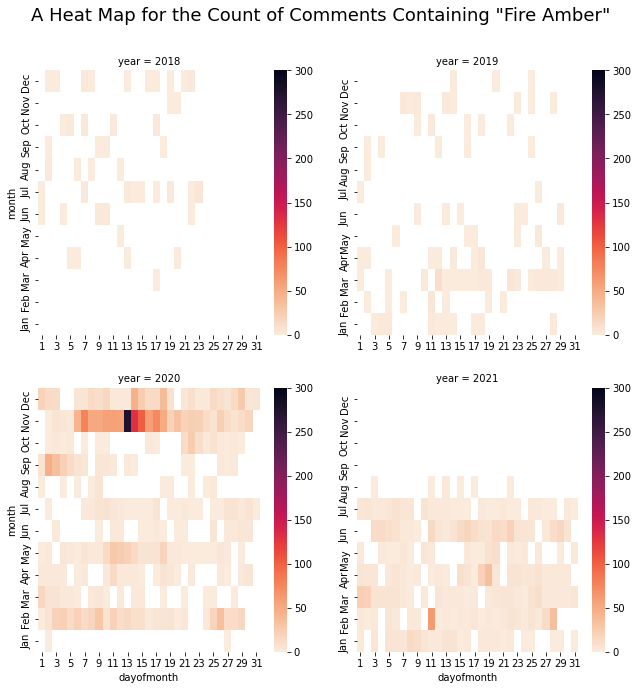

In [304]:
title = 'A Heat Map for the Count of Comments Containing "Fire Amber"'
facet_heat(df_fire, title, n_col=2, vmax=300)

In [305]:
len(df_fire)

3687

### Most Repeated Comments Containing "Fire Amber"

In [306]:
df = df_fire.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
64,#fireamberheard,94,191.0,1.0
20,#boycottamberheard,83,286.0,2.0
1817,https://www.change.org/p/dc-entertainment-remo...,67,91.0,11.0
200,#removeamberheardfromaquaman2,54,941.0,11.0
209,#removeamberheardsfromaquaman2,47,79.0,4.0
2992,،#justiceforjohnnydepp #amberheardisanabuser ...,32,3.0,0.0
123,#justiceforjohnnydepp #amberheardisanabuser ...,26,15.0,1.0
1618,fire her,23,86.0,2.0
1602,fire amber heard,13,72.0,3.0
1320,@wewantjusticeforjohnnydepp #johnnydepp #amber...,12,1.0,0.0


In [307]:
df_fire.message.value_counts().head(10)

#fireamberheard                                                                                                                                                                                                                             94
#boycottamberheard                                                                                                                                                                                                                          83
https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                                                                                                                                                                 67
#removeamberheardfromaquaman2                                                                                                                                                                                                               54
#removeamberheardsfromaquaman2              

### Top Users Commented with "Fire Amber"

In [308]:
# The total number of different users posted justiceforjohnnydepp
df_fire.username.nunique()

2617

In [309]:
df_nfire = df_fire.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nfire.head(25)


,username,n_comments,n_likes,n_replies
2077,samanthastar53,87,141.0,10.0
2608,zhra.006,35,9.0,2.0
2065,sahartaleb___,34,23.0,1.0
2520,wewantjusticeforjohnnydepp,26,2.0,0.0
413,becauseitsjohnnydepp,22,25.0,2.0
759,divulgaaa.bahia,21,56.0,0.0
1486,littleflowerofmercy,20,2458.0,10.0
2397,timv777,19,121.0,3.0
572,chiara_arcozzii_,15,80.0,2.0
744,di22mendez,15,53.0,1.0


In [310]:
neg_users = neg_users|set(df_nfire.username.head(25))

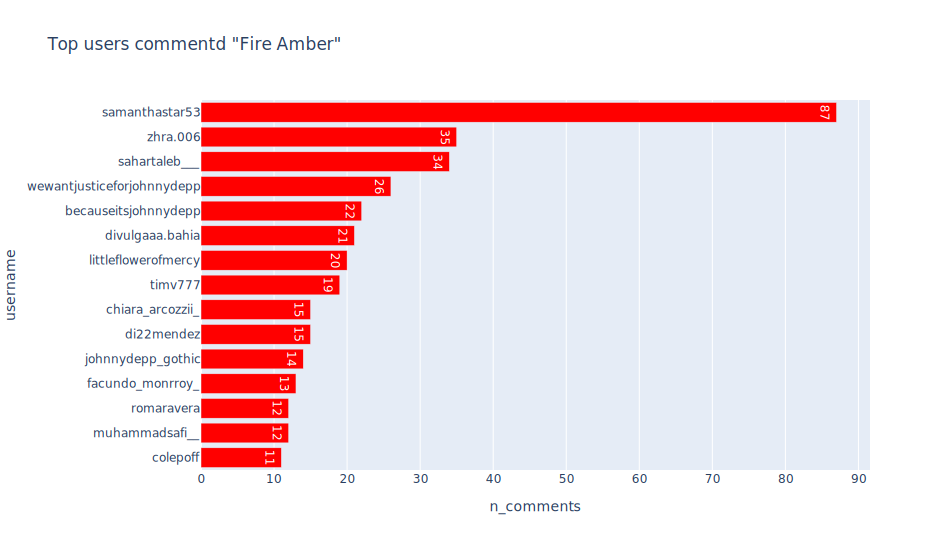

In [311]:
barh(get_top(df_fire, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Fire Amber"', 10)

### "Fire Amber" Users Contributions on Each Date

In [312]:
df = df_fire.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
2443,2021-02-11,zhra.006,32,3.0,0.0
2442,2021-02-11,sahartaleb___,30,18.0,1.0
1426,2020-11-13,di22mendez,15,53.0,1.0
1652,2020-11-14,mackenzilaplante,11,3.0,0.0
1701,2020-11-15,becauseitsjohnnydepp,10,17.0,1.0
1710,2020-11-15,divulgaaa.bahia,9,31.0,0.0
2190,2020-12-14,muhammadsafi__,8,103.0,8.0
523,2020-04-11,romaravera,8,3.0,0.0
2720,2021-04-19,sh_qqp99,8,23.0,0.0
1291,2020-11-11,facundo_monrroy_,7,13.0,0.0


### "Fire Amber" Peak Dates

In [313]:
df = df_fire.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
313,2020-11-13,275,11011.0,99.0
314,2020-11-14,131,212.0,14.0
315,2020-11-15,101,1330.0,13.0
307,2020-11-07,78,3045.0,57.0
317,2020-11-17,74,1166.0,22.0
390,2021-02-11,62,21.0,1.0
316,2020-11-16,59,826.0,29.0
310,2020-11-10,57,284.0,22.0
311,2020-11-11,57,1327.0,2.0
312,2020-11-12,56,2516.0,7.0


In [314]:
df_fire['datetime'].max()

Timestamp('2021-08-22 23:12:22')

In [315]:
df_fire['datetime'].min()

Timestamp('2018-03-25 20:05:51')

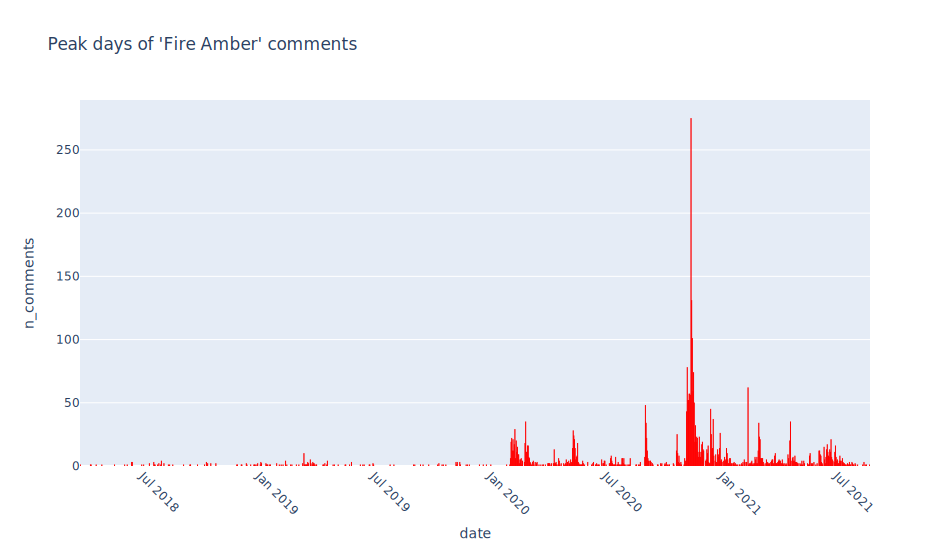

In [316]:
fig = (
    px.bar(
        get_top(df_fire, "date", df_fire.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Fire Amber' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

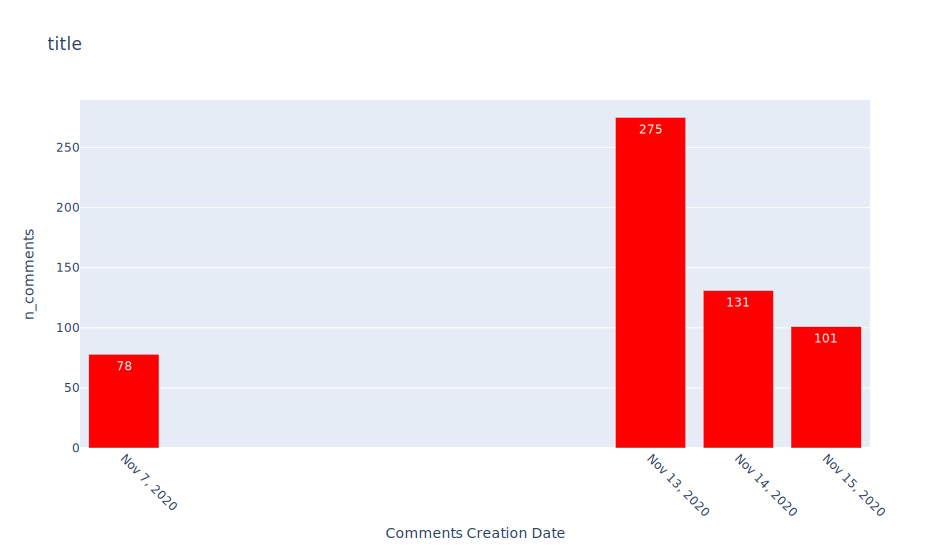

In [317]:
bar_peaks(
    get_top(df_fire, "date", 4, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [318]:
df_fire.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:10    19
0 days 00:00:07    17
0 days 00:00:04    15
0 days 00:00:05    15
0 days 00:00:03    14
0 days 00:00:12    13
0 days 00:00:11    12
0 days 00:00:09    10
0 days 00:00:57     9
0 days 00:00:59     9
0 days 00:00:40     9
0 days 00:00:06     9
0 days 00:00:42     8
0 days 00:00:13     8
0 days 00:00:56     8
Name: datetime, dtype: int64

In [319]:
df_fire.username.value_counts().head(15)

samanthastar53                87
zhra.006                      35
sahartaleb___                 34
wewantjusticeforjohnnydepp    26
becauseitsjohnnydepp          22
divulgaaa.bahia               21
littleflowerofmercy           20
timv777                       19
chiara_arcozzii_              15
di22mendez                    15
johnnydepp_gothic             14
facundo_monrroy_              13
romaravera                    12
muhammadsafi__                12
colepoff                      11
Name: username, dtype: int64

#### divulgaaa.bahia 	

In [320]:
df_fire.query(
    'username == "divulgaaa.bahia" '
).datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime         
0 days 00:00:10      1
0 days 00:00:57      1
15 days 14:56:18     1
15 days 07:21:56     1
4 days 18:47:21      1
1 days 16:10:39      1
0 days 11:18:00      1
0 days 10:54:25      1
0 days 08:33:35      1
0 days 07:35:44      1
0 days 07:11:08      1
0 days 05:32:59      1
0 days 02:28:39      1
0 days 02:08:19      1
0 days 02:04:19      1
0 days 01:59:11      1
0 days 00:31:38      1
0 days 00:26:36      1
0 days 00:01:21      1
154 days 03:56:37    1
dtype: int64

In [321]:
df_fire.query('username == "divulgaaa.bahia"').n_likes.value_counts(), df_fire.query(
    ' username == "divulgaaa.bahia"'
).n_replies.value_counts()

(3.0    4
 1.0    4
 2.0    4
 0.0    4
 7.0    2
 5.0    2
 8.0    1
 Name: n_likes, dtype: int64,
 0.0    21
 Name: n_replies, dtype: int64)

In [322]:
df_fire.query('username == "divulgaaa.bahia"').date.value_counts()

2020-11-15    9
2020-11-14    3
2020-11-16    2
2020-11-18    1
2021-05-26    1
2020-11-17    1
2020-12-08    1
2020-11-13    1
2020-12-23    1
2020-11-22    1
Name: date, dtype: int64

#### isabel.bolivia

In [323]:
df_fire.query(
    'username == "isabel.bolivia" '
).datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime        
2 days 10:41:05     1
4 days 22:30:41     1
7 days 00:45:31     1
10 days 11:23:41    1
10 days 14:02:55    1
12 days 00:05:55    1
22 days 12:54:20    1
dtype: int64

In [324]:
df_fire.query('username == "isabel.bolivia"').n_likes.value_counts(), df_fire.query(
    ' username == "isabel.bolivia"'
).n_replies.value_counts()

(1.0    4
 0.0    2
 2.0    2
 Name: n_likes, dtype: int64,
 0.0    7
 1.0    1
 Name: n_replies, dtype: int64)

In [325]:
df_fire.query('username == "isabel.bolivia"').date.value_counts()

2021-04-27    1
2021-02-23    1
2021-03-25    1
2021-03-07    1
2021-03-12    1
2021-05-04    1
2021-03-15    1
2021-04-17    1
Name: date, dtype: int64

**Fire Amber Heard**
- Top Users:
    - divulgaaa.bahia 	21
        -     21 posts
        - 112 followers
        - 5,991 following
    
    - johnnydepp_gothic 	14
        - suspeicious account, made all neagative comments related to amber.
        - comments repeated within some hours.
    - isabel.bolivia 	8
        -     765 posts
        - 448 followers
        - 2,207 following
        - comments in different times and different dates.
        - vairety of number of likes nd replies but still very low number.
    - pabloziegl 	8
        -     88 posts
        - 165 followers
        - 693 following 
    - sh_qqp99 	8
        -     0 posts
        - 0 followers
        - 230 following
        - Date Joined: 23 June 2015


    - ...
- Top Dates:
    - 2020-11-13 	21
    - 2020-11-14 	21
    - 2020-11-15 	20
    - 2020-12-18 	14
    - 2021-04-19 	13
    - 2020-11-17 	10
    - ..

<a id='support'></a>
>>###  Support Amber Heard
><ul>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support"><b>Support Amber Heard</b></a></li>
 </ul>

In [326]:
support = [i for i in top_texts if 'sup' in i]
support

['support amber heard', 'suport amber heard']

In [327]:
support = support + ['wearewithamber', 'support amber', 'supportamber', 'justice for amber', 'istandwithamber',
                     'wearewithyouamber', 'justiceforamber']

In [328]:
df_support = amber[amber.message.str.contains("|".join(support))]
print(df_support.shape)
df_support.head()

(1177, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
559,support amber heard❤️❤️❤️all the round the wor...,2020-05-22 16:00:29,17848783103108926,0.0,0.0,2314639163877400576,n,29669818597,siachidesign,False,https://www.instagram.com/siachidesign,2020,May,22,2020-05-22,16
1938,@greenloverlola1 real fans of j didn't support...,2020-08-02 12:13:15,18108663892158336,NaN,0.0,2366414216337029120,17870737063857668,36018230242,greenloverlola1,True,https://www.instagram.com/greenloverlola1,2020,Aug,2,2020-08-02,12
2524,#wearewithyouamberheard #amberheard #justicefo...,2020-07-23 20:09:17,17906664943469068,0.0,3.0,2354457800847320576,n,5401459905,zaislice,False,https://www.instagram.com/zaislice,2020,Jul,23,2020-07-23,20
5211,#amberheard #wearewithyouamberheard #istandwit...,2020-07-29 05:58:11,17854249718119956,0.0,0.0,2363466428698750976,n,8890463520,fateme_ajn,False,https://www.instagram.com/fateme_ajn,2020,Jul,29,2020-07-29,5
5672,support amber heard❤️❤️❤️all the round the wor...,2020-07-17 17:12:16,17901918277494104,0.0,0.0,2354674862277974016,n,29669818597,siachidesign,False,https://www.instagram.com/siachidesign,2020,Jul,17,2020-07-17,17


In [329]:
neg_users = neg_users - set(df_support.username)

In [330]:
df_support.message.value_counts()

support amber heard❤️❤️❤️all the round the world my friends                                                                                                                                                                                                                                                                                                   272
suport amber heard❤❤❤ all arount the world my friends                                                                                                                                                                                                                                                                                                         153
[tags: #mera #justiceleague #aquaman #3daystokill #londonfields #theinformers #crazydrive #theward #artist #activist #wearewithyouamberheard]                                                                                                                                                       

In [331]:
get_top(df_support, 'username', 15, 'username', 'n_comments')

,username,n_comments
0,siachidesign,430
1,heardupdate,74
2,motivatornetwork,58
3,justiceforheard,56
4,heardsource,56
5,andmen.1998,40
6,goddesamber,36
7,fateme_ajn,32
8,aheardfan,29
9,amberphotoshoot,27


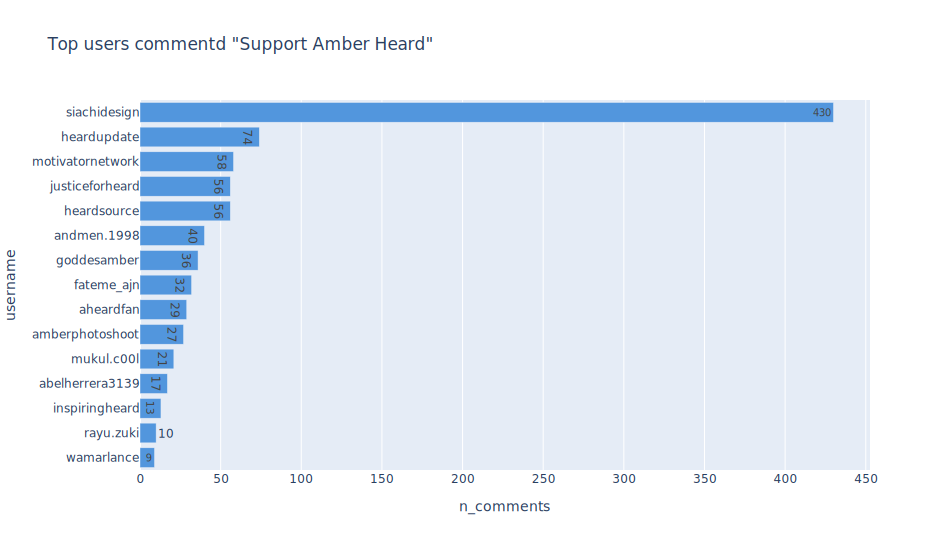

In [332]:
barh(get_top(df_support, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Support Amber Heard"')

In [333]:
df_support['datetime'].max()

Timestamp('2021-08-27 16:58:24')

In [334]:
df_support['datetime'].min()

Timestamp('2018-08-03 18:48:07')

In [335]:
get_top(df_support, 'date', 15, 'date', 'n_comments')

,date,n_comments
0,2020-07-29,25
1,2020-08-04,22
2,2020-07-25,22
3,2020-07-20,22
4,2020-07-23,19
5,2020-07-26,19
6,2020-07-28,17
7,2020-05-21,17
8,2020-07-22,14
9,2020-07-15,14


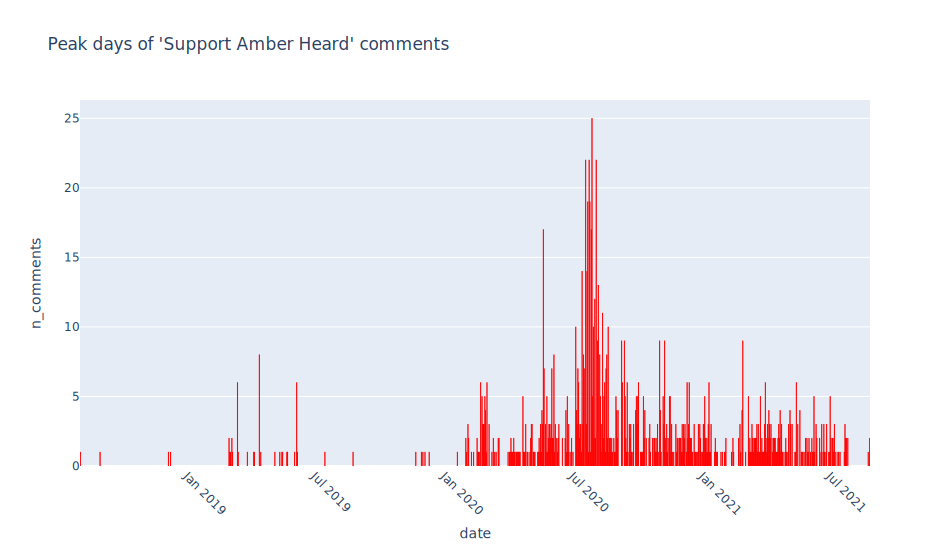

In [336]:
fig = (
    px.bar(
        get_top(df_support, "date", df_support.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Support Amber Heard' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

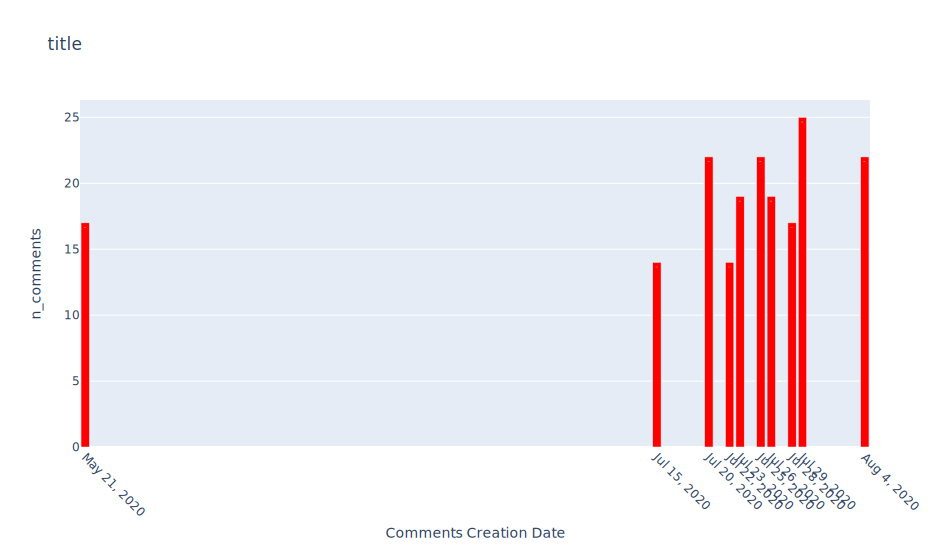

In [337]:
bar_peaks(
    get_top(df_support, "date", 10, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [338]:
df_support.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:21    14
0 days 00:00:17    13
0 days 00:00:08    12
0 days 00:00:18    11
0 days 00:00:20    10
0 days 00:00:28    10
0 days 00:00:07     9
0 days 00:00:15     9
0 days 00:00:06     8
0 days 00:00:10     8
0 days 00:00:13     8
0 days 00:00:12     7
0 days 00:00:27     7
0 days 00:00:25     6
0 days 00:00:39     6
Name: datetime, dtype: int64

In [339]:
get_top(df_support, 'username', 15, 'username', 'n_comments').iloc[:2].username.values

array(['siachidesign', 'heardupdate'], dtype=object)

#### siachidesign

In [340]:
df_support.query('username == "siachidesign"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:08    11
0 days 00:00:21    11
0 days 00:00:20    10
0 days 00:00:18    10
0 days 00:00:17     9
0 days 00:00:07     8
0 days 00:00:28     7
0 days 00:00:15     7
0 days 00:00:06     7
0 days 00:00:13     7
0 days 00:00:16     6
0 days 00:00:27     6
0 days 00:00:25     6
0 days 00:00:12     6
0 days 00:00:11     6
0 days 00:00:10     6
0 days 00:00:09     6
0 days 00:00:39     5
0 days 00:00:30     5
0 days 00:00:37     5
dtype: int64

In [341]:
df_support.query('username == "siachidesign"').n_likes.value_counts(), df_turd.query(
    ' username == "siachidesign"'
).n_replies.value_counts()

(0.0    399
 1.0     29
 2.0      2
 Name: n_likes, dtype: int64,
 Series([], Name: n_replies, dtype: int64))

In [342]:
df_support.query('username == "siachidesign"').date.value_counts()

2020-08-04    21
2020-07-20    21
2020-07-25    21
2020-07-26    19
2020-05-21    15
              ..
2020-09-25     1
2020-10-29     1
2020-11-19     1
2020-08-27     1
2020-06-30     1
Name: date, Length: 96, dtype: int64

#### motivatornetwork

In [343]:
df_support.query('username == "motivatornetwork"').datetime.sort_values().diff().sort_values()

1696880    0 days 00:00:17
554163     0 days 00:00:21
5731       0 days 00:00:22
1622590    0 days 00:00:27
718345     0 days 00:00:32
775967     0 days 00:00:36
248054     0 days 00:00:38
1071072    0 days 00:00:42
351620     0 days 00:00:42
1071065    0 days 00:00:46
248057     0 days 00:01:25
676191     0 days 00:01:26
676190     0 days 00:01:48
226318     0 days 00:01:49
248015     0 days 00:01:59
1696883    0 days 00:02:14
248051     0 days 00:02:19
280769     0 days 00:02:27
212952     0 days 00:03:28
723897     0 days 00:03:33
351622     0 days 00:03:39
1154296    0 days 00:03:57
312359     0 days 00:04:04
764810     0 days 00:05:08
312357     0 days 00:05:18
1018305    0 days 00:06:27
312355     0 days 00:06:39
22049      0 days 00:07:16
525811     0 days 00:10:20
248056     0 days 00:14:25
718339     0 days 00:15:33
130449     0 days 00:15:33
1421541    0 days 00:24:15
1608693    0 days 00:27:20
775961     0 days 00:36:48
1622589    0 days 04:40:53
312363     0 days 05:18:02
1

In [344]:
df_support.query('username == "motivatornetwork"').n_likes.value_counts(), df_support.query(
    ' username == "motivatornetwork"'
).n_replies.value_counts()

(1.0    32
 2.0    14
 3.0     7
 6.0     3
 4.0     1
 0.0     1
 Name: n_likes, dtype: int64,
 0.0    16
 1.0     4
 4.0     3
 8.0     1
 3.0     1
 2.0     1
 Name: n_replies, dtype: int64)

In [345]:
df_support.query('username == "motivatornetwork"').date.value_counts()

2020-06-05    7
2020-02-22    6
2020-02-28    5
2020-02-24    5
2020-02-29    4
2020-03-02    4
2020-02-26    3
2020-03-05    3
2020-02-25    3
2020-07-18    3
2020-04-26    2
2020-03-11    2
2020-02-27    2
2020-03-19    2
2020-03-01    1
2020-03-18    1
2020-02-20    1
2020-03-15    1
2020-02-19    1
2020-07-22    1
2020-02-18    1
Name: date, dtype: int64

**Support Amber Heard**
- Top Users:
    - siachidesign 	430
        -     48 posts
        - 1,320 followers
        - 302 following
        - created around 15 February 2020
        - seems bot, many comments with the same text within seconds.
        - rearly to find like or reply on his comment.
    - motivatornetwork 	55
        -     126 posts
        - 117 followers
        - 214 following.
        - created around November-December 2016.
        - most comments have 1 like or 2 likes, no replies.
    - ...
- Top Dates:
    - 2020-08-04 	21
    - 2020-07-20 	21
    - 2020-07-25 	21
    - 2020-07-26 	19
    - ..

<a id= 'fuck0'></a>
>>### Contains F*ck
> <ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0"><b>Contains "F*ck"</b></a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>    
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

### A Heat Map for the Count of Comments Containing "F*ck" 

In [346]:
df_fuc = df_comments[df_comments["message"].str.contains("fuck")]


Note: The peaks Also on Nov 2020
 


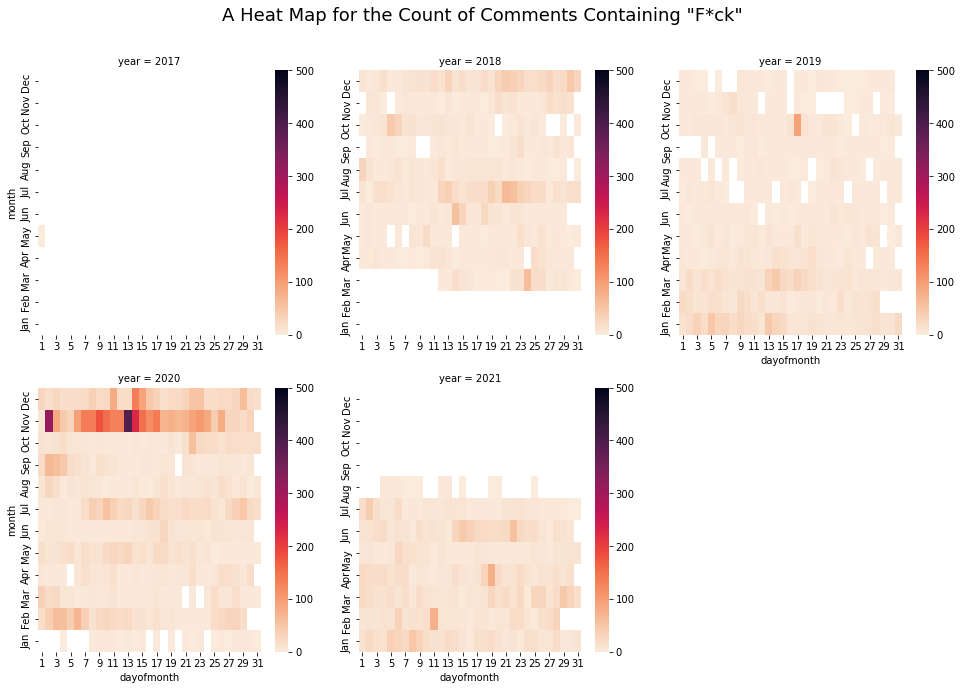

In [347]:
print('\nNote: The peaks Also on Nov 2020\n ')
title = 'A Heat Map for the Count of Comments Containing "F*ck"'
facet_heat(df_fuc, title, n_col=3, vmax=500)

In [348]:
len(df_fuc)

15476

### The Most Repeated Comments Containing "F*ck"

In [349]:
df = df_fuc.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
5245,fuck amber heard,291,762.0,68.0
5635,fuck her,185,122.0,14.0
73,#fuckamberheard,165,272.0,7.0
2144,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
5221,fuck amber,105,158.0,3.0
12882,🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags,85,16.0,3.0
5155,fuck,80,125.0,0.0
5912,fuck no,75,392.0,7.0
6094,fuck that bitch,74,69.0,19.0
6672,fuck you,63,25.0,0.0


### Top Users Commented with "F*ck"

In [350]:
# The total number of different users posted justiceforjohnnydepp
df_fuc.username.nunique()

11865

In [351]:
df_nfuc = df_fuc.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nfuc.head(25)


,username,n_comments,n_likes,n_replies
6285,kingskippy1987,103,151.0,17.0
4195,funkfried4,103,21.0,3.0
8852,queenmusicvidoe,70,14.0,0.0
4791,hosein.sarsam,45,78.0,5.0
8851,queenmusicvideo,41,0.0,0.0
9456,sahartaleb___,37,35.0,1.0
11821,zhra.006,36,5.0,0.0
2137,c_shortt,31,100.0,4.0
10182,staffordcarlis1,30,0.0,0.0
8366,ohgodnotsimone,26,109.0,3.0


### "F*ck" Users Contributions on Each Date

In [352]:
df = df_fuc.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
7763,2020-11-02,queenmusicvidoe,70,14.0,0.0
10695,2020-12-11,kingskippy1987,56,15.0,0.0
7762,2020-11-02,queenmusicvideo,41,0.0,0.0
11938,2021-02-11,zhra.006,32,3.0,0.0
11935,2021-02-11,sahartaleb___,30,18.0,1.0
7694,2020-11-02,babikate6,24,2.0,0.0
8371,2020-11-09,ngnrzi,22,22.0,0.0
8686,2020-11-12,c_shortt,18,48.0,2.0
10206,2020-11-24,bonecrackii,14,34.0,1.0
7890,2020-11-04,dana__milash,14,10.0,0.0


In [353]:
fuc_dates = df_fuc.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

fuc_dates.head(15)

,date,n_comments,n_likes,n_replies
918,2020-11-13,393,7008.0,177.0
907,2020-11-02,314,1615.0,2.0
919,2020-11-14,227,1495.0,29.0
914,2020-11-09,181,681.0,17.0
915,2020-11-10,153,1326.0,35.0
920,2020-11-15,152,1291.0,13.0
922,2020-11-17,139,1248.0,17.0
912,2020-11-07,136,1896.0,50.0
913,2020-11-08,136,191.0,12.0
949,2020-12-14,135,2295.0,21.0


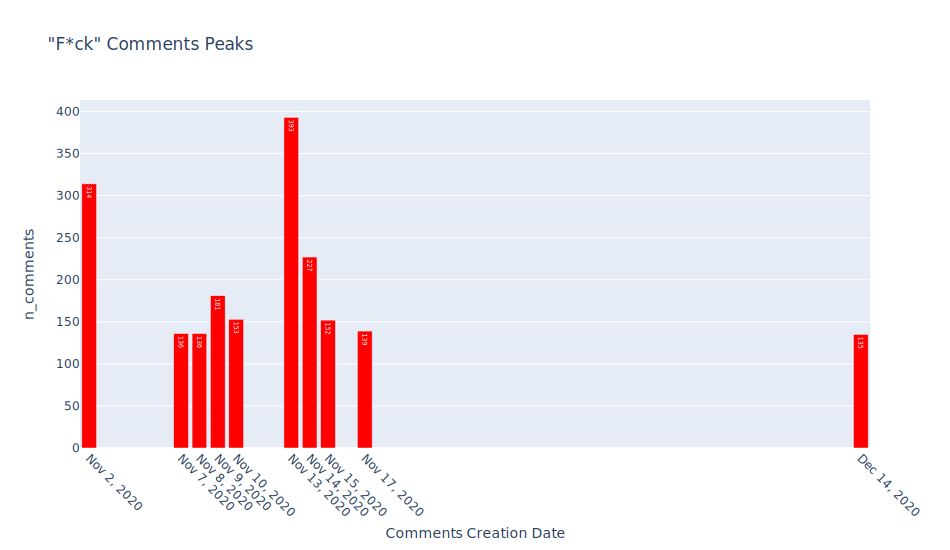

In [354]:
bar_peaks(fuc_dates[['date', 'n_comments']].head(10), '"F*ck" Comments Peaks')

<a id= 'agree'></a>
>>### Contains Agree
> <ul>
 <li><a href="#neg">Negative Comments</a></li>  
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree"><b>Contains "Agree"</b></a></li>
 <li>--------------------------------</li>    
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

In [355]:
df_agree = df_comments[df_comments["message"].str.contains("agree")]
print(df_agree.shape)
df_agree.head()

(5404, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
858,"i’ve been a victim of emotional abuse, the mos...",2020-02-03 00:42:26,18006776428275864,1.0,58.0,2235162134629858816,n,8056784446,uncute.slut,False,https://www.instagram.com/uncute.slut,2020,Feb,3,2020-02-03,0
1184,@lea_seydoux_myplatonicpassion #katyperry #ra...,2021-05-26 12:58:01,17956322701419604,NaN,1.0,2582068684691097088,17882889281210796,9673947311,lea_seydoux_myplatonicpassion,True,https://www.instagram.com/lea_seydoux_myplaton...,2021,May,26,2021-05-26,12
2409,totally agree 😂😂,2020-06-01 03:32:22,18100154578152792,0.0,0.0,2318954103417754624,n,2970832866,noelia.villalta,False,https://www.instagram.com/noelia.villalta,2020,Jun,1,2020-06-01,3
2416,agreeeeeee,2020-06-02 11:23:04,17895069952518566,0.0,1.0,2318954103417754624,n,29391791686,__ilaria22__,False,https://www.instagram.com/__ilaria22__,2020,Jun,2,2020-06-02,11
2419,@amberheard totally reptile 🦎 and i agree with...,2020-06-02 18:05:47,17875233562691908,0.0,1.0,2318954103417754624,n,462111525,shenzrlife02,False,https://www.instagram.com/shenzrlife02,2020,Jun,2,2020-06-02,18


### A Heat Map for the Count of Comments Containing "Agree" 

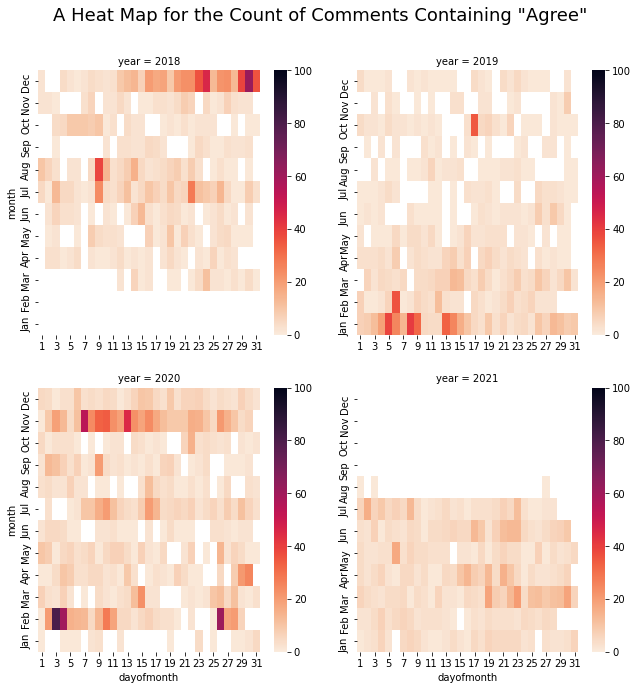

In [356]:
title = 'A Heat Map for the Count of Comments Containing "Agree"'
facet_heat(df_agree, title, n_col=2, vmax=100)

In [357]:
len(df_agree)

5404

### The Most Repeated Comments Containing "Agree"

In [358]:
df = df_agree.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
3043,agree,183,181.0,3.0
3247,agreed,85,69.0,3.0
3719,i agree,46,13.0,3.0
3523,disagree,36,40.0,1.0
3116,agree with caption,25,73.0,0.0
3174,agree!,15,7.0,0.0
3294,agreed!,13,12.0,2.0
742,@cupofmegan #meganfoxedit #meganfoxedits #mega...,13,0.0,0.0
4561,totally agree,13,7.0,0.0
3139,agree with the caption,12,21.0,0.0


### Top Users Commented with "Agree"

In [359]:
# The total number of different users commented with "Agree"
df_agree.username.nunique()

4403

In [360]:
df_nagree = df_agree.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nagree.head(25)


,username,n_comments,n_likes,n_replies
2356,lea_seydoux_myplatonicpassion,61,75.0,0.0
1658,heard_addicted,29,51.0,4.0
2757,missdanicosplay,20,26.0,0.0
2410,liliacypriani,14,21.0,2.0
970,cupofmegan,13,0.0,0.0
1790,imnicolekidmanfan,12,3.0,0.0
4270,wintersoldier121,12,202.0,0.0
449,aquamans_army,11,25.0,0.0
1066,dc_addict,11,34.0,0.0
1720,hottiesofmcu,10,7.0,1.0


### "Agree" Users Contributions on Each Date

In [361]:
df = df_agree.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
1035,2018-12-24,missdanicosplay,6,9.0,0.0
1068,2018-12-26,cine.te.philia,6,7.0,0.0
4700,2021-04-21,the.batfan,6,3.0,0.0
367,2018-07-22,missdanicosplay,5,6.0,0.0
1178,2018-12-30,lane_ch12,5,0.0,0.0
1687,2019-02-12,qwerttyui99000,5,0.0,0.0
3784,2020-11-10,katie_annemlr,5,5.0,0.0
2340,2019-12-23,imnicolekidmanfan,4,1.0,0.0
3870,2020-11-13,mac_alpha_man_stiles,4,3.0,0.0
4044,2020-11-26,charliothy,4,8.0,0.0


In [362]:
agree_dates = df_agree.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

agree_dates.head(15)

,date,n_comments,n_likes,n_replies
536,2020-02-03,80,702.0,11.0
235,2018-12-30,62,295.0,14.0
556,2020-02-26,61,349.0,7.0
537,2020-02-04,60,739.0,17.0
773,2020-11-07,54,238.0,5.0
229,2018-12-24,46,1293.0,10.0
779,2020-11-13,45,774.0,54.0
244,2019-01-08,41,209.0,6.0
241,2019-01-05,39,139.0,6.0
234,2018-12-29,39,162.0,7.0


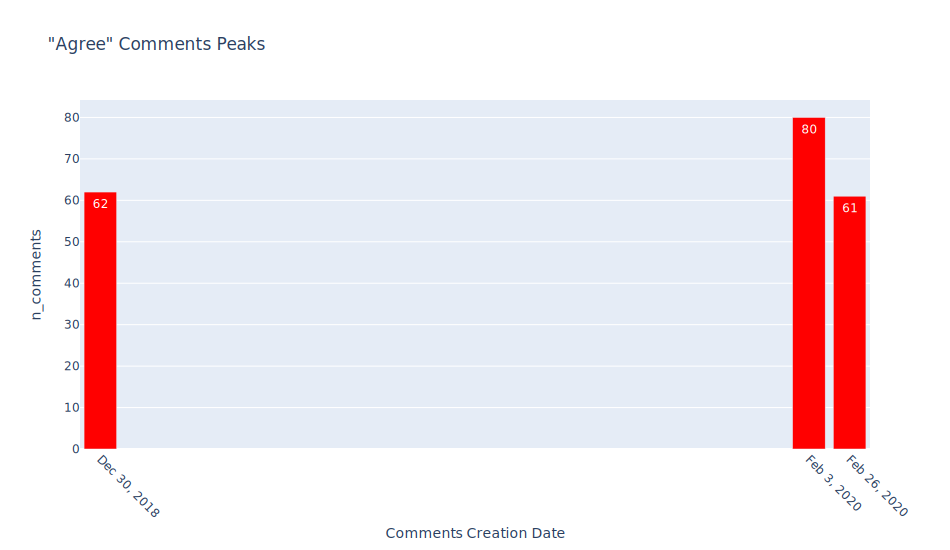

In [363]:
bar_peaks(agree_dates[['date', 'n_comments']].head(3), '"Agree" Comments Peaks')

<a id='sina'></a>
>>### @sinadeinert @sinadeinertcf #sinas22 ❤️
> <ul>
 <li><a href="#neg">Negative Comments</a></li>  
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina"><b>@sinadeinert @sinadeinertcf</b></a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

This comment repeated  418 times in the same day!

In [364]:
df1 = df_comments.query(" message ==@top_repeted[0][0] ").datetime.to_frame()
df1.head()

,datetime
973469,2020-08-24 20:06:15
973470,2020-08-24 20:06:15
973471,2020-08-24 20:06:16
973472,2020-08-24 20:06:17
973473,2020-08-24 20:06:18


In [365]:
df1.groupby(df1.datetime.dt.hour)["datetime"].count().to_frame().rename(
    columns={"datetime": "n_comments"}
).reset_index().rename(columns={"datetime": "hour"})

,hour,n_comments
0,5,219
1,6,187
2,20,12


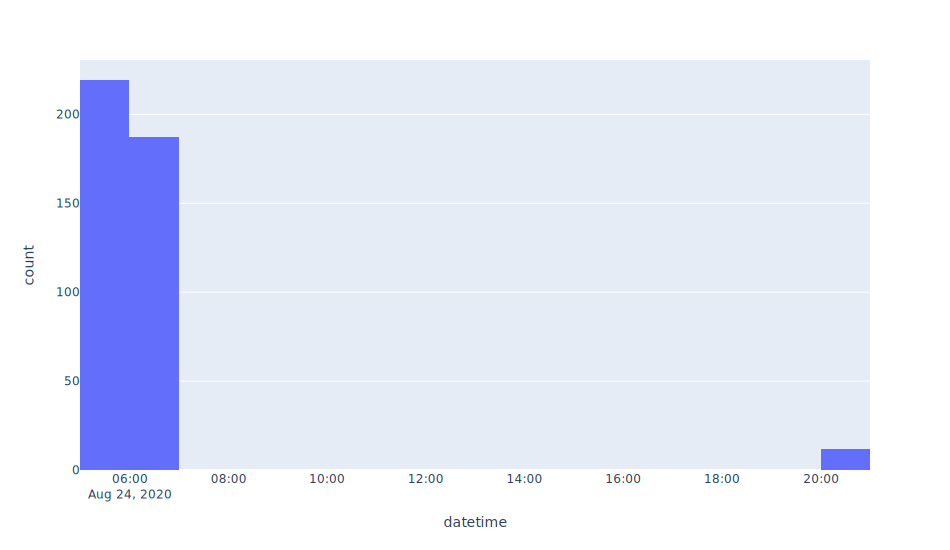

In [366]:
df = df_comments.query(" message ==@top_repeted[0][0] ").datetime.to_frame()
fig = px.histogram(df, x="datetime", nbins=20)
fig.show("svg")

In [367]:
df_comments.query(" message ==@top_repeted[0][0] ").username.value_counts()

sinasbutterfly      364
whogiovanna          25
desativei.dbbdbd     17
ilysmsiina           12
Name: username, dtype: int64

In [368]:
df_comments.query(" message ==@top_repeted[0][0] ").is_verified.value_counts()

False    418
Name: is_verified, dtype: int64

**@sinadeinert @sinadeinertcf #sinas22 ❤️** 
- This comment repeated 418 times in the same day on these hours:
    - 5    219
    - 06   187
     
    - 20   12
- By those users (all of them NOT VERIFIED):
    - sinasbutterfly      364
    -whogiovanna          25
    -desativei.dbbdbd     17
    -ilysmsiina           12
 


### @sinadeinert #sinas22 💕

In [369]:
df_1_1 = df_comments.query(' message =="@sinadeinert #sinas22 💕" ')
df_1_1.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
973476,@sinadeinert #sinas22 💕,2020-08-24 20:23:14,17844181808338172,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973477,@sinadeinert #sinas22 💕,2020-08-24 20:23:14,17844253259336034,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973478,@sinadeinert #sinas22 💕,2020-08-24 20:23:15,17864073887047444,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973479,@sinadeinert #sinas22 💕,2020-08-24 20:23:15,17895144304586232,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973480,@sinadeinert #sinas22 💕,2020-08-24 20:23:16,18069435310235024,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20


In [370]:
df_1_1.shape[0]

207

In [371]:
df_1_1.date.value_counts()

2020-08-24    201
2020-08-25      6
Name: date, dtype: int64

In [372]:
df_1_1.datetime.dt.hour.value_counts()

18    151
23     13
19     13
21     12
20     11
0       6
17      1
Name: datetime, dtype: int64

In [373]:
df_1_1.username.value_counts()

sinasbutterfly      189
whogiovanna          11
desativei.dbbdbd      7
Name: username, dtype: int64

In [374]:
df_1_1.is_verified.value_counts()

False    207
Name: is_verified, dtype: int64

**@sinadeinert #sinas22 💕** 
- This comment repeated 207 times in the same day on these hours:
    - 18    151
    - 19     13
    - 23     13
    - 21     12
    - 20     11
    - 0       6
    - 17      1
- By those users (all of them NOT VERIFIED):
    - sinasbutterfly      189
    - whogiovanna          11
    - desativei.dbbdbd      7
 

### @sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘 @savannah.clarke @heyoon_jeong @alex__dnt @isolde_dnt_

In [375]:
df_1_2 = df_comments.query(
    ' message =="@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘 @savannah.clarke @heyoon_jeong @alex__dnt @isolde_dnt_" '
)
df_1_2.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
973733,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 17:54:37,18160767436023476,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,17
973734,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 17:54:38,17985302140305956,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,17
973820,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 07:32:19,17875881028816088,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,7
973821,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 07:32:20,17873323036885500,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,7
973822,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 07:32:21,17888209621635858,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,7


In [376]:
df_1_2.shape[0]

137

In [377]:
df_1_2.date.value_counts()

2020-08-24    137
Name: date, dtype: int64

In [378]:
df_1_2.datetime.dt.hour.value_counts()

7     135
17      2
Name: datetime, dtype: int64

In [379]:
df_1_2.username.value_counts()

sinasbutterfly    137
Name: username, dtype: int64

In [380]:
df_1_2.is_verified.value_counts()

False    137
Name: is_verified, dtype: int64

**@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘 @savannah.clarke @heyoon_jeong @alex__dnt @isolde_dnt_** 
- This comment repeated 167 times in the same day on these hours:
    - 7     135
    - 17      2
- By this not verifed user:
    - sinasbutterfly    137
 

### @sinadeinert

In [381]:
df_1_3 = df_comments.query(' message =="@sinadeinert" ')
df_1_3.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
613519,@sinadeinert,2020-08-24 17:28:13,17924776702430142,0.0,0.0,2382890348743399424,n,6361102186,desativado123398,False,https://www.instagram.com/desativado123398,2020,Aug,24,2020-08-24,17
613520,@sinadeinert,2020-08-24 17:28:15,17884496128706744,0.0,0.0,2382890348743399424,n,6361102186,desativado123398,False,https://www.instagram.com/desativado123398,2020,Aug,24,2020-08-24,17
613526,@sinadeinert,2020-08-24 17:34:36,18130303330128104,0.0,0.0,2382890348743399424,n,35352867118,always.bangttan,False,https://www.instagram.com/always.bangttan,2020,Aug,24,2020-08-24,17
613564,@sinadeinert,2020-08-24 22:09:12,17894797966564560,0.0,0.0,2382890348743399424,n,20496528031,larinasfavs,False,https://www.instagram.com/larinasfavs,2020,Aug,24,2020-08-24,22
613565,@sinadeinert,2020-08-24 22:09:14,17888534464638304,0.0,0.0,2382890348743399424,n,20496528031,larinasfavs,False,https://www.instagram.com/larinasfavs,2020,Aug,24,2020-08-24,22


In [382]:
df_1_3.shape[0]

134

In [383]:
df_1_3.date.value_counts()

2020-08-24    113
2020-08-25     21
Name: date, dtype: int64

In [384]:
df_1_3.datetime.dt.hour.value_counts()

5     30
13    23
7     18
18    17
17    11
6     10
11     7
19     6
12     6
14     4
22     2
Name: datetime, dtype: int64

In [385]:
df_1_3.username.value_counts()

desativei.obrigada.por.tudo    24
sinasbutterfly                 18
sinasluvrc                     11
kkkjjkjii                       9
wavssina                        9
dreamsranieri                   8
sabyaffects                     7
vibewurrea                      7
lovely_joalin_                  6
desativado123398                6
sabithinker                     6
larinasfavs                     5
wunderbar_sina                  4
sabysgiaw                       4
charmantssina                   3
deinertcurls                    3
always.bangttan                 2
famous.sinas                    2
Name: username, dtype: int64

In [386]:
df_1_3.is_verified.value_counts()

False    134
Name: is_verified, dtype: int64

**@sinadeinert** 
- This comment repeated 134 times in the two days:
    - 2020-08-24    113
    - 2020-08-25     21
- In those hours
    - 5     30
    - 13    23
    - 7     18
    - 18    17
    - 17    11
    - 6     10
    - ...
- By this not verifed user:
    - desativei.obrigada.por.tudo    24
    - sinasbutterfly                 18
    - sinasluvrc                     11
    - kkkjjkjii                       9
    - wavssina                        9
    - dreamsranieri                   8
    - ...
 

<a id='red'></a>
>>### Red
> <ul>
 <li><a href="#neg">Negative Comments</a></li>   
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red"><b>Red</b></a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

In [387]:
df_red = df_comments.query(' message =="red" ')
df_red.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
36045,red,2020-12-12 00:29:58,17889257659768024,0.0,0.0,2461433123156382720,n,22364216171,tahirdarkub,False,https://www.instagram.com/tahirdarkub,2020,Dec,12,2020-12-12,0
55463,red,2018-03-26 21:32:07,17919010036121604,0.0,1.0,1743650688645557760,n,4198084078,fabioo_79,False,https://www.instagram.com/fabioo_79,2018,Mar,26,2018-03-26,21
107270,red,2019-07-28 12:45:35,18048351244161016,0.0,0.0,2097797387641861376,n,14027786480,danielmendoza5486,False,https://www.instagram.com/danielmendoza5486,2019,Jul,28,2019-07-28,12
109003,red,2021-07-03 12:24:41,17961216790439608,0.0,3.0,2609385706551819264,n,48046672318,ma.hde5528,False,https://www.instagram.com/ma.hde5528,2021,Jul,3,2021-07-03,12
190136,red,2020-12-13 21:55:40,17880636355949640,0.0,0.0,2463433737814054912,n,5776619446,alvesp080,False,https://www.instagram.com/alvesp080,2020,Dec,13,2020-12-13,21


In [388]:
df_red.date.value_counts()

2018-04-09    178
2018-04-08    155
2018-04-10    153
2018-06-11    128
2018-06-10     70
             ... 
2018-06-15      1
2020-01-11      1
2018-04-13      1
2018-04-14      1
2020-09-09      1
Name: date, Length: 81, dtype: int64

In [389]:
red_dates = get_top(df_red, "date", 10, "date", "n_comments")
red_dates

,date,n_comments
0,2018-04-09,178
1,2018-04-08,155
2,2018-04-10,153
3,2018-06-11,128
4,2018-06-10,70
5,2018-05-27,56
6,2018-05-03,56
7,2018-04-20,38
8,2020-12-14,22
9,2018-04-19,21


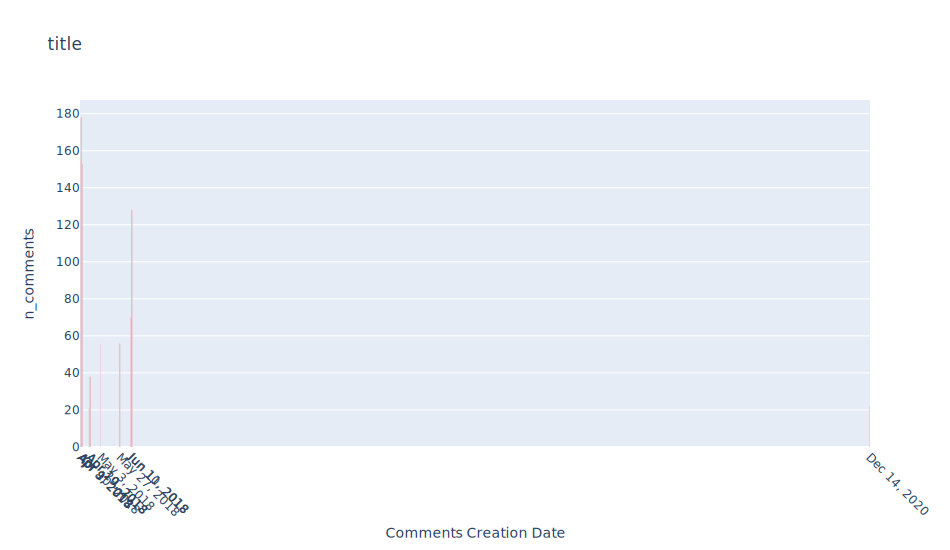

In [390]:
bar_peaks(red_dates, "title")

In [391]:
df_red.username.value_counts()

_abdvl._              3
the.legendary.owl     3
baydenjack            3
sharzmahmood          3
abe_xiong             3
                     ..
caio_._camo           1
hdjeoskdjdkdkdksm     1
bobbyoliverpoptart    1
zo_notfinal.wav       1
masoud_heidari.1      1
Name: username, Length: 1006, dtype: int64

In [392]:
df_comments[df_comments.message.str.contains('amber red')].message.value_counts().head(20)

amber red 🌷💎🔥💘                                 1
si amber redhead basah2an makin seksi. 🤤🤤🤣🤣    1
beautiful amber red😘😘😘💕💕💕😘😘😘🔥🔥🔥                1
was amber red hair real or wig                 1
Name: message, dtype: int64

<a id='inevitable'></a>
>>### I am invitable
> <ul>
 <li><a href="#neg">Negative Comments</a></li>   
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable"><b>I am inevitable</b></a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

In [393]:
df_inev = df_comments.query(' message =="i am inevitable" ')
df_inev.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
993242,i am inevitable,2019-05-15 08:24:51,18062326633066476,0.0,0.0,2043370785717132288,n,5557721675,ronak.jain15,False,https://www.instagram.com/ronak.jain15,2019,May,15,2019-05-15,8
993263,i am inevitable,2019-05-15 16:38:36,17853256882422760,0.0,0.0,2043370785717132288,n,11161354018,_maddie_cookie_,False,https://www.instagram.com/_maddie_cookie_,2019,May,15,2019-05-15,16
993265,i am inevitable,2019-05-15 17:59:27,17963838115266740,0.0,0.0,2043370785717132288,n,6677024448,cholo_blackpanther,False,https://www.instagram.com/cholo_blackpanther,2019,May,15,2019-05-15,17
993271,i am inevitable,2019-05-15 19:38:44,17963433061265200,0.0,0.0,2043370785717132288,n,7199686219,swastikshukla1308,False,https://www.instagram.com/swastikshukla1308,2019,May,15,2019-05-15,19
993278,i am inevitable,2019-05-16 04:02:31,18033199981150260,0.0,0.0,2043370785717132288,n,8299889227,bxvin._,False,https://www.instagram.com/bxvin._,2019,May,16,2019-05-16,4


In [394]:
df_inev.date.value_counts()

2019-05-14    128
2019-05-15     21
2019-05-16      1
2019-05-25      1
Name: date, dtype: int64

In [395]:
inev_dates = get_top(df_inev, "date", 10, "date", "n_comments")
inev_dates

,date,n_comments
0,2019-05-14,128
1,2019-05-15,21
2,2019-05-16,1
3,2019-05-25,1


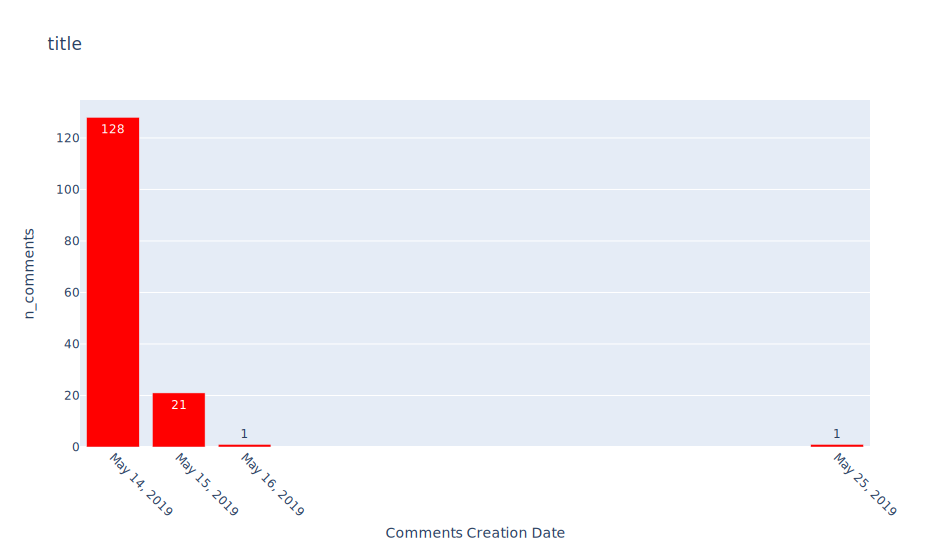

In [396]:
bar_peaks(inev_dates, "title")

the peak day of **I am inevitable** comment is 14 May 2019

In [397]:
df_inev.username.value_counts()

ronak.jain15           1
its_rajdeep_m          1
j.a.k.e.t.a.y.l.o.r    1
dhruvv.agrawal         1
melylunac_             1
                      ..
lyfaday                1
karthickhere           1
jamesquinn3630         1
saini_lovers           1
doughboii.2120         1
Name: username, Length: 151, dtype: int64

**This text used 136 times by different 136 users in 3 consecutive days**
- in those dates
    - 2019-05-14 	114
    - 2019-05-15 	20
    - 2019-05-16 	1
    - 2019-05-25 	1

<a id='nums'></a>
>>### Only Numbers
> <ul>
 <li><a href="#neg">Negative Comments</a></li>   
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums"><b>Only Numbers</b></a></li> 
 </ul>

In [398]:
numbers = []

In [399]:
for i in range(0, 100):
    i = str(i)
    if df_comments.query("message==@i").shape[0] > 100:
        print(i, df_comments.query("message==@i").shape[0])
        numbers.append(i)

0 133
1 2043
2 2099
3 1238
4 792
5 588
6 270
7 271
8 336
9 471
10 993
11 146


In [400]:
df_num = df_comments.query("message in @numbers")

In [401]:
df_num.date.value_counts()

2018-08-16    346
2018-07-13    322
2019-11-22    189
2018-07-12    189
2018-12-31    165
             ... 
2021-08-21      1
2019-09-14      1
2018-09-14      1
2018-09-20      1
2018-06-23      1
Name: date, Length: 1000, dtype: int64

In [402]:
df_num.username.value_counts()

poison_roar_ivy      45
nicolaspezeshkian    19
nasrabadi_vahid      17
rgjas8               16
hcarney50            14
                     ..
mamaofboyz2           1
elnaz_e_naaz          1
b.doliveira           1
jaramillo8207         1
rubenizuriets         1
Name: username, Length: 8169, dtype: int64

## Negative Text

In [403]:
neg_text

{' death',
 ' death ',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violence',
 'expos',
 'exposing her ass',
 'exposingamberheard',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamber',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @am

## Negative Users

In [404]:
# # To Save the negative commented users in a dictionary pkl file
# import pickle

# with open('negative_users.pkl', 'wb') as f:
#     pickle.dump(neg_users, f)

In [405]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

In [406]:
len(neg_users)

14511

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

<a id = 'end'><a/>
# END OF NOTEBOOK